In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [127]:
cal_fire_data = pd.read_csv("Housing_Data_Cleaned_03052025.csv", index_col=0)
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 112761 entries, 0 to 130721
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   * Street Type (e.g. road, drive, lane, etc.)                  99918 non-null   object 
 1   Street Suffix (e.g. apt. 23, blding C)                        58369 non-null   object 
 2   * City                                                        81384 non-null   object 
 3   * CAL FIRE Unit                                               112761 non-null  object 
 4   County                                                        112731 non-null  object 
 5   Community                                                     42960 non-null   object 
 6   * Incident Name                                               112761 non-null  object 
 7   If Affected 1-9% - Where did fire start?                     

/var/folders/l1/qgkmnkpx453gnydcmvkyxhh80000gn/T/ipykernel_97554/1123445577.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  cal_fire_data = pd.read_csv("Housing_Data_Cleaned_03052025.csv", index_col=0)


In [128]:
from sklearn.model_selection import train_test_split
fire_train, fire_test = train_test_split(cal_fire_data, test_size=0.2, shuffle=True, random_state=216, stratify=cal_fire_data['Damage_Level'])
fire_train['Damage_Level'].value_counts(normalize=True)


Damage_Level
1    0.535717
0    0.464283
Name: proportion, dtype: float64

In [129]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

fire_cat = (fire_train.drop(columns=['Damage_Level'],axis=1)).select_dtypes(include=['object'])
for col in fire_cat.columns:
    le = LabelEncoder()
    fire_cat[col] = le.fit_transform(fire_cat[col])
chi_scores, p_values = chi2(fire_cat, fire_train['Damage_Level'])
print(p_values)
chi2_results = pd.DataFrame({
    'Feature': fire_cat.columns,
    'Chi2_Score': chi_scores,
    'P_Value': p_values
})
alpha = 0.05  
significant_features = chi2_results[chi2_results['P_Value'] < alpha]['Feature']
significant_features


[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.80583006e-131
 4.03663860e-120 1.86945794e-026 1.30575140e-004 7.00919404e-013
 0.00000000e+000 0.00000000e+000 8.28453764e-153 0.00000000e+000
 6.66985098e-231 6.10959825e-002 7.85164251e-030 4.32834081e-001
 0.00000000e+000 1.96848702e-017 1.54643307e-044 6.60244917e-169
 0.00000000e+000]


0          * Street Type (e.g. road, drive, lane, etc.)
1                Street Suffix (e.g. apt. 23, blding C)
2                                                * City
3                                       * CAL FIRE Unit
4                                                County
5                                             Community
6                                       * Incident Name
7              If Affected 1-9% - Where did fire start?
8                 If Affected 1-9% - What started fire?
9                       Structure Defense Actions Taken
10                                     * Structure Type
11                                   Structure Category
12                                  * Roof Construction
13                                              * Eaves
14                                        * Vent Screen
15                                    * Exterior Siding
16                                        * Window Pane
18                                * Deck/Porch E

In [130]:
from sklearn.feature_selection import f_classif

# fire_num = (fire_train.drop(columns=['Damage_Level'],axis=1)).select_dtypes(include=['int64', 'float64'])
# print(fire_num.columns)
# f_statistic, p_values = f_classif(fire_num, fire_train['Damage_Level'])
# print(p_values)
# f_results = pd.DataFrame({
#     'Feature': fire_num.columns,
#     'F_Score': f_statistic,
#     'P_Value': p_values
# })
# alpha = 0.05  
# significant_features = f_results[f_results['P_Value'] < alpha]['Feature']
# significant_features


* Street Type (e.g. road, drive, lane, etc.)
Road         37986
Drive        18646
Lane          9802
Avenue        8878
Street        8736
Way           4156
Court         2623
Other         1852
Place         1351
Trail         1339
Circle        1199
Boulevard     1199
Highway        943
Route          362
Terrace        297
Loop           246
Hwy            175
Parkway         79
Alley           48
                 1
Name: count, dtype: int64


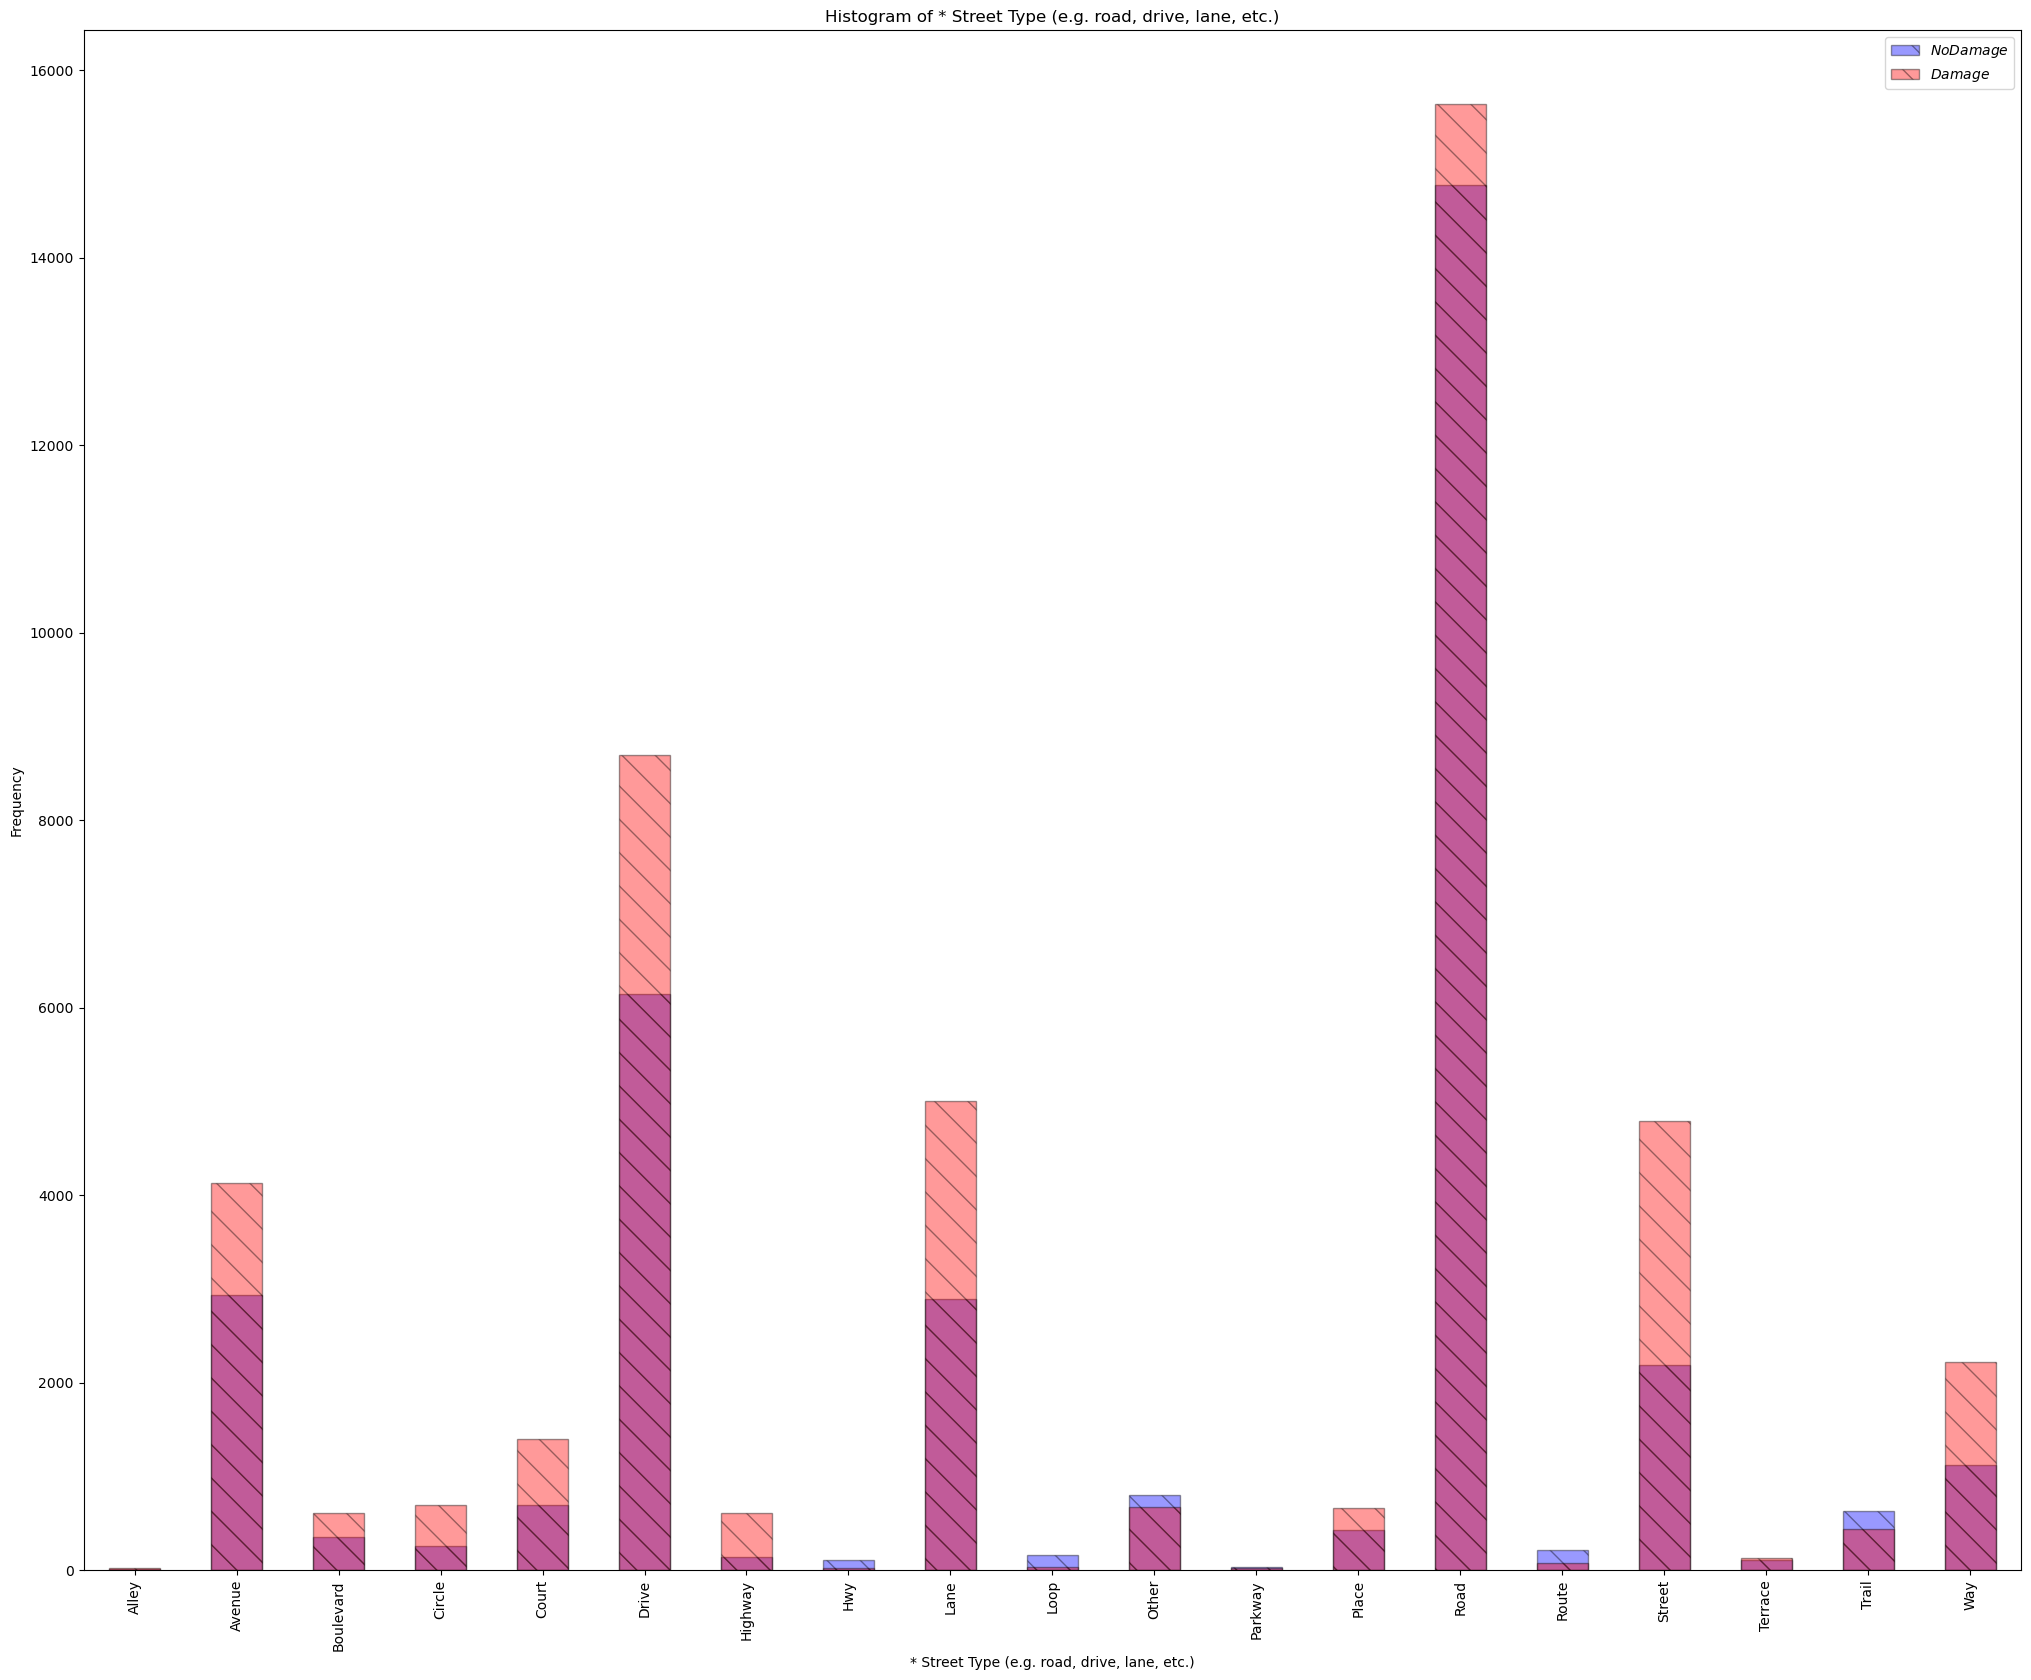

In [131]:
print(cal_fire_data['* Street Type (e.g. road, drive, lane, etc.)'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Street Type (e.g. road, drive, lane, etc.)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Street Type (e.g. road, drive, lane, etc.)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Street Type (e.g. road, drive, lane, etc.)'}')
plt.xlabel('* Street Type (e.g. road, drive, lane, etc.)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Street Suffix (e.g. apt. 23, blding C)
A            12424
B            11727
blding B      5180
blding A      5164
C             4027
             ...  
apt B & C        1
166              1
Stables B        1
Stables          1
Space 10         1
Name: count, Length: 2338, dtype: int64


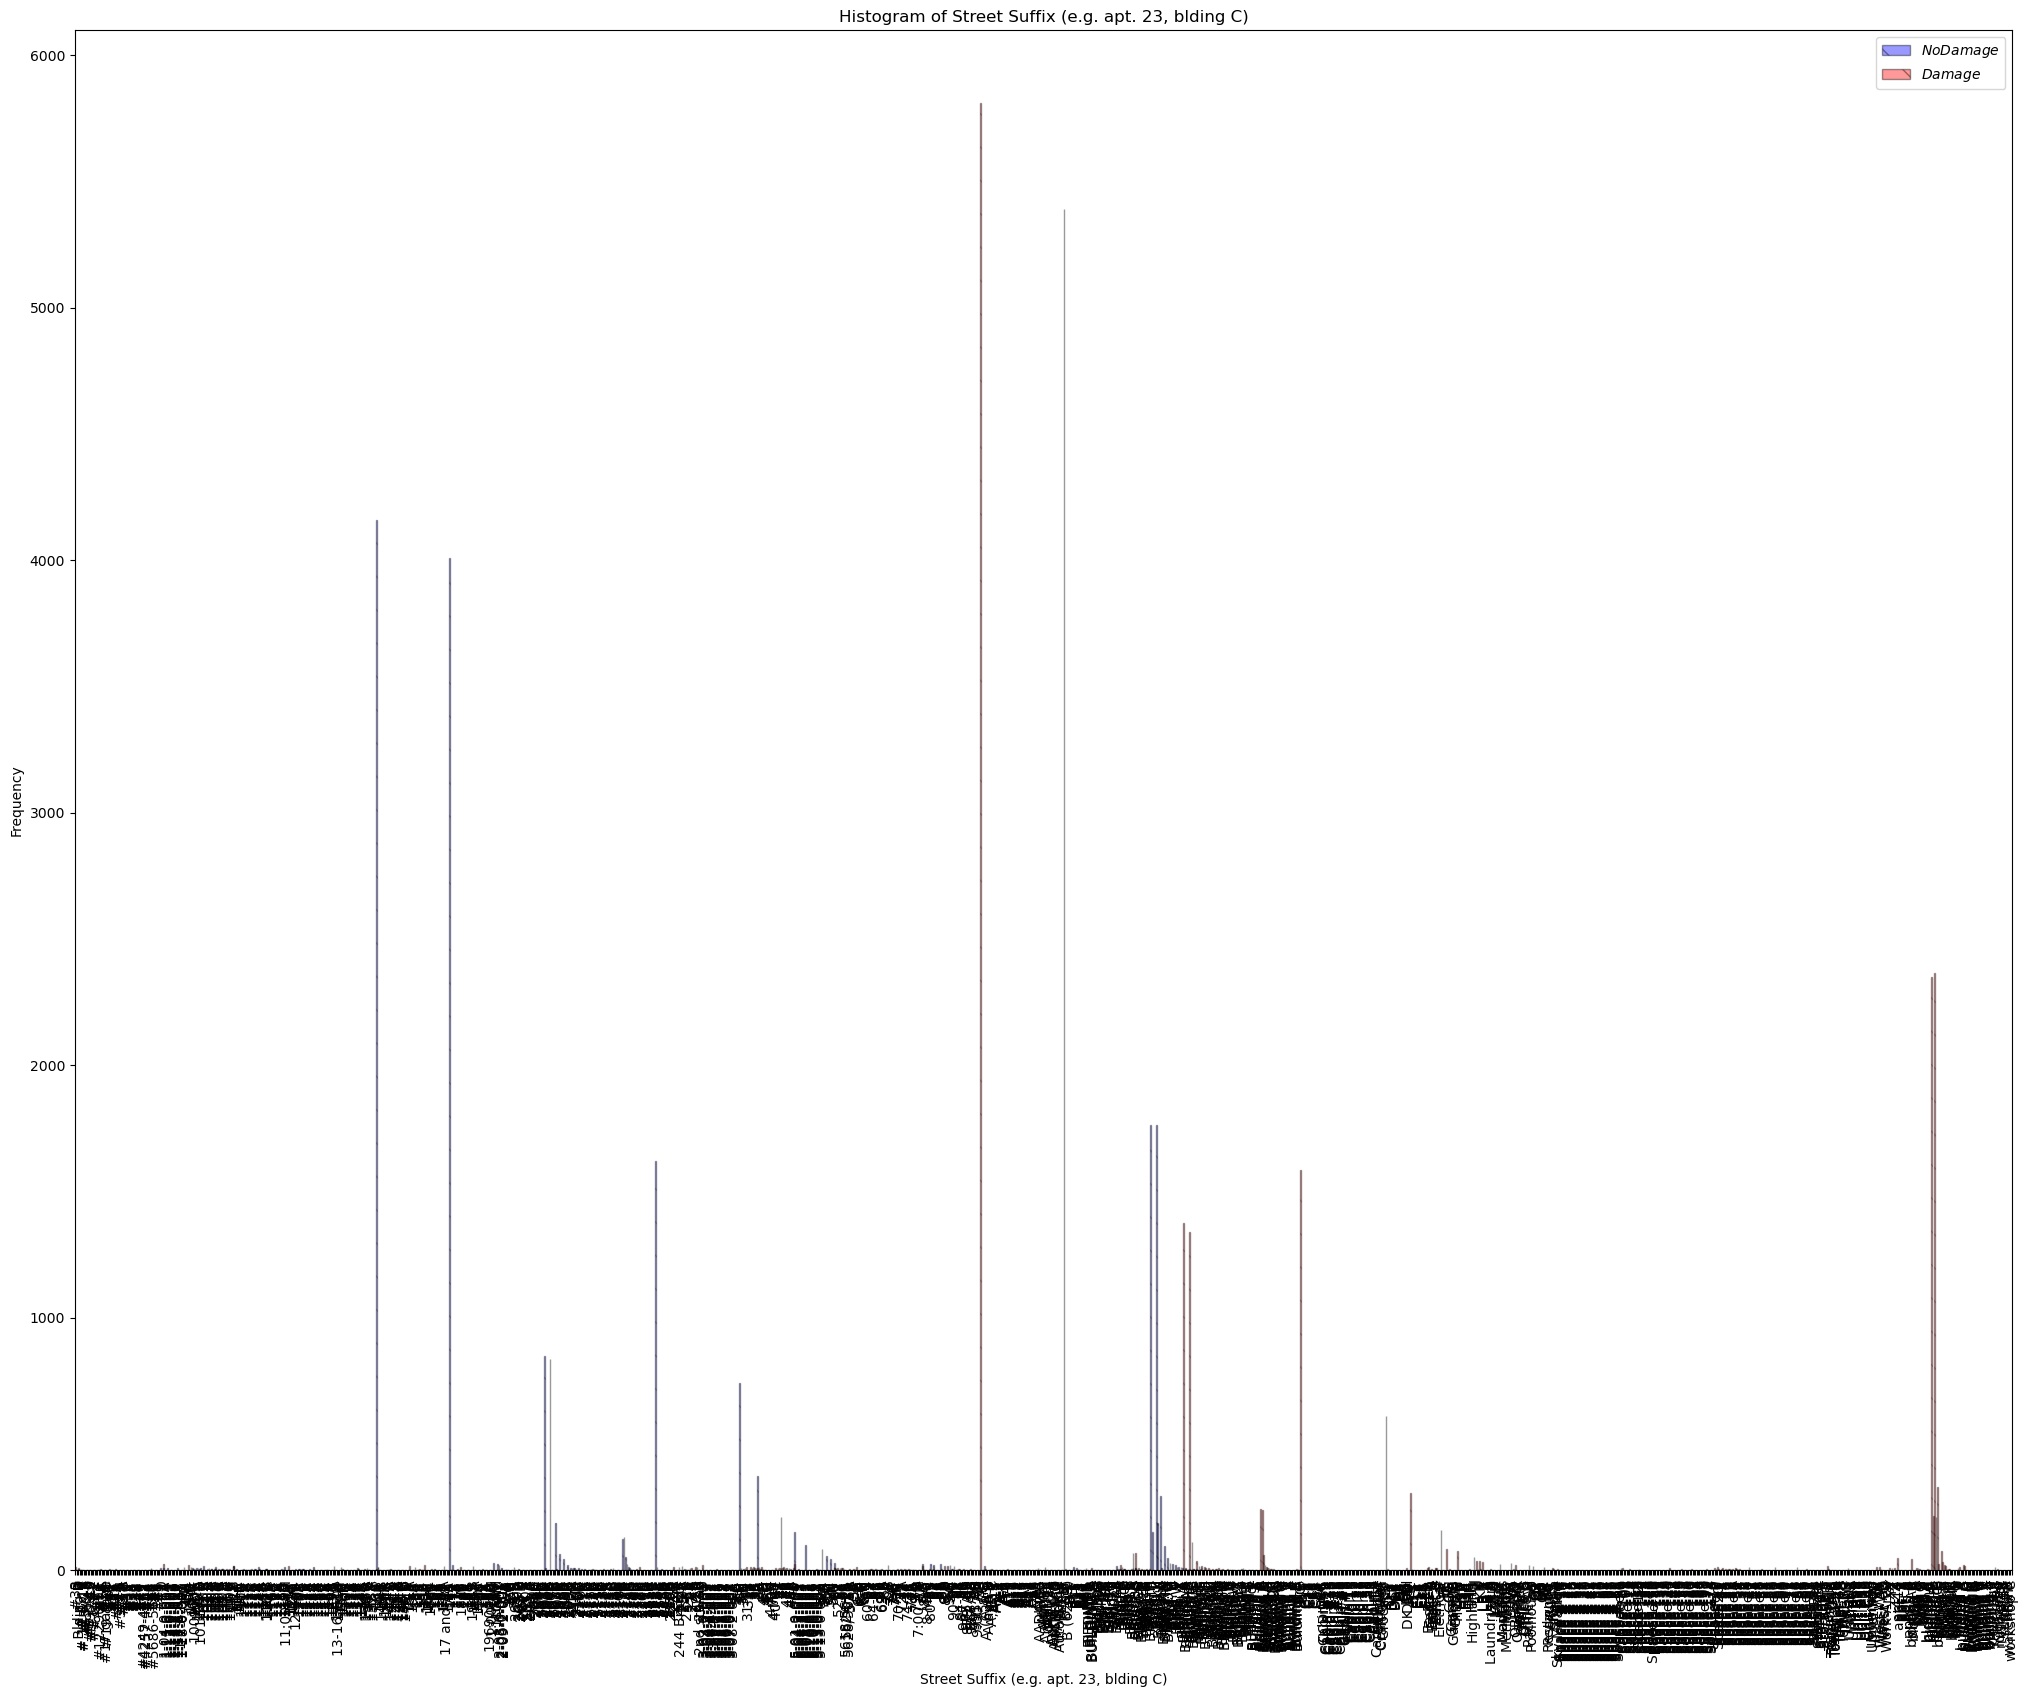

In [132]:
print(cal_fire_data['Street Suffix (e.g. apt. 23, blding C)'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Street Suffix (e.g. apt. 23, blding C)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Street Suffix (e.g. apt. 23, blding C)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Street Suffix (e.g. apt. 23, blding C)'}')
plt.xlabel('Street Suffix (e.g. apt. 23, blding C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* City
Altadena             14951
Pacific Palisades     9022
Unincorporated        7398
Malibu                3645
Magalia               2727
                     ...  
Riversida                1
unknown                  1
Plymouth                 1
San Miguel               1
Woodland Hills           1
Name: count, Length: 398, dtype: int64


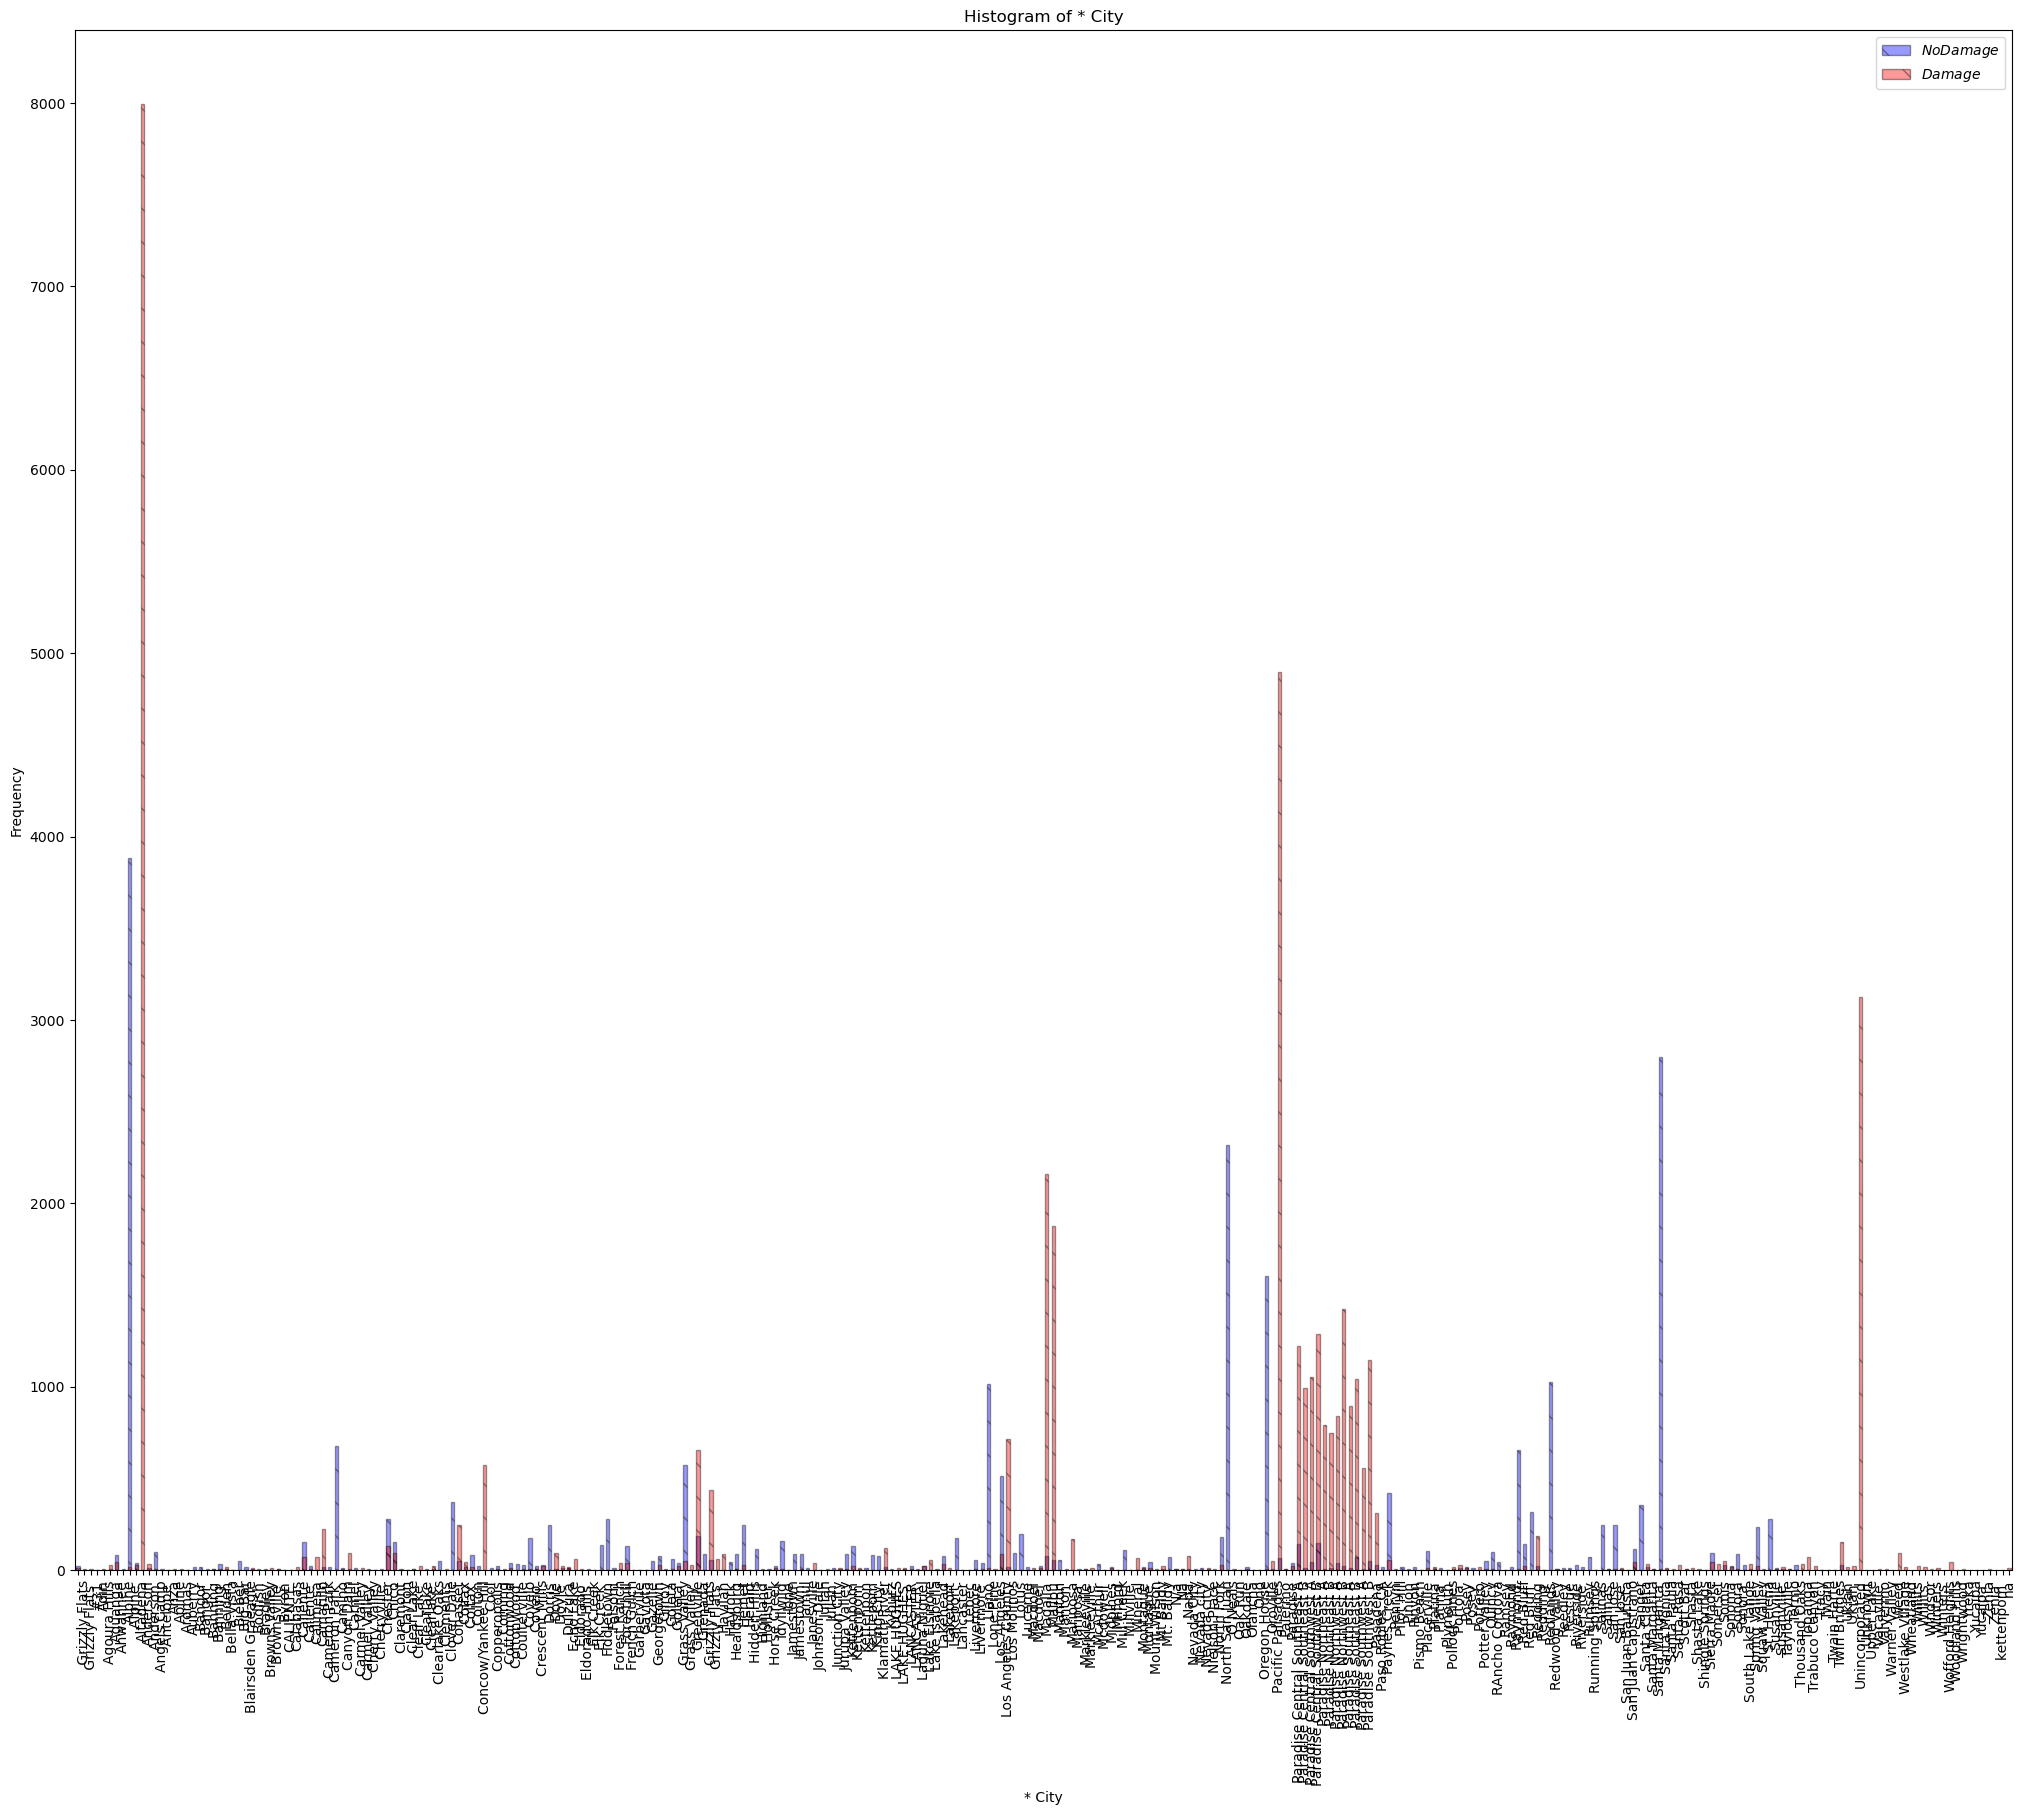

In [133]:
print(cal_fire_data['* City'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* City'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* City'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* City'}')
plt.xlabel('* City')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* CAL FIRE Unit
LAC    33881
BTU    28527
LNU    12197
AEU     5152
CZU     4762
LMU     4539
SHU     3812
FKU     2907
ORC     2424
VNC     2136
MMU     1694
SKU     1430
RRU     1162
TGU     1096
KRN     1055
TUU     1017
NEU      944
BDU      935
SCU      890
BEU      649
MVU      638
MEU      355
SBC      209
TCU      188
HUU      137
SLU       15
SDU       10
Name: count, dtype: int64


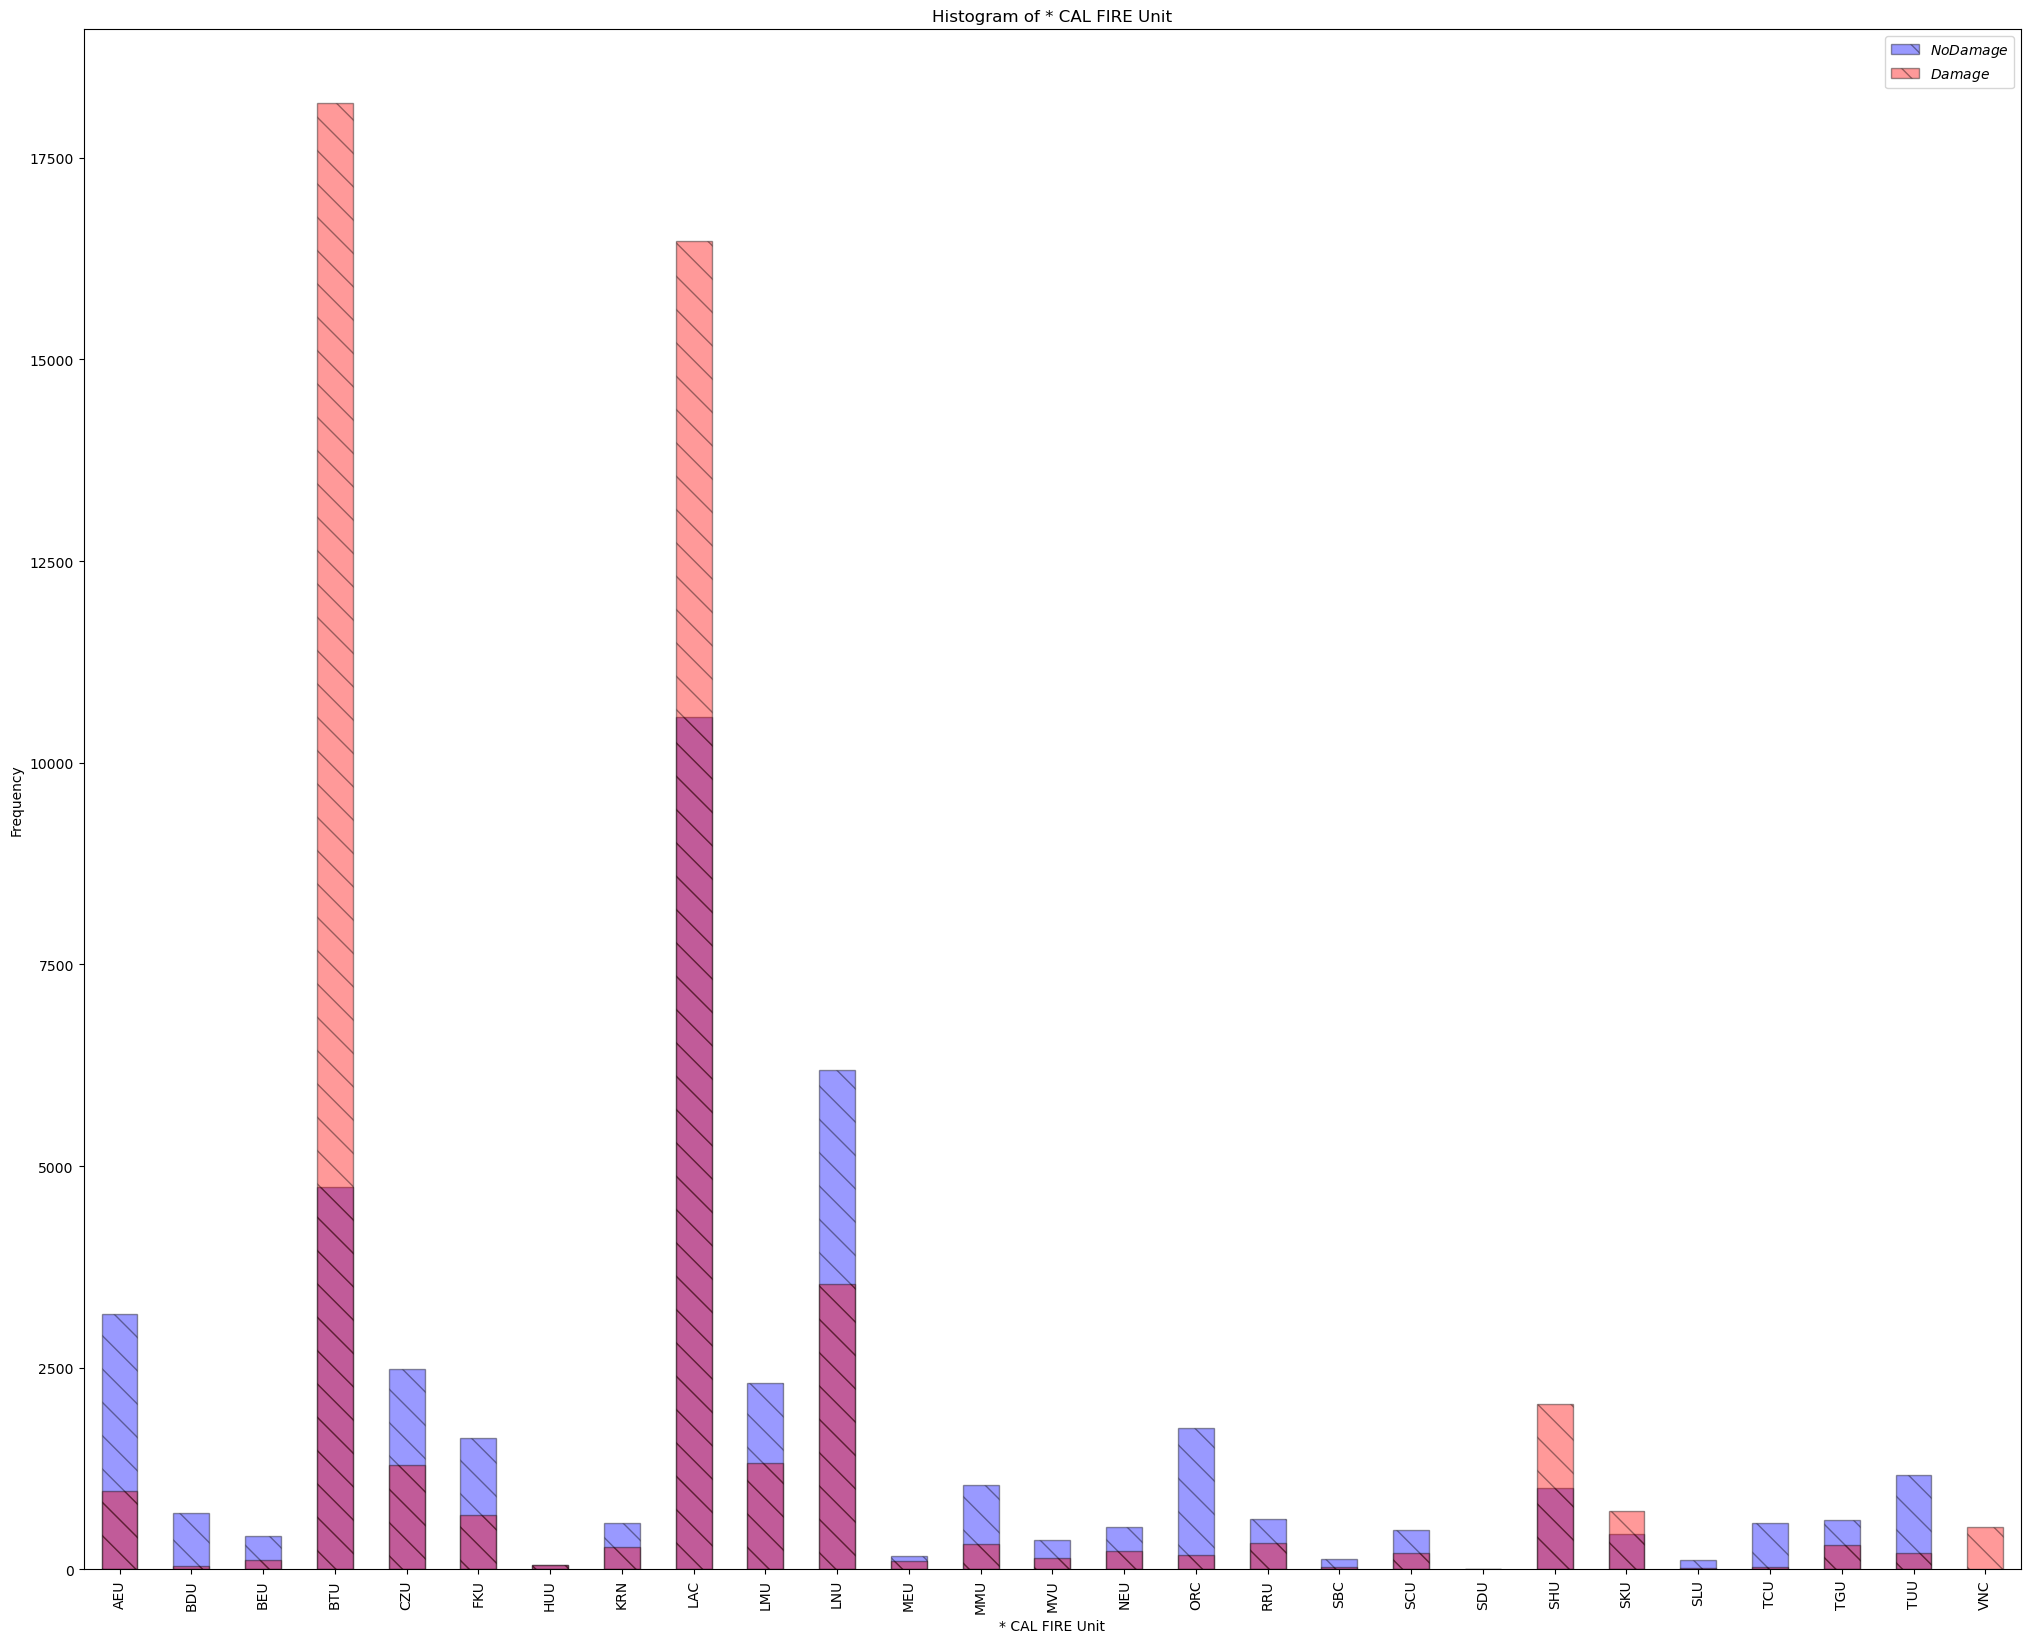

In [134]:
print(cal_fire_data['* CAL FIRE Unit'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* CAL FIRE Unit'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* CAL FIRE Unit'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* CAL FIRE Unit'}')
plt.xlabel('* CAL FIRE Unit')
plt.ylabel('Frequency')
plt.legend()
plt.show()


County
Los Angeles        33881
Butte              28469
El Dorado           4637
Napa                4578
Santa Cruz          4558
Sonoma              4485
Plumas              3576
Shasta              3513
Fresno              2907
Orange              2424
Solano              2310
Ventura             2136
Siskiyou            1430
Riverside           1151
Tehama              1108
Kern                1055
Tulare              1015
Mariposa             974
Lassen               957
San Bernardino       917
Madera               720
San Diego            648
Monterey             607
Placer               605
Santa Clara          546
Lake                 495
Trinity              431
Alpine               414
Mendocino            346
Yolo                 278
Nevada               276
Santa Barbara        209
San Mateo            204
Stanislaus           170
Calaveras            125
Alameda              120
San Joaquin           89
Amador                78
Colusa                52
Glenn             

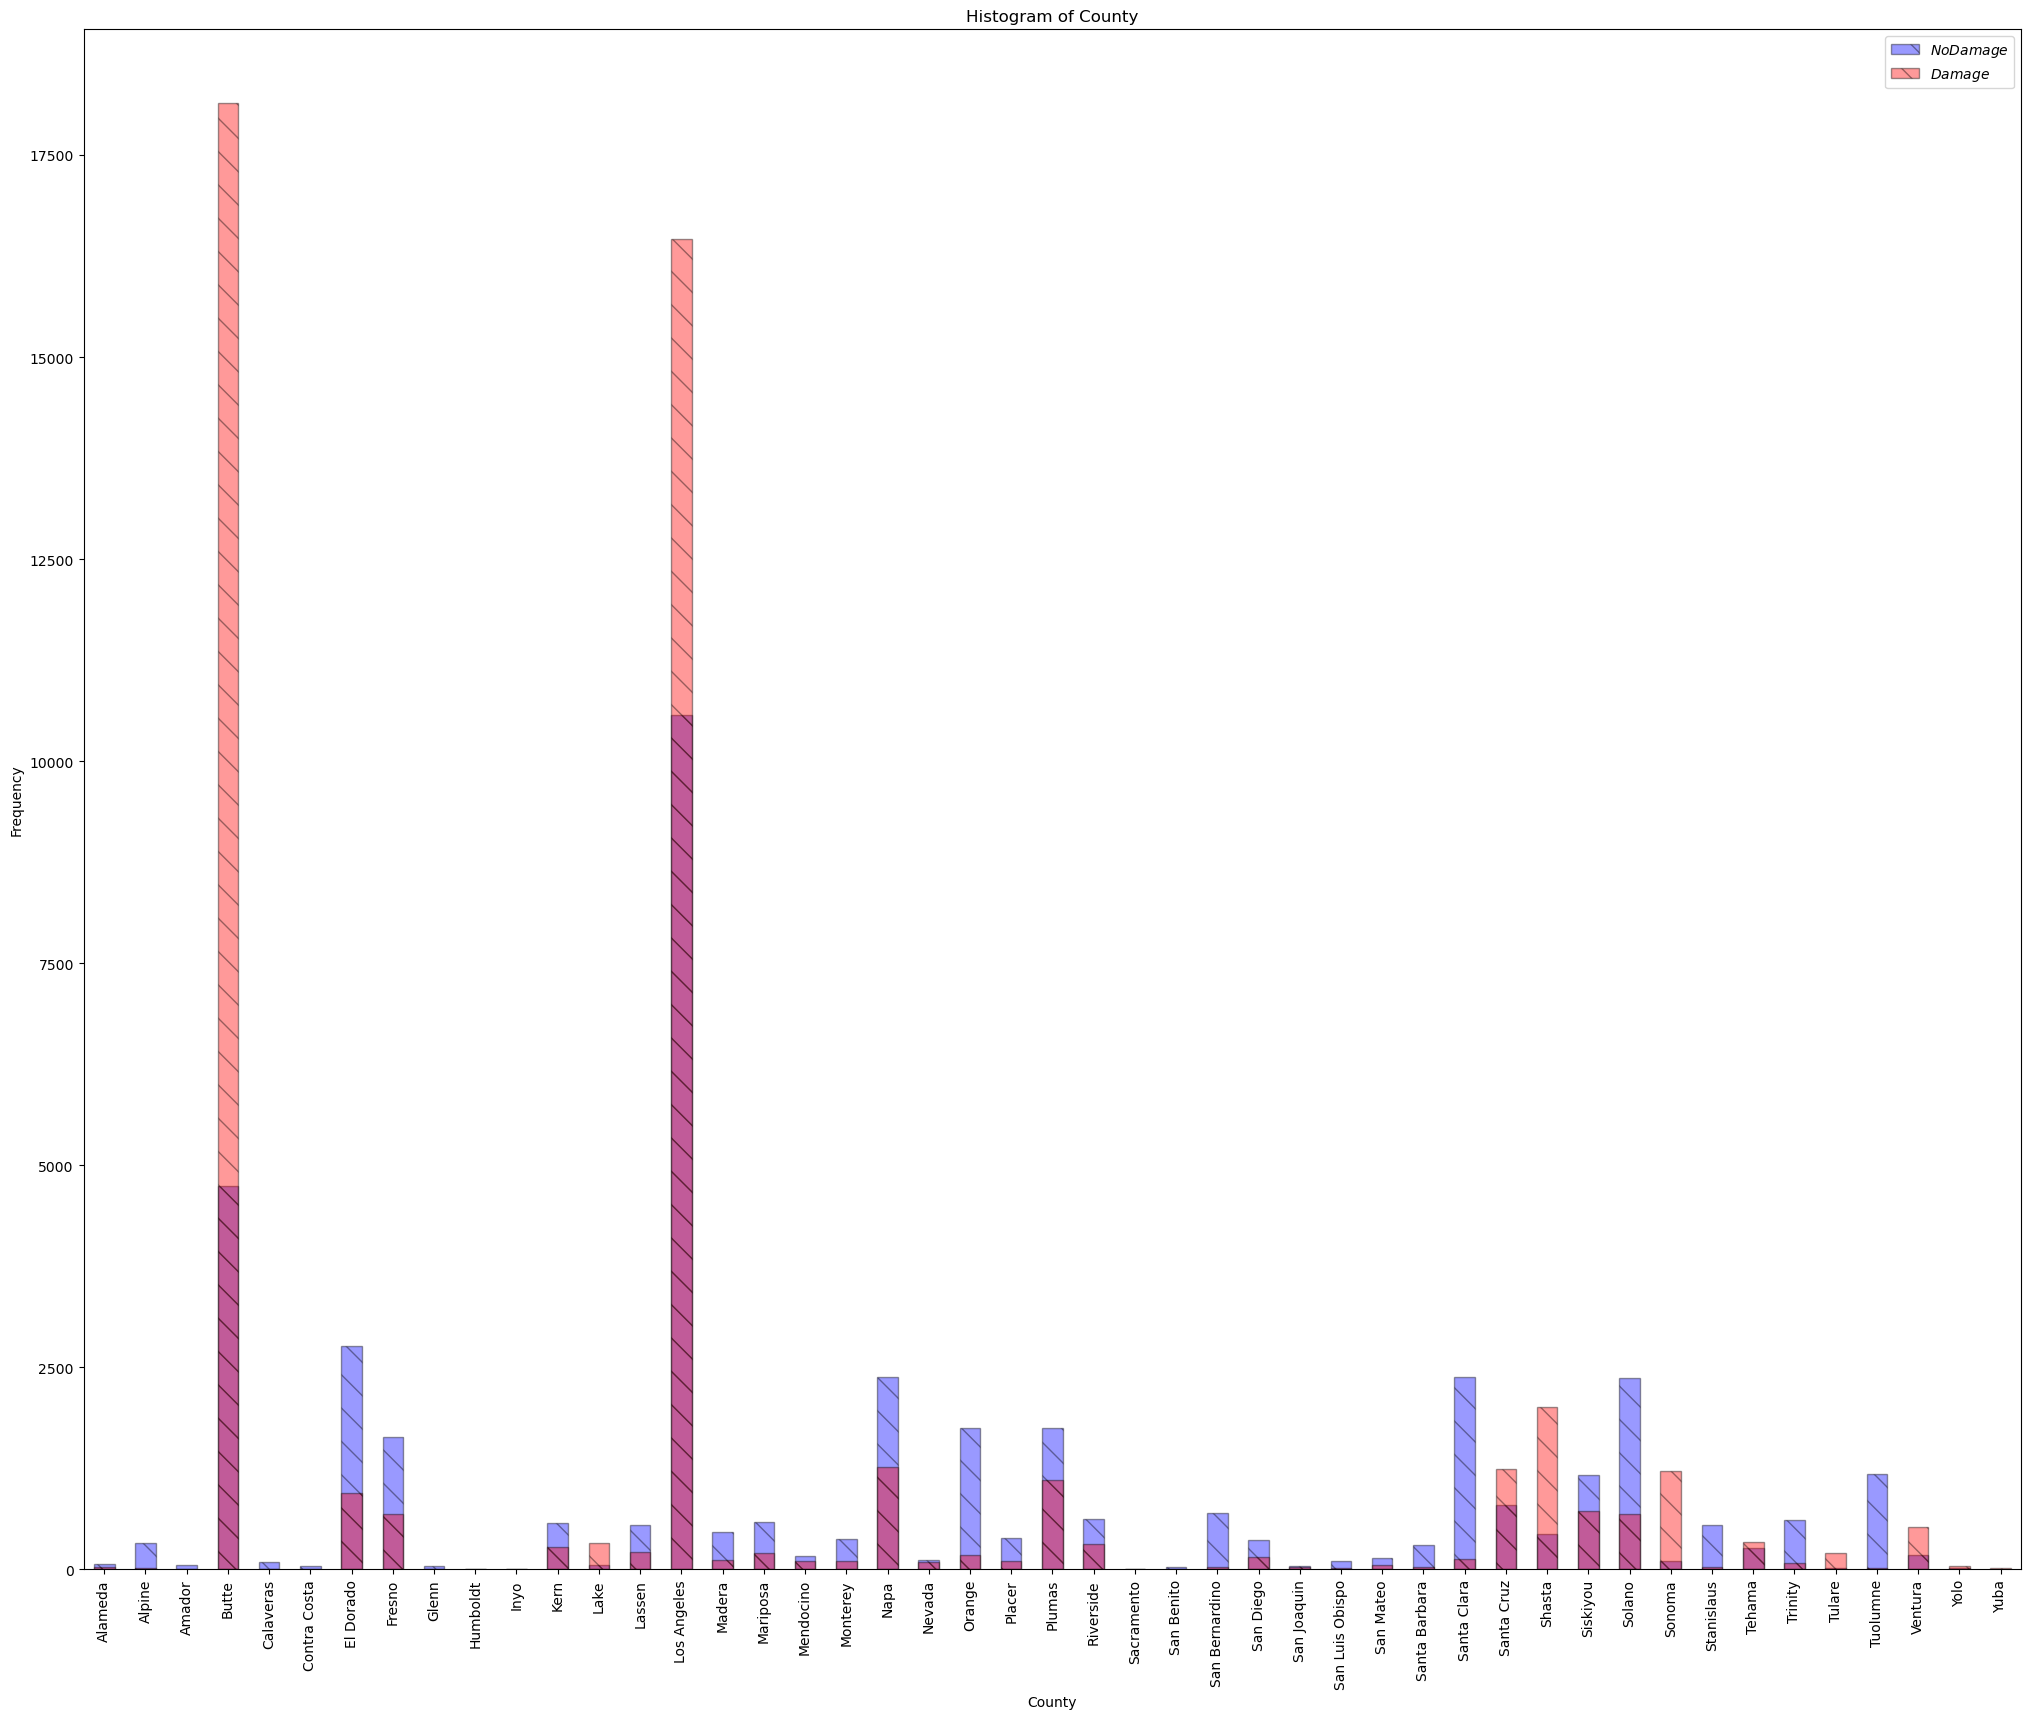

In [135]:
print(cal_fire_data['County'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['County'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['County'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'County'}')
plt.xlabel('County')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Community
Paradise                                                                           7457
Paradise                                                                           7366
Magalia                                                                            1804
Magalia                                                                             946
Berry Creek                                                                         819
                                                                                   ... 
lakeport                                                                              1
Hopland                                                                               1
Hopland                                                                               1
Zuma                                                                                  1
Unable to encircle due to locked gates but observed from neighboring properties       1
Name: count, Length: 8

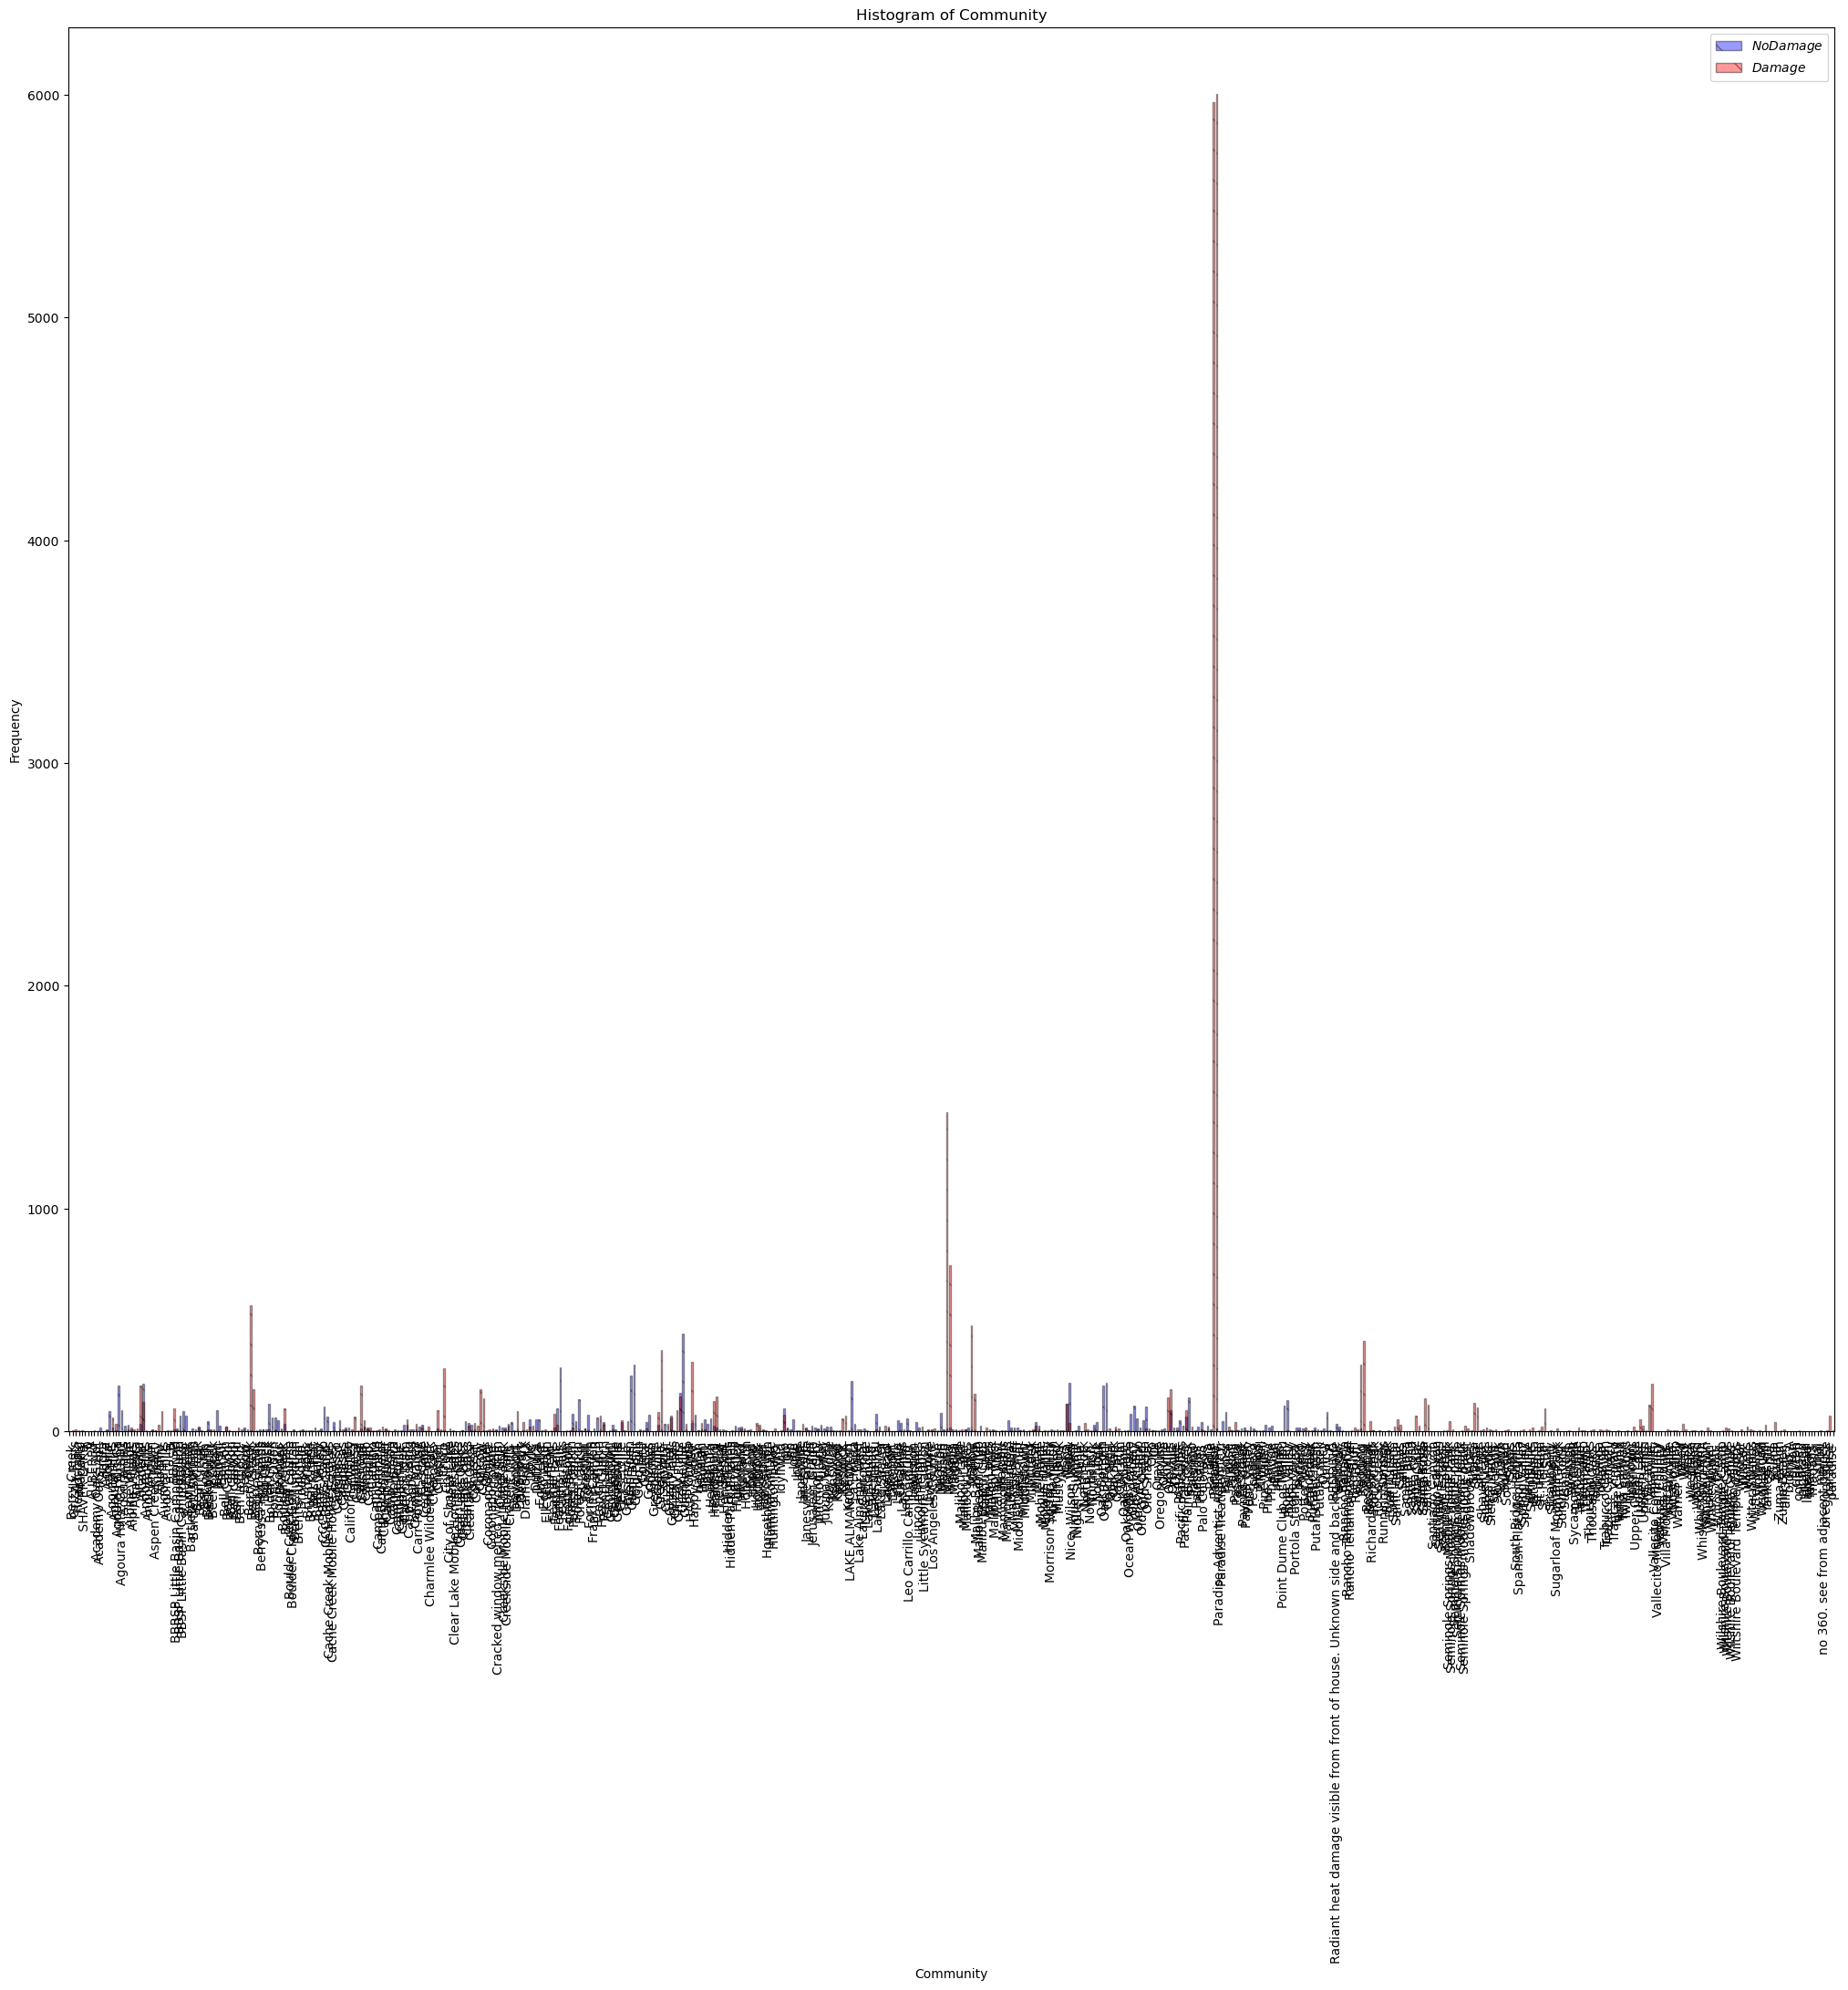

In [136]:
print(cal_fire_data['Community'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Community'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Community'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Community'}')
plt.xlabel('Community')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Incident Name
Camp                   23624
Eaton                  18382
Palisades              12070
LNU Lightning Cmplx     5110
CZU Lightning Cmplx     4762
                       ...  
Colusa                     1
Harney                     1
Bart                       1
Peach                      1
Carder                     1
Name: count, Length: 219, dtype: int64


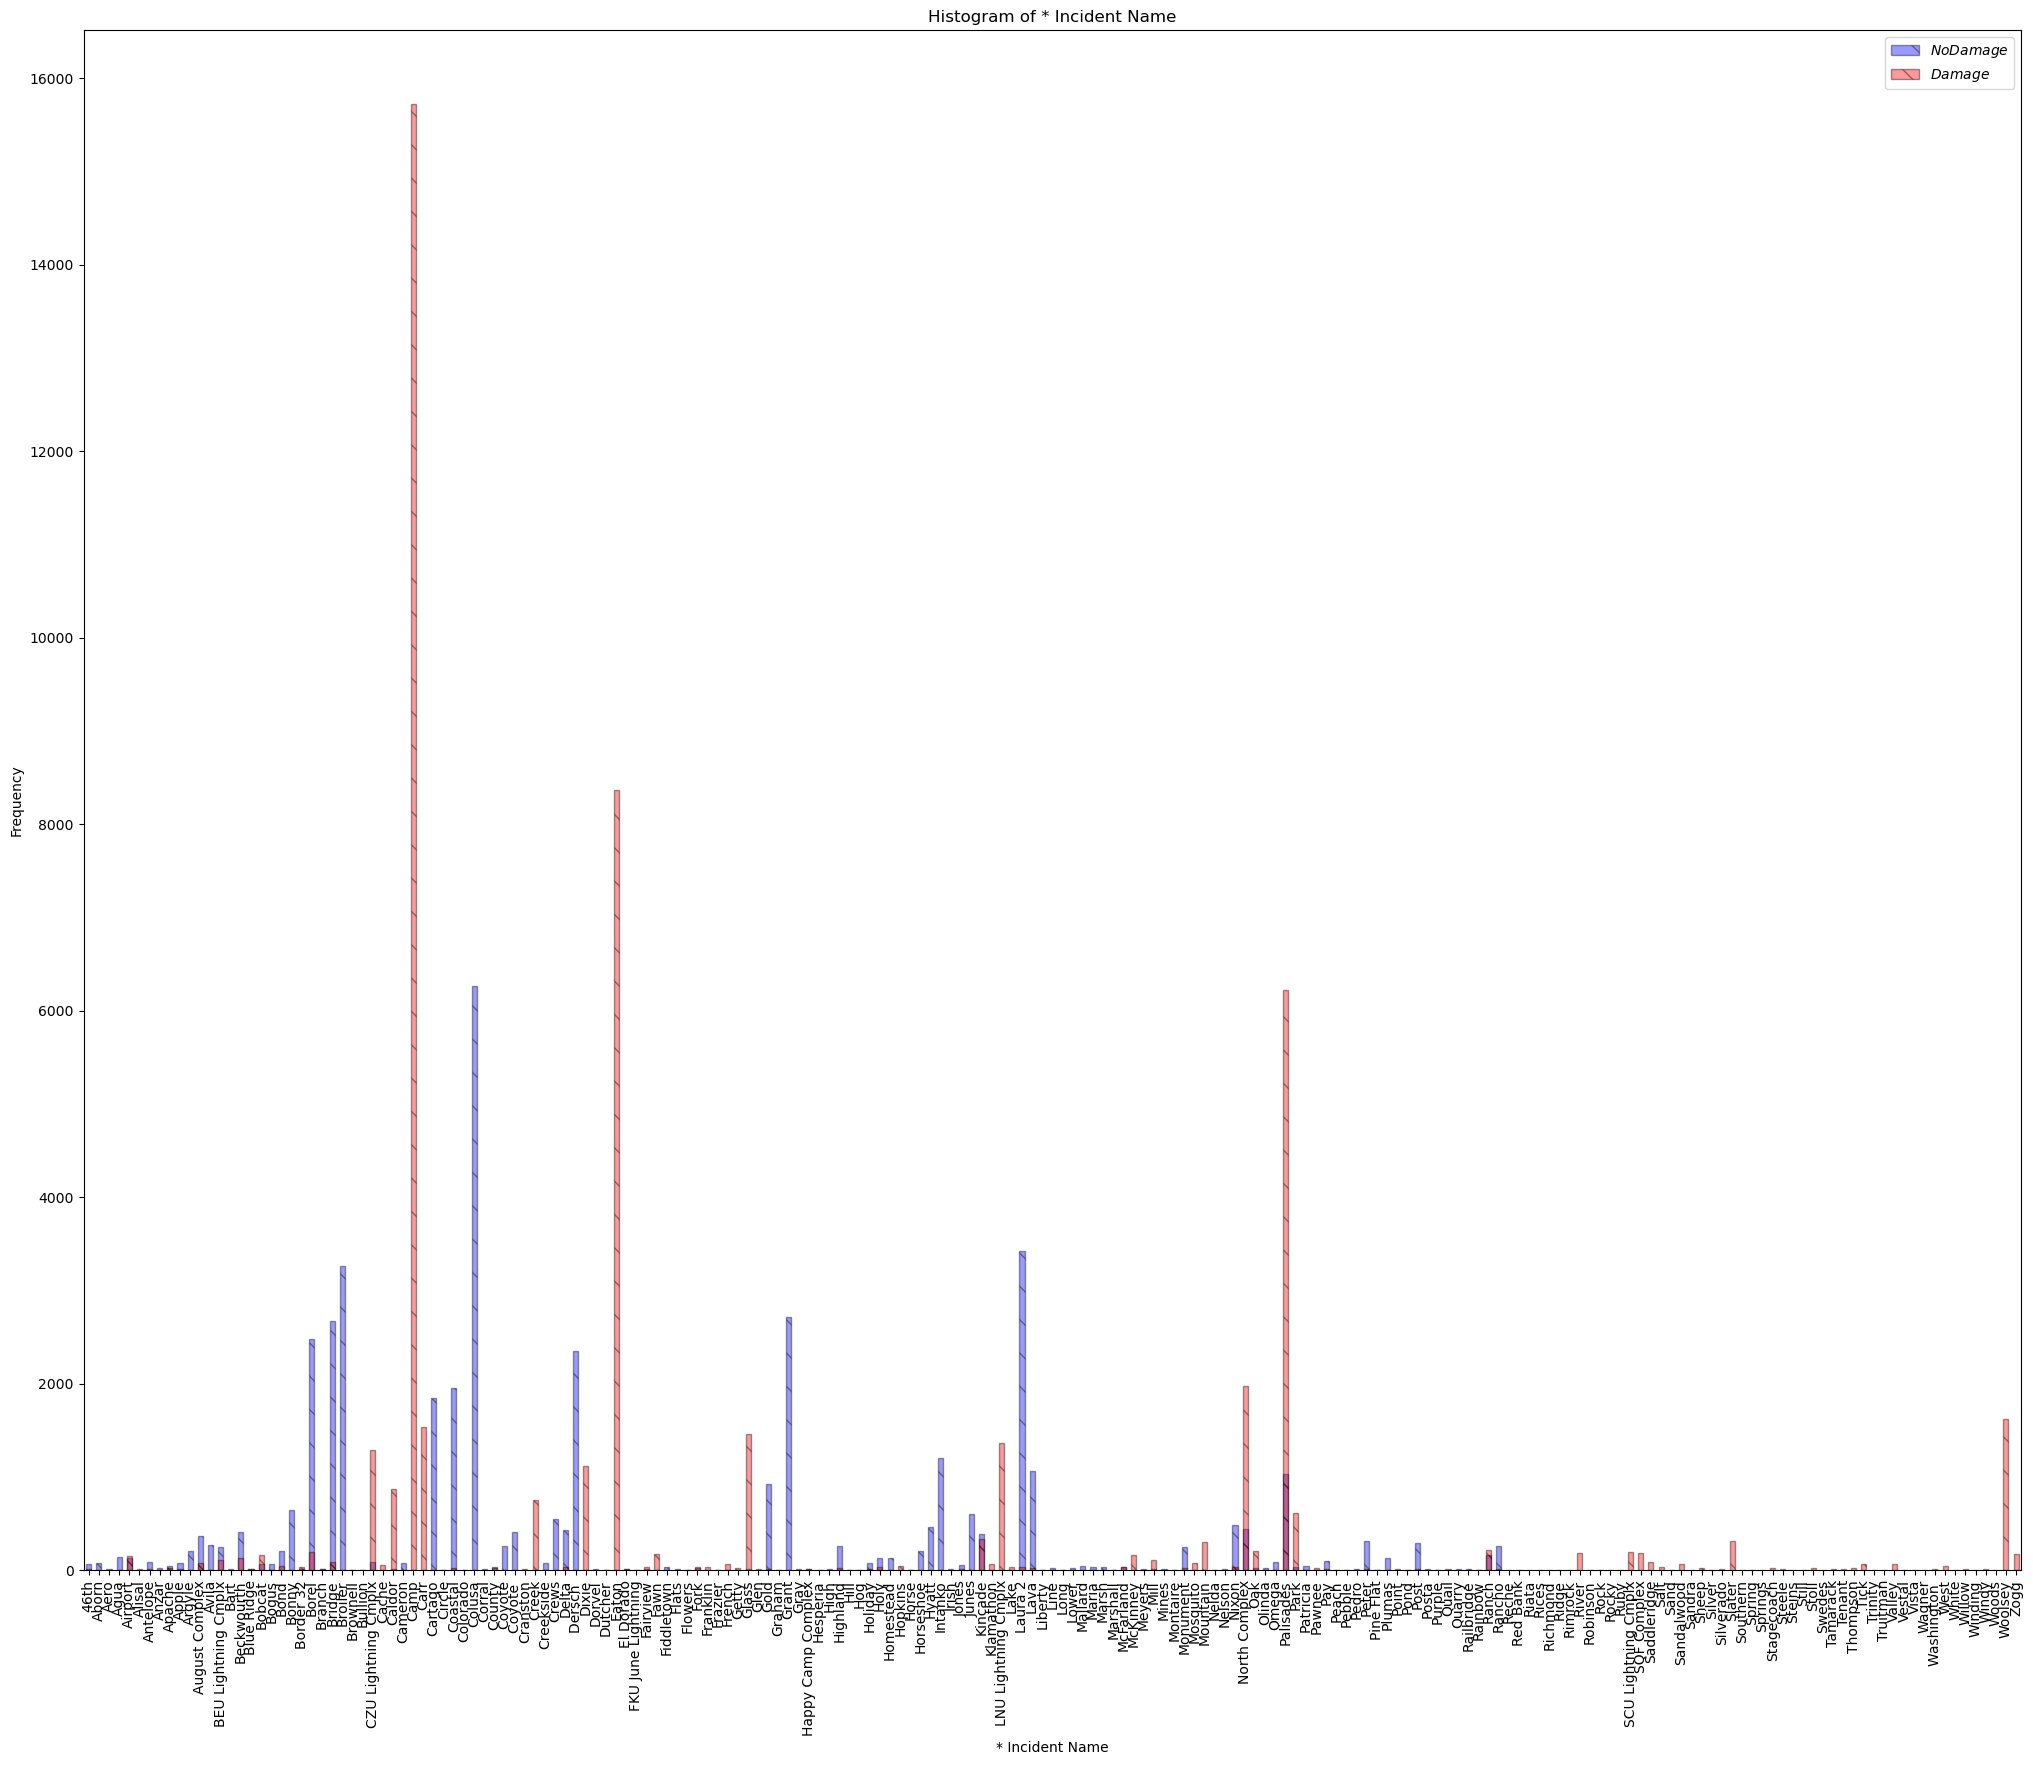

In [137]:
print(cal_fire_data['* Incident Name'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Incident Name'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Incident Name'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Incident Name'}')
plt.xlabel('* Incident Name')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Incident Month/Year
01/7/25    30447
11/8/18    25637
08/6/20    10461
09/7/20     5439
08/4/21     4829
           ...  
07/6/20        1
05/9/21        1
05/9/24        1
09/7/23        1
06/1/23        1
Name: count, Length: 166, dtype: int64


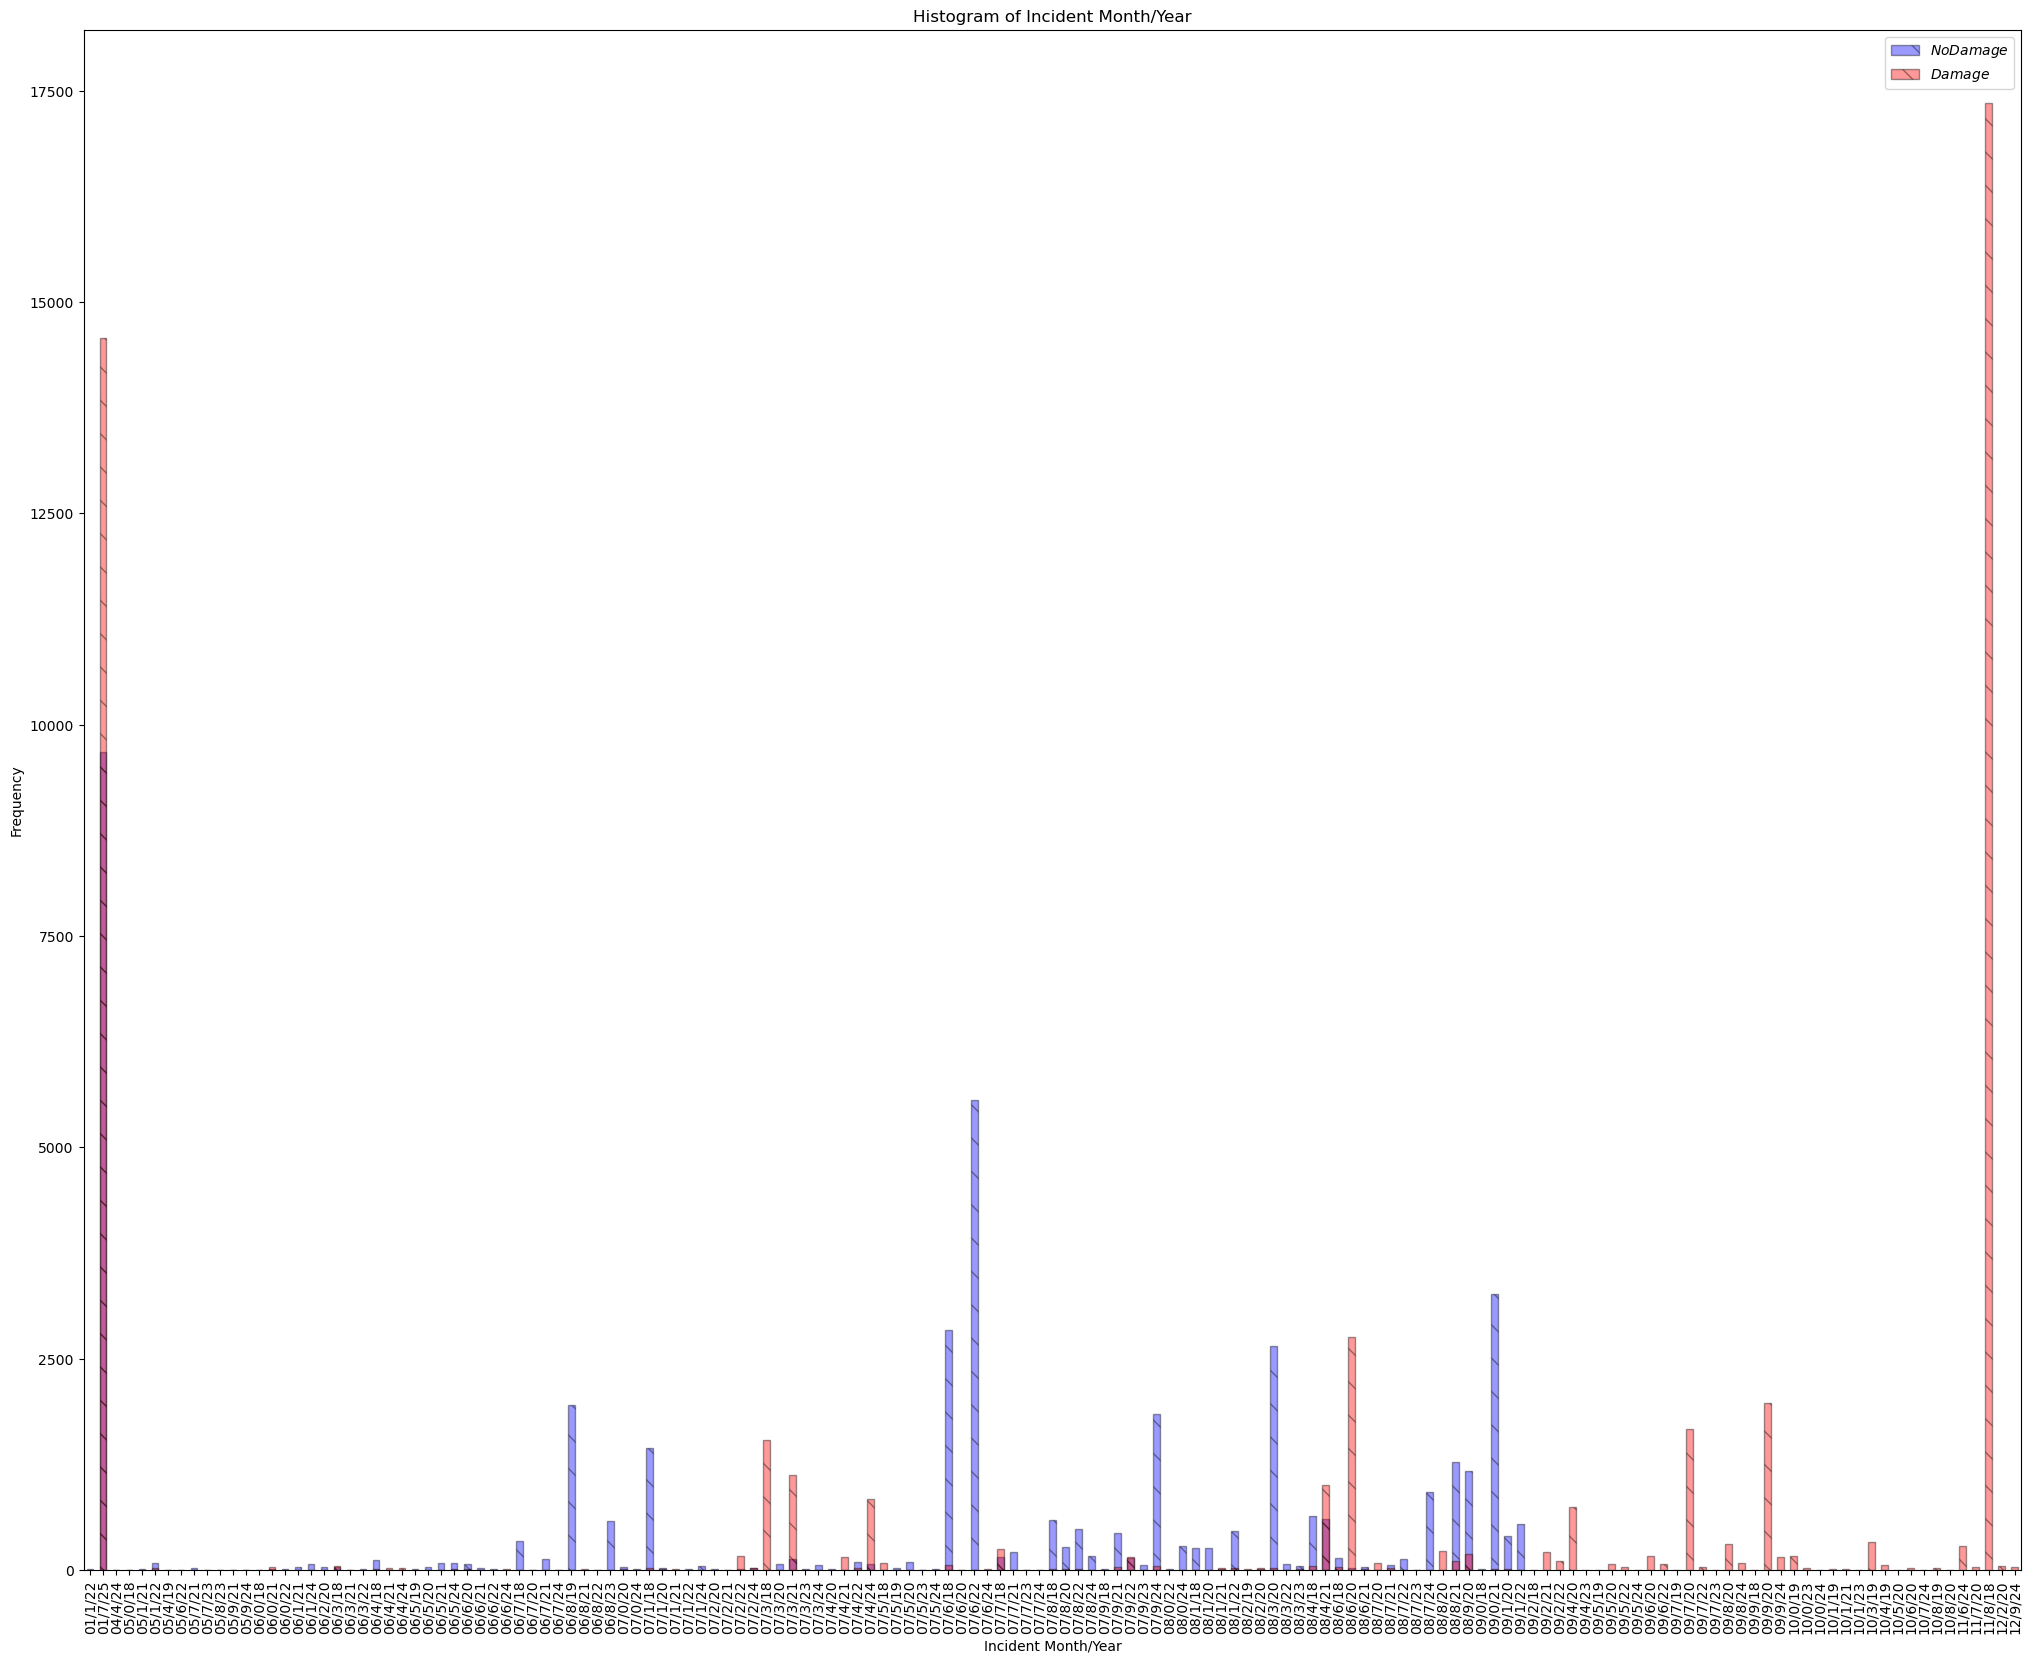

In [138]:
print(cal_fire_data['Incident Month/Year'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Incident Month/Year'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Incident Month/Year'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Incident Month/Year'}')
plt.xlabel('Incident Month/Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()


If Affected 1-9% - Where did fire start?
Unknown                              8697
Siding                               1474
Window                                712
Eaves                                 298
Attached Fence                        254
Deck Elevated                         216
Roof                                  212
Attached Patio Cover/Carport          172
Fire                                  151
Deck on Grade                         127
Not Applicable                         23
Vent                                   19
A/B side                                1
Swamp Cooler Machinery Filter           1
South End, Charlie side.                1
Bravo side, opposite of road side       1
A/B side corner                         1
B side                                  1
Name: count, dtype: int64


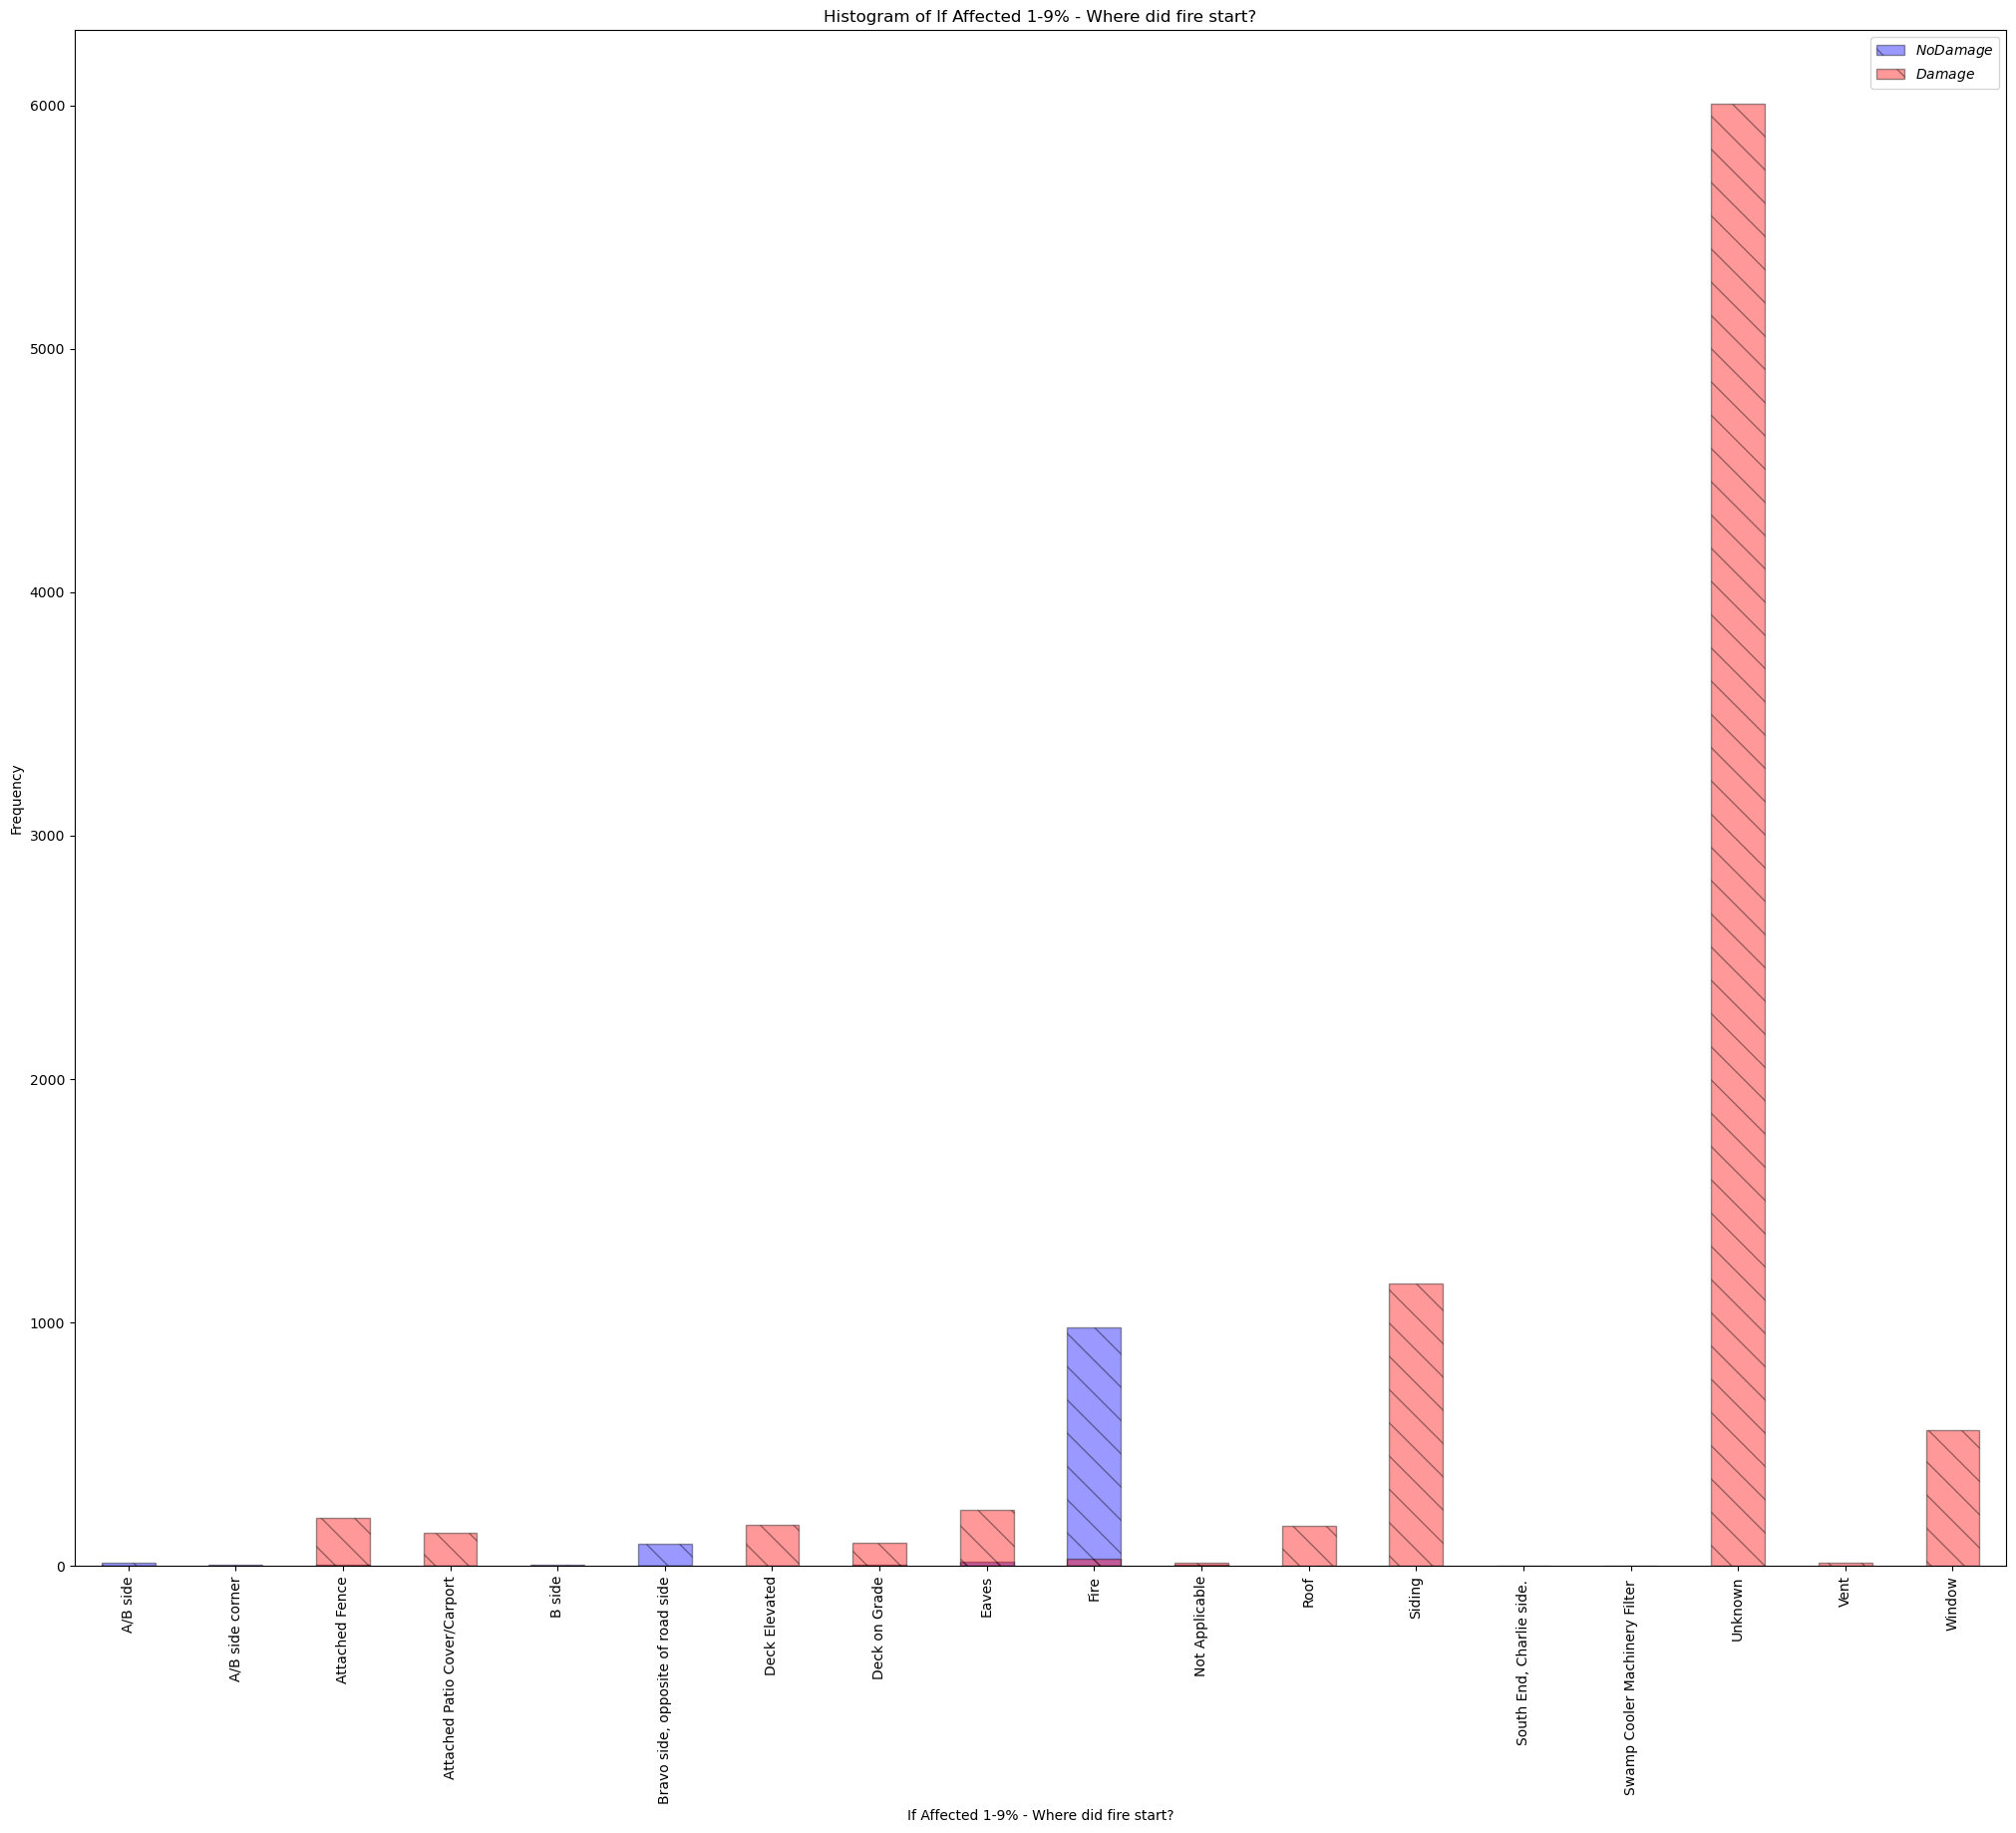

In [139]:
print(cal_fire_data['If Affected 1-9% - Where did fire start?'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['If Affected 1-9% - Where did fire start?'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['If Affected 1-9% - Where did fire start?'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'If Affected 1-9% - Where did fire start?'}')
plt.xlabel('If Affected 1-9% - Where did fire start?')
plt.ylabel('Frequency')
plt.legend()
plt.show()


If Affected 1-9% - What started fire?
Unknown                                  5791
Direct flame impingement                 2529
Radiant Heat                             1564
Embers                                    730
Not Applicable                             18
Bushes                                      2
Embers or overheated electrical motor       1
Post on structure                           1
0-10                                        1
Name: count, dtype: int64


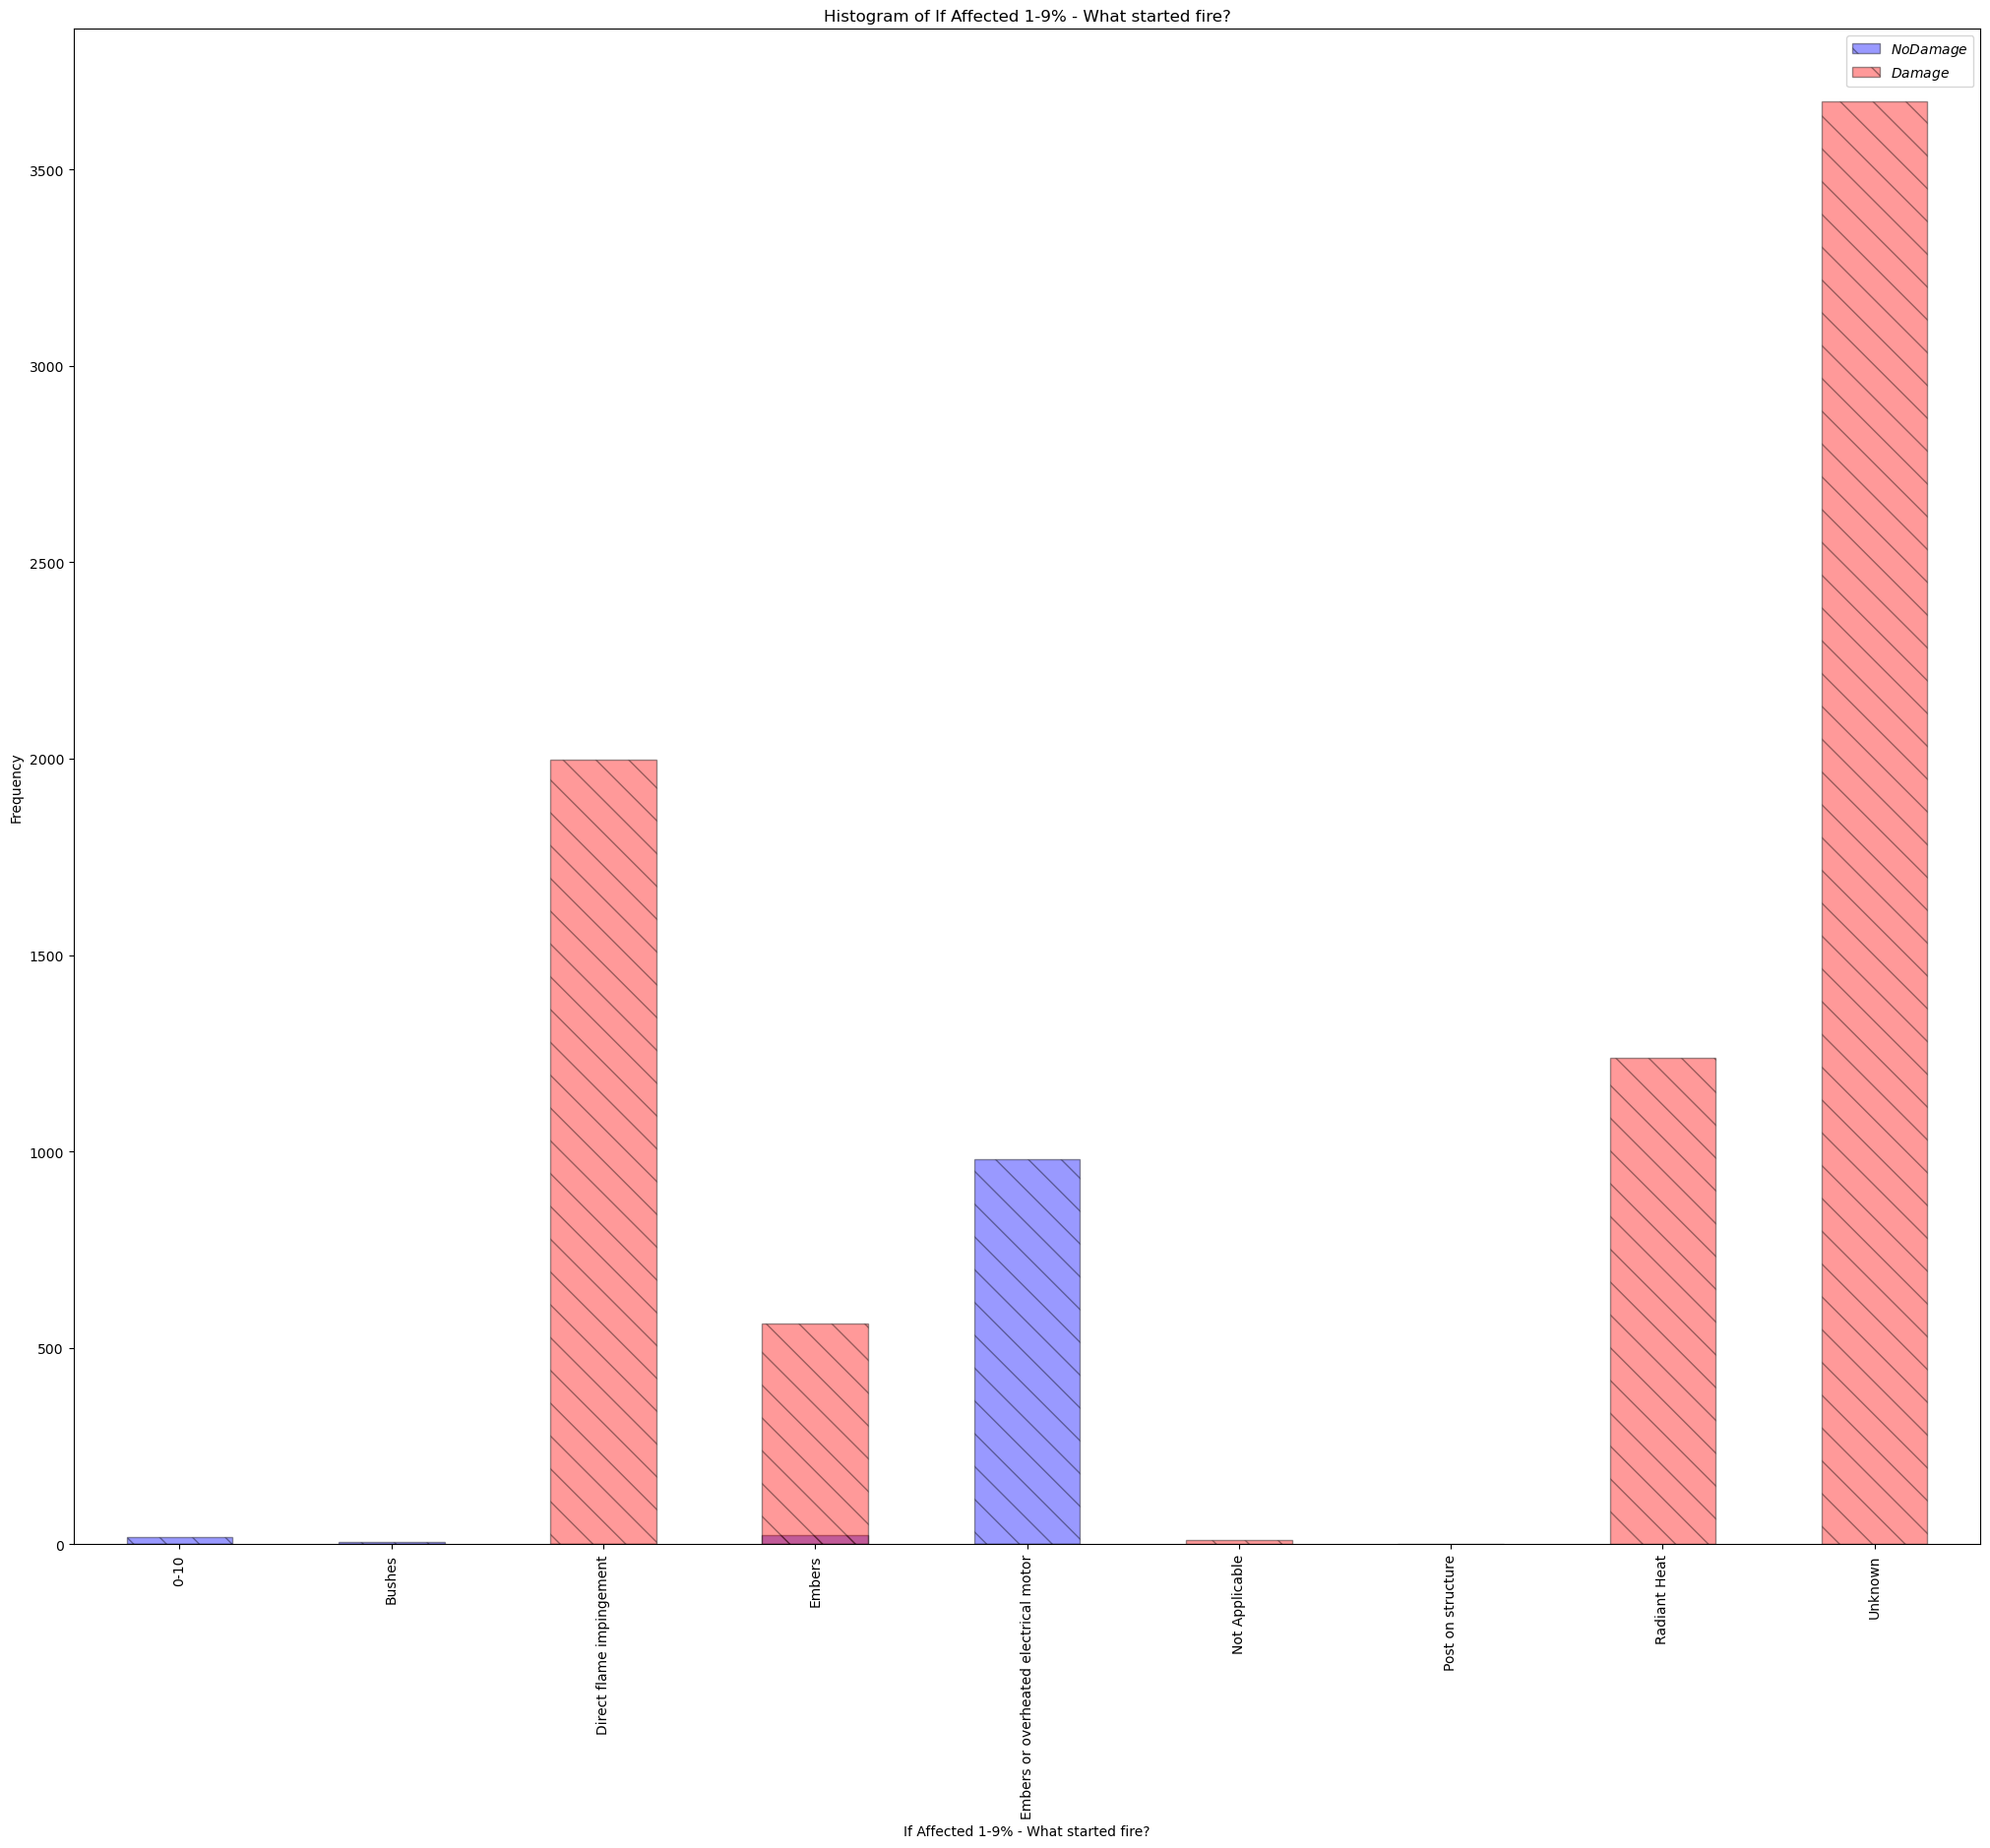

In [140]:
print(cal_fire_data['If Affected 1-9% - What started fire?'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['If Affected 1-9% - What started fire?'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['If Affected 1-9% - What started fire?'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'If Affected 1-9% - What started fire?'}')
plt.xlabel('If Affected 1-9% - What started fire?')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Structure Defense Actions Taken
Unknown                   27501
Engine Company Actions     3556
Combination of Actions     2452
Fire Department             461
Fire Retardant Drop         395
Dozer Fuel Break            393
Hand Crew Fuel Break        388
Other                       324
Civilian                    180
Both                         47
Name: count, dtype: int64


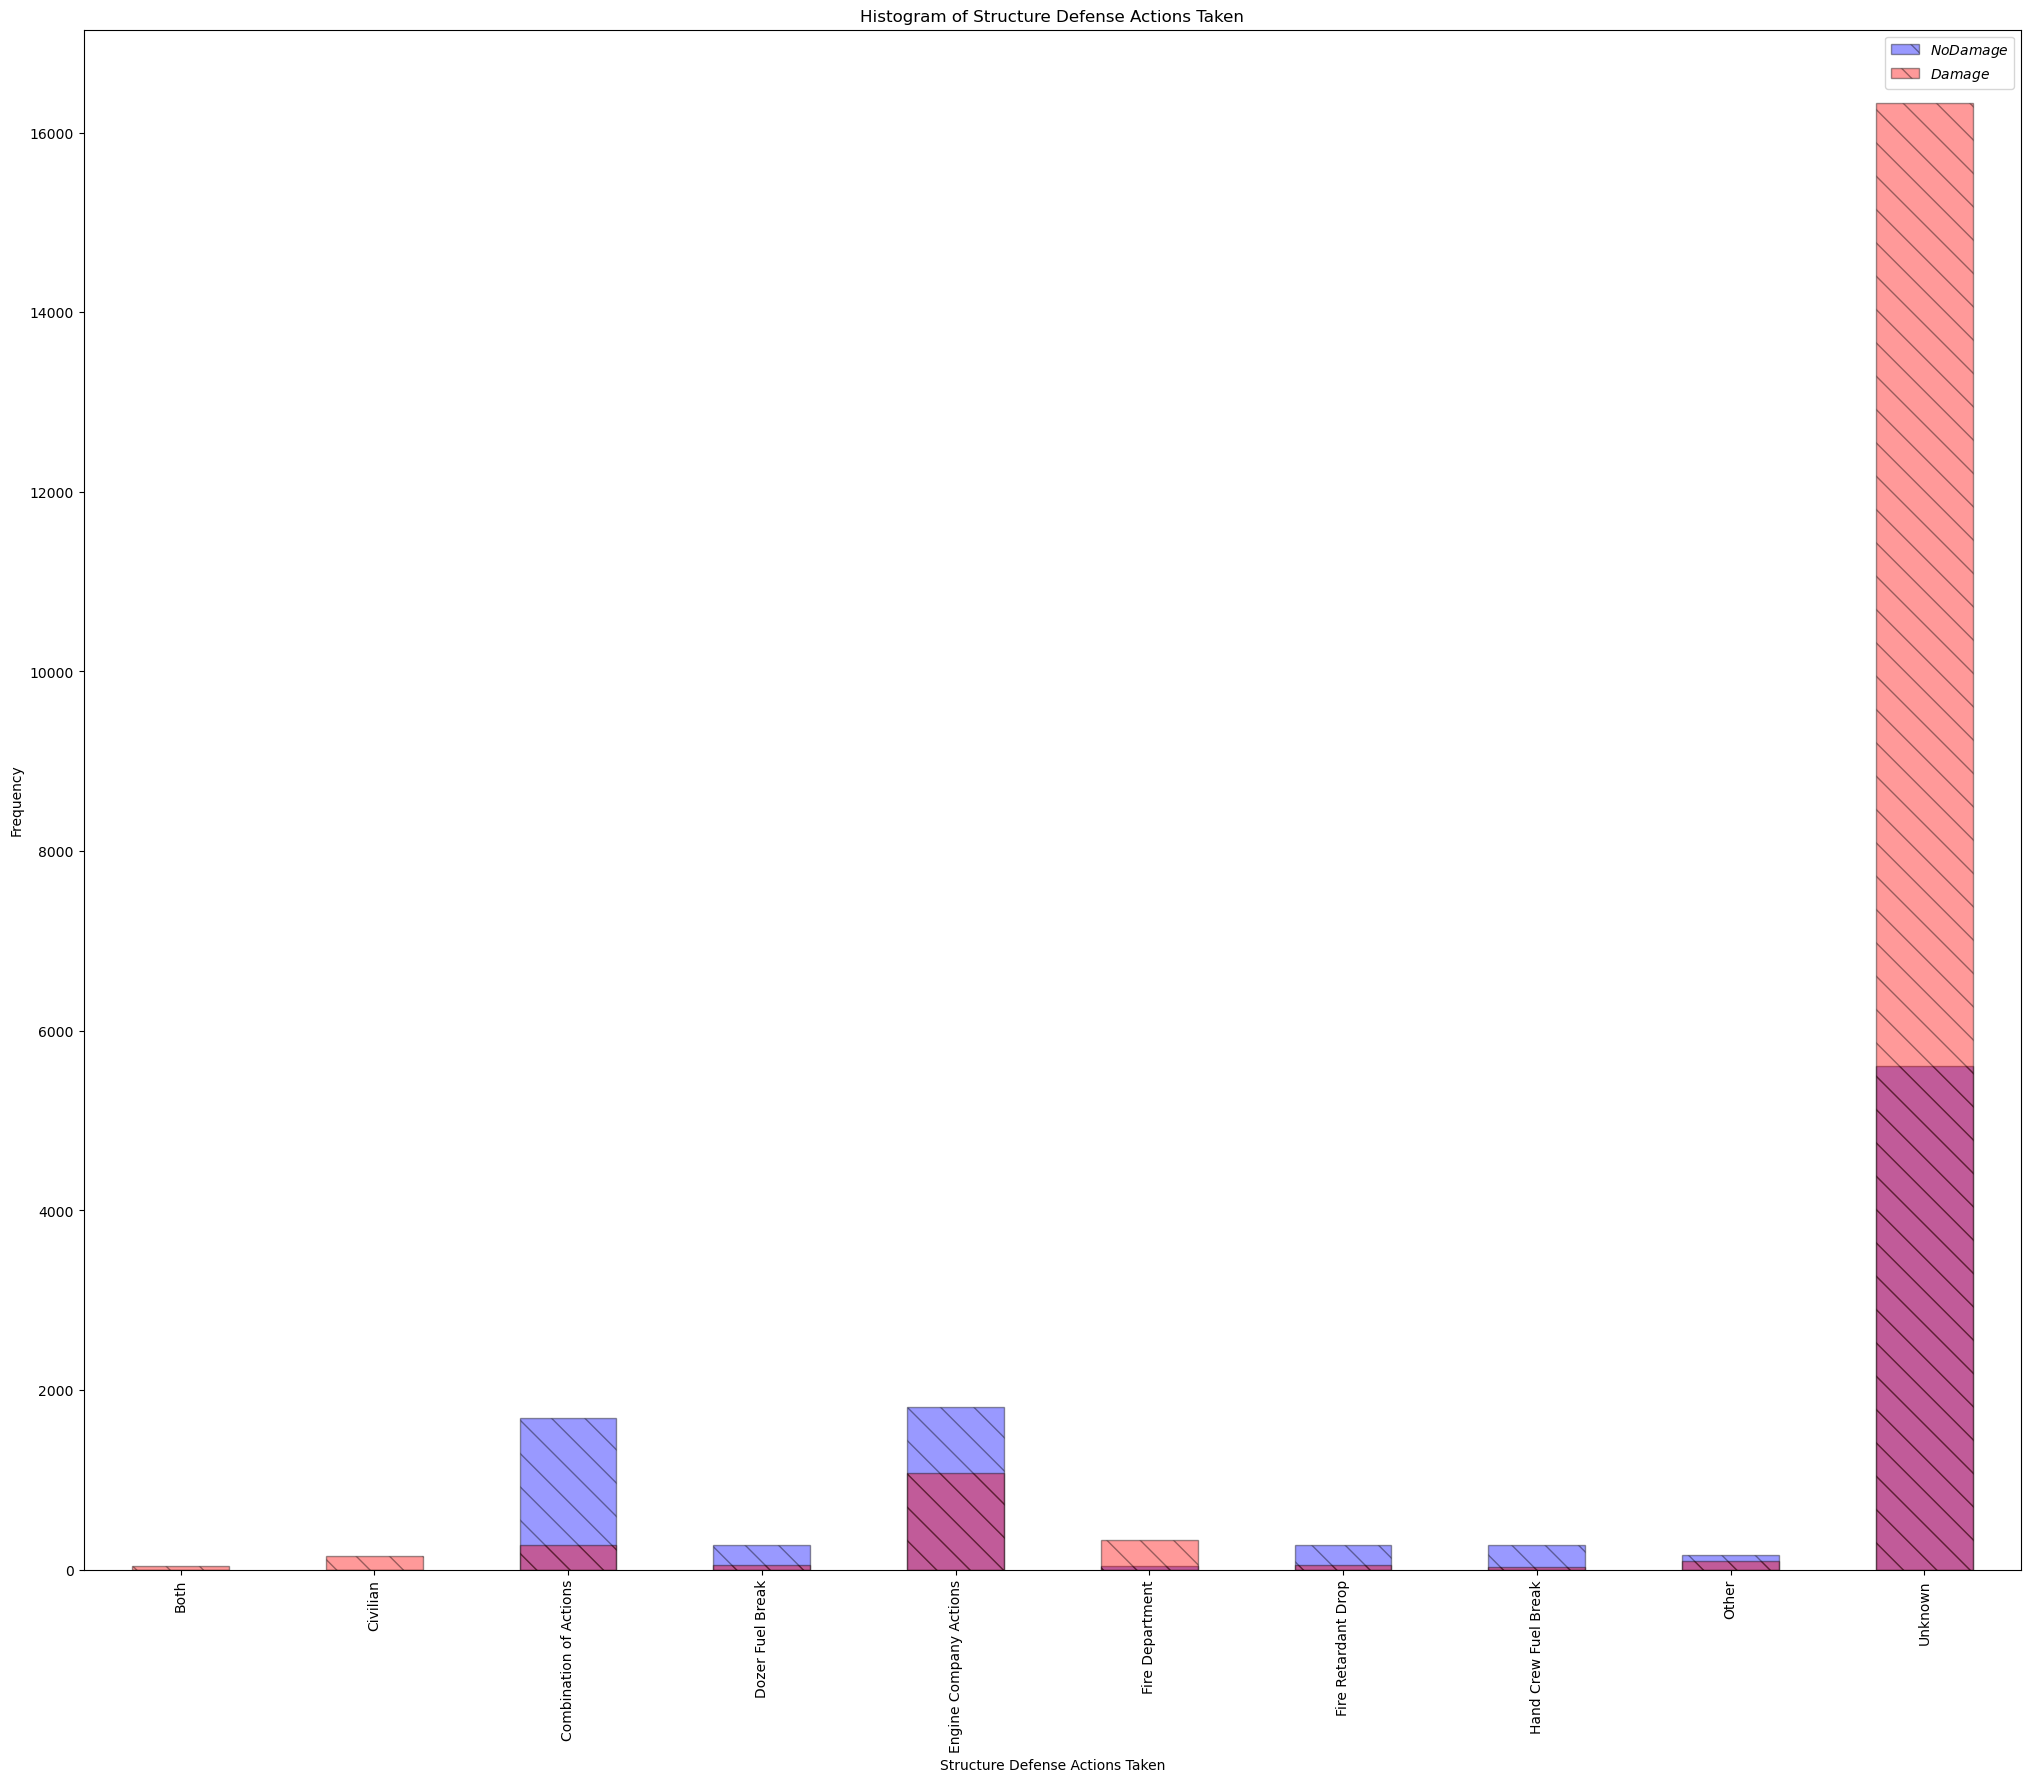

In [141]:
print(cal_fire_data['Structure Defense Actions Taken'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Structure Defense Actions Taken'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Structure Defense Actions Taken'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Structure Defense Actions Taken'}')
plt.xlabel('Structure Defense Actions Taken')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Structure Type
Single Family Residence Single Story    40751
Utility Misc Structure                  29918
Single Family Residence Multi Story     23932
Mobile Home Double Wide                  5263
Commercial Building Single Story         3561
Mobile Home Single Wide                  2624
Motor Home                               1719
Multi Family Residence Multi Story       1250
Infrastructure                            860
Multi Family Residence Single Story       742
Commercial Building Multi Story           616
School                                    537
Mobile Home Triple Wide                   432
Mixed Commercial/Residential              396
Church                                    126
Hospital                                   23
Agriculture                                 7
Single Famliy Residence Single Story        4
Name: count, dtype: int64


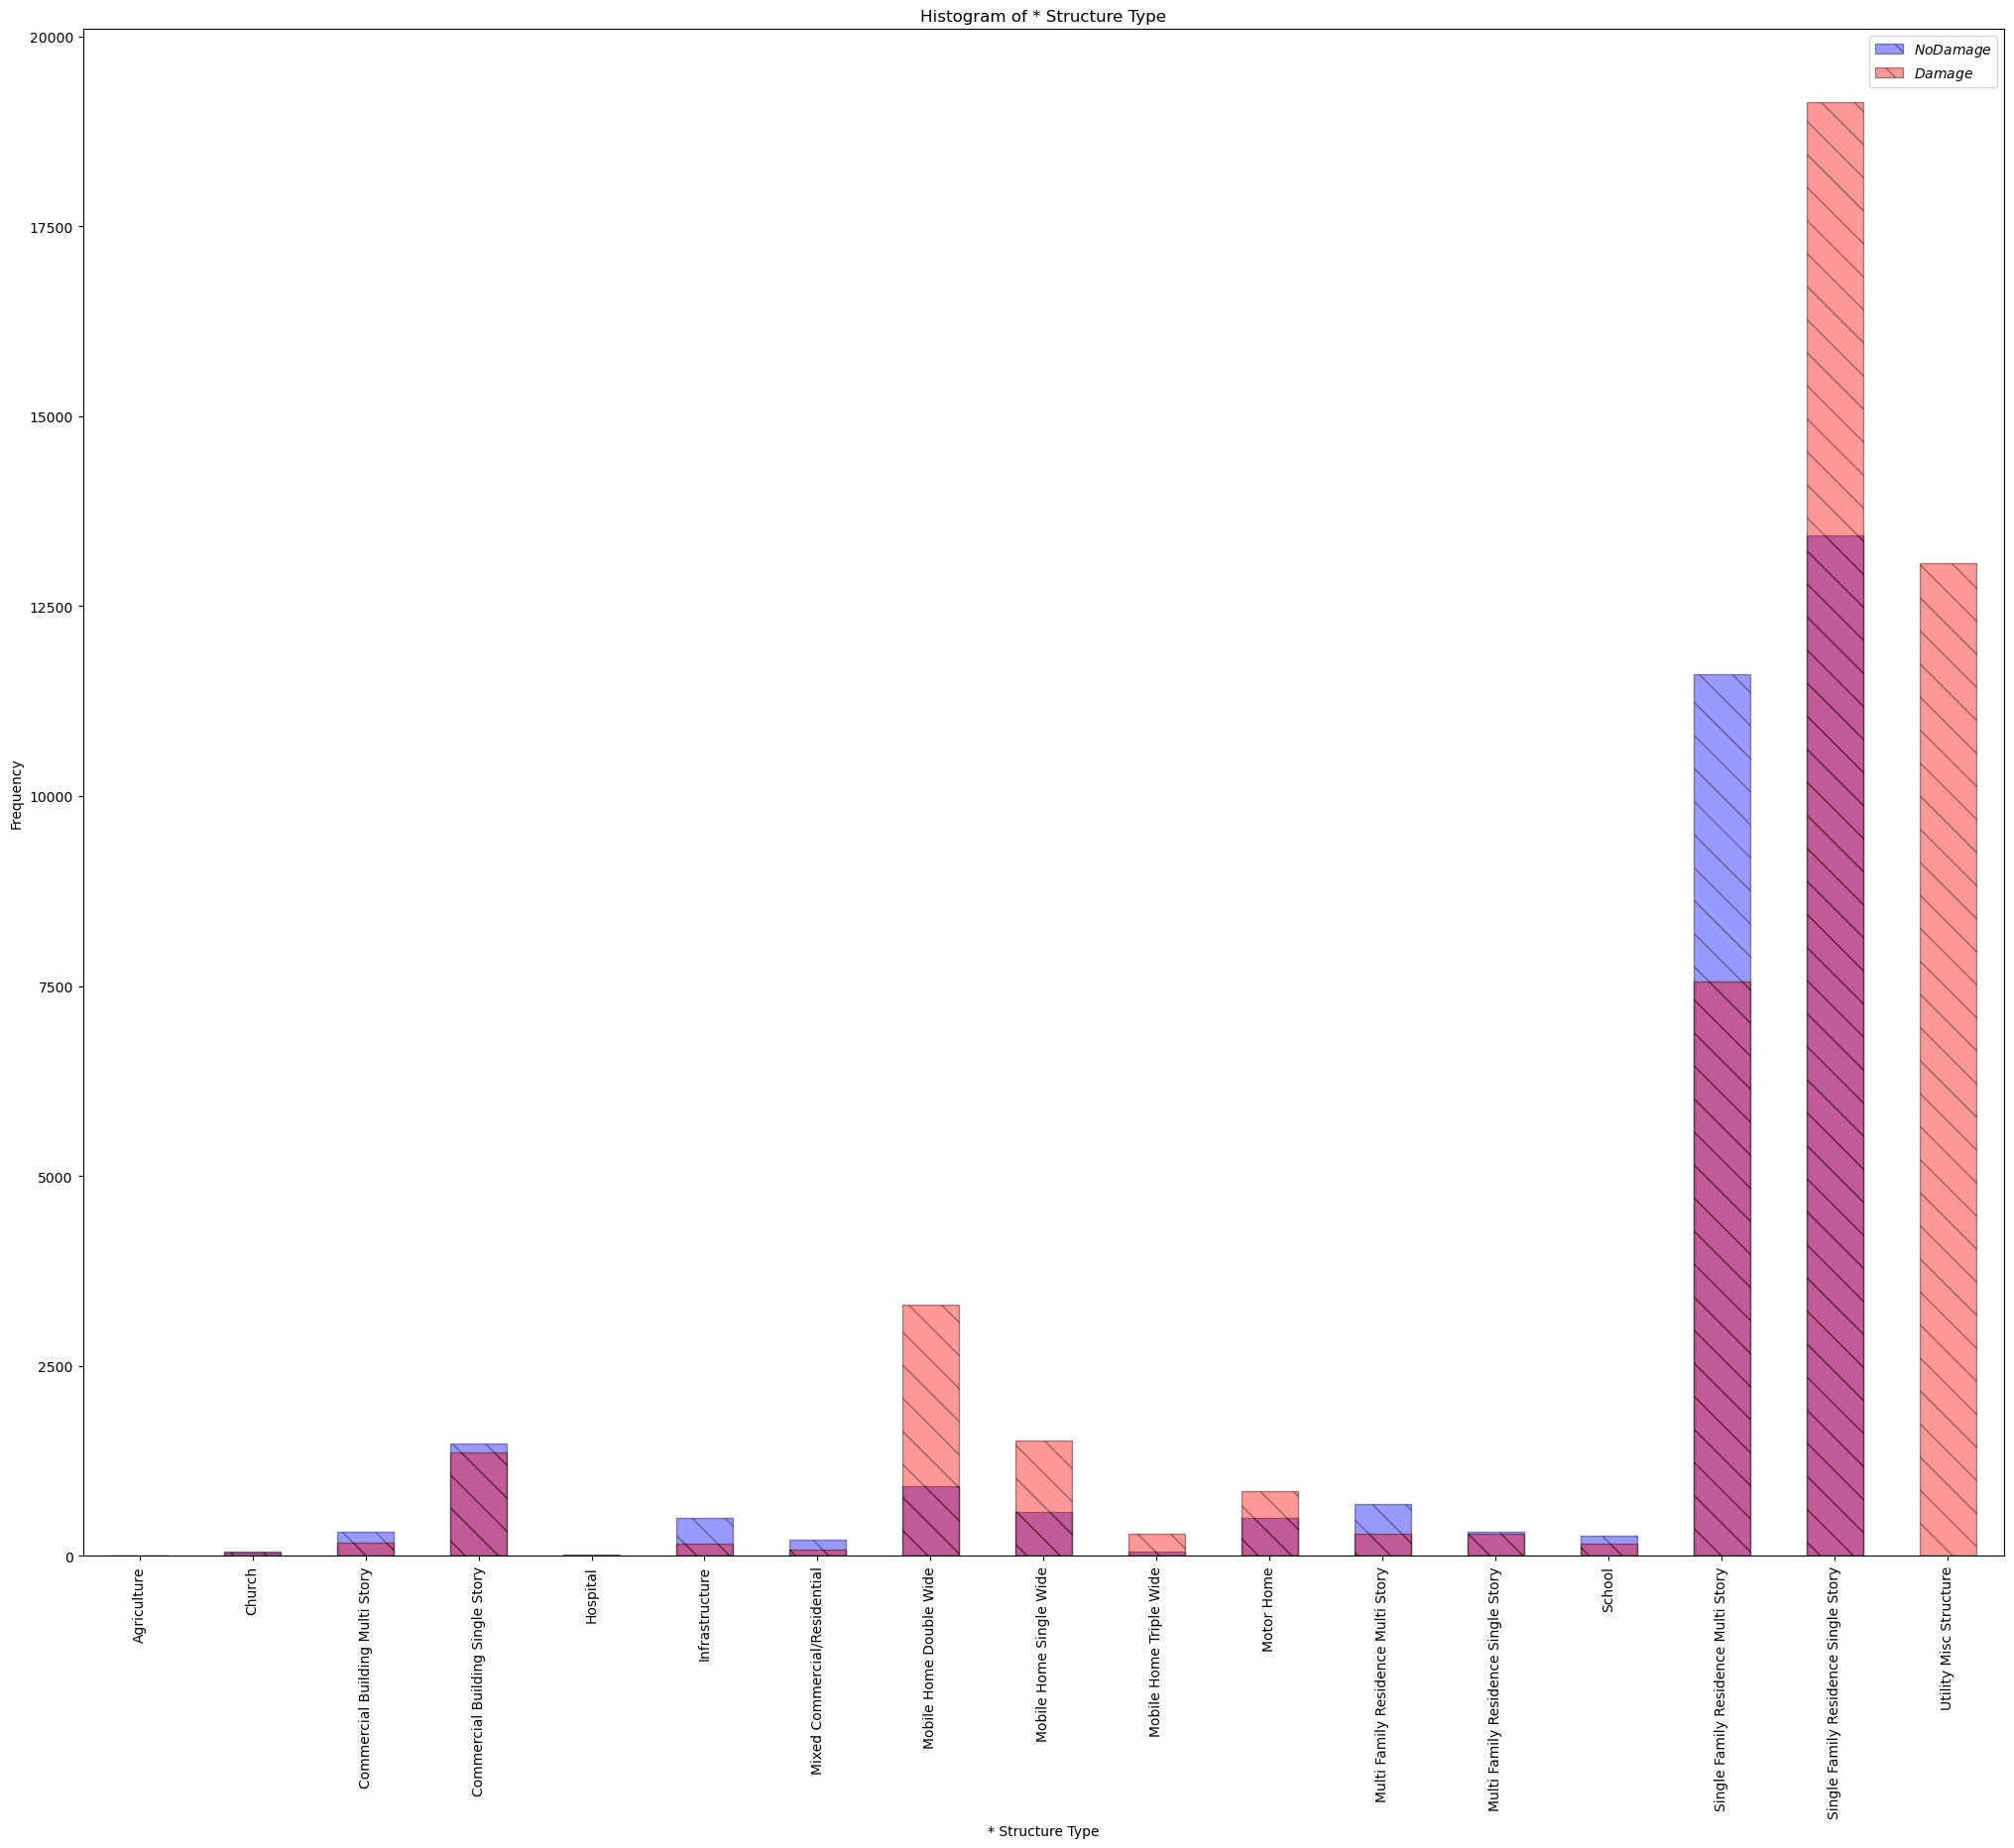

In [142]:
print(cal_fire_data['* Structure Type'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Structure Type'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Structure Type'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Structure Type'}')
plt.xlabel('* Structure Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Structure Category
Single Residence                74720
Other Minor Structure           29918
Nonresidential Commercial        4864
Multiple Residence               1996
Infrastructure                    861
Mixed Commercial/Residential      395
Agriculture                         7
Name: count, dtype: int64


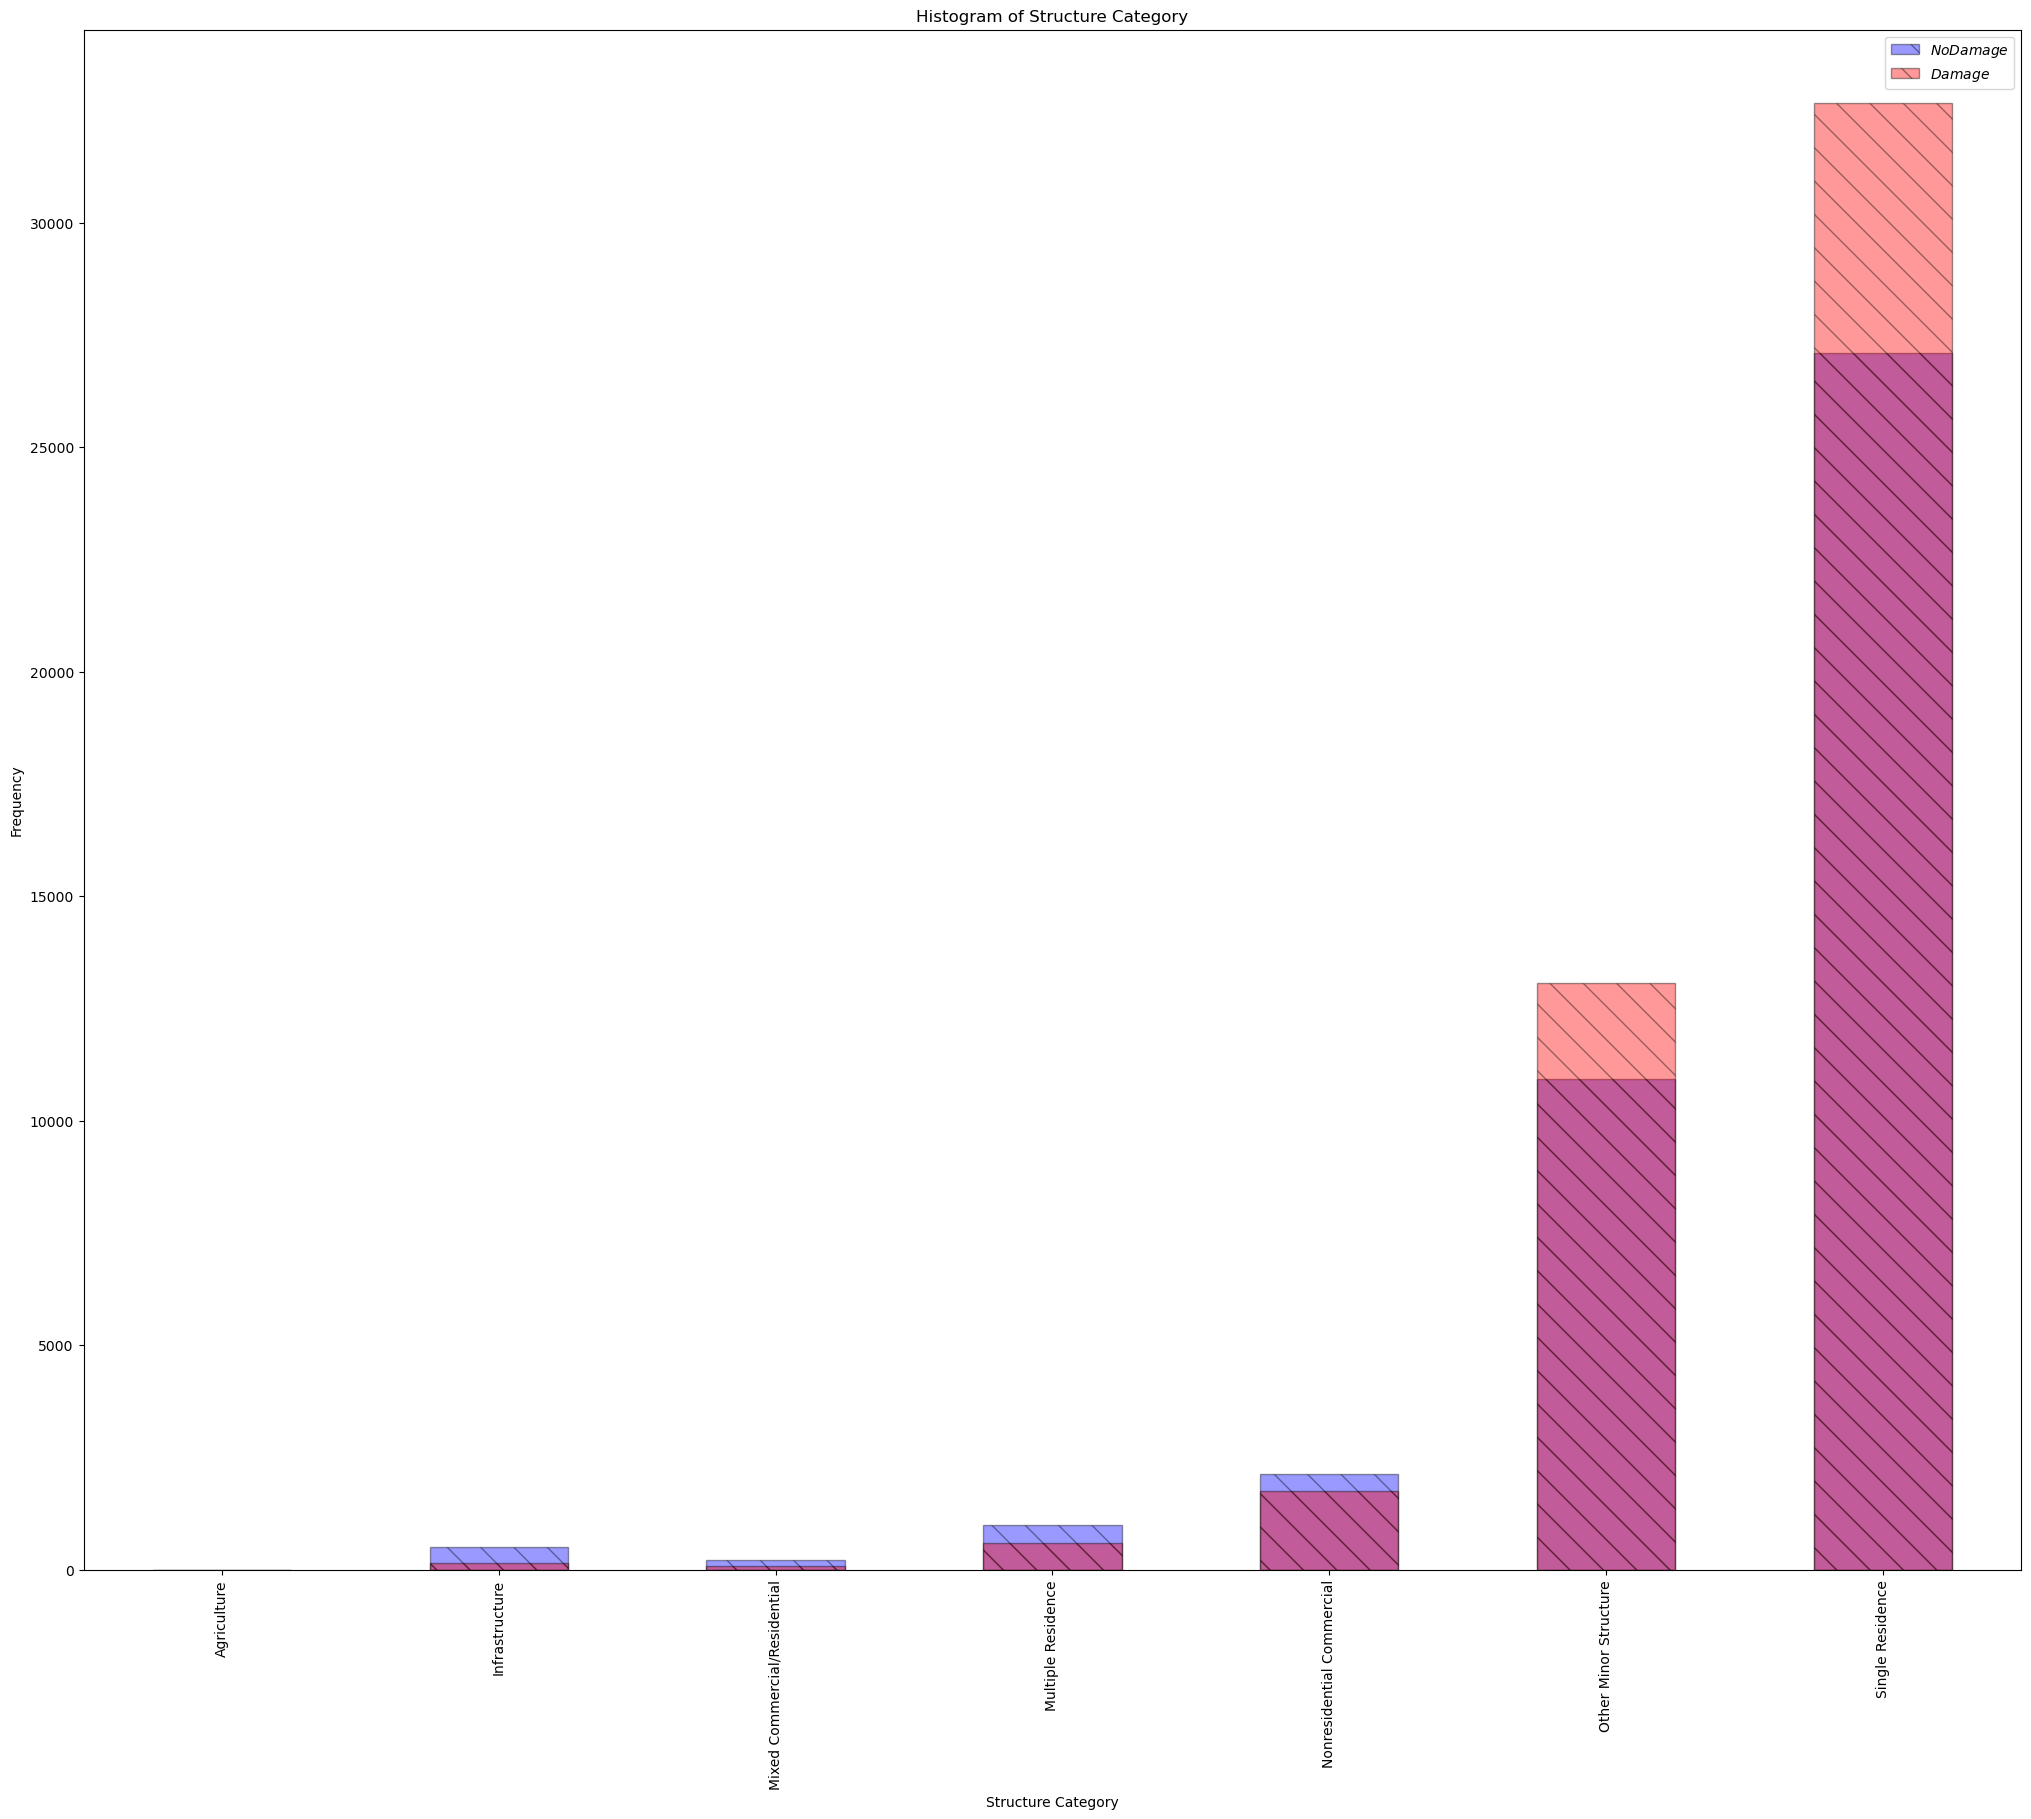

In [143]:
print(cal_fire_data['Structure Category'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Structure Category'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Structure Category'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Structure Category'}')
plt.xlabel('Structure Category')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Units in Structure (if multi unit)
0.0       35326
1.0        1614
2.0         679
4.0         309
3.0         185
6.0         129
8.0         123
10.0        111
5.0          77
7.0          76
9.0          70
20.0         40
40.0         12
60.0          7
80.0          5
11.0          4
14.0          2
12.0          2
100.0         2
30.0          1
16.0          1
15.0          1
160.0         1
168.0         1
6101.0        1
Name: count, dtype: int64


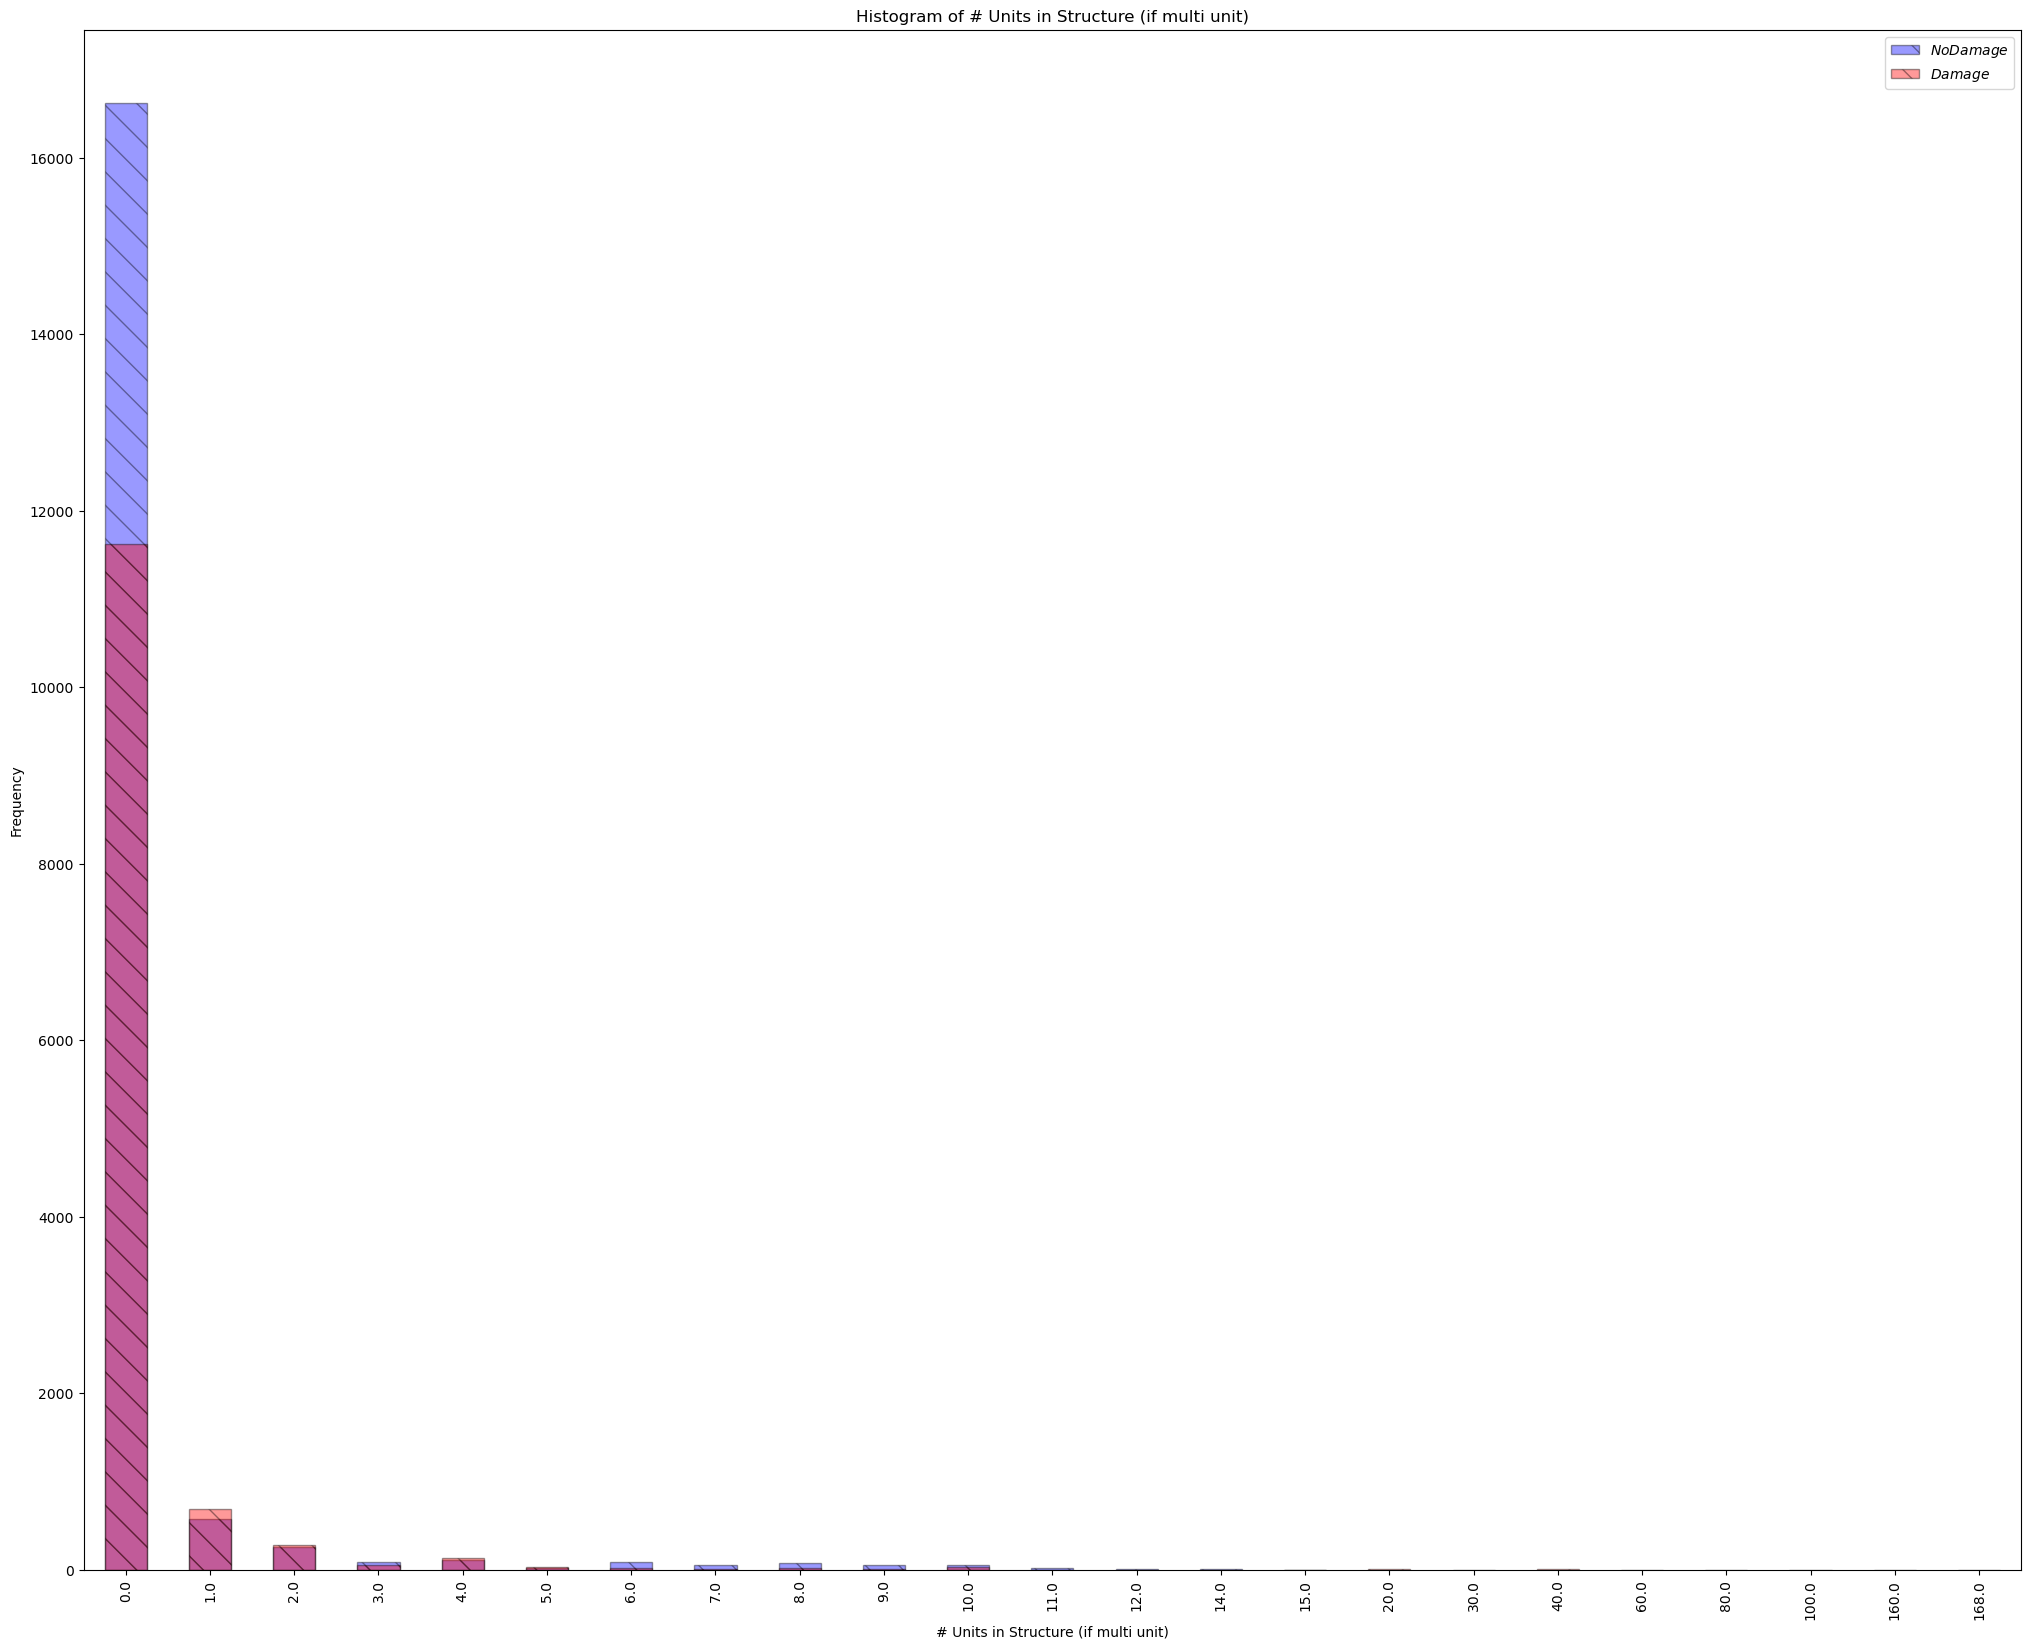

In [144]:
print(cal_fire_data['# Units in Structure (if multi unit)'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['# Units in Structure (if multi unit)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['# Units in Structure (if multi unit)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'# Units in Structure (if multi unit)'}')
plt.xlabel('# Units in Structure (if multi unit)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# of Damaged Outbuildings < 120 SQFT
0.0     38505
1.0      1663
2.0       431
3.0       109
4.0        36
5.0        26
6.0         6
7.0         2
40.0        1
9.0         1
Name: count, dtype: int64


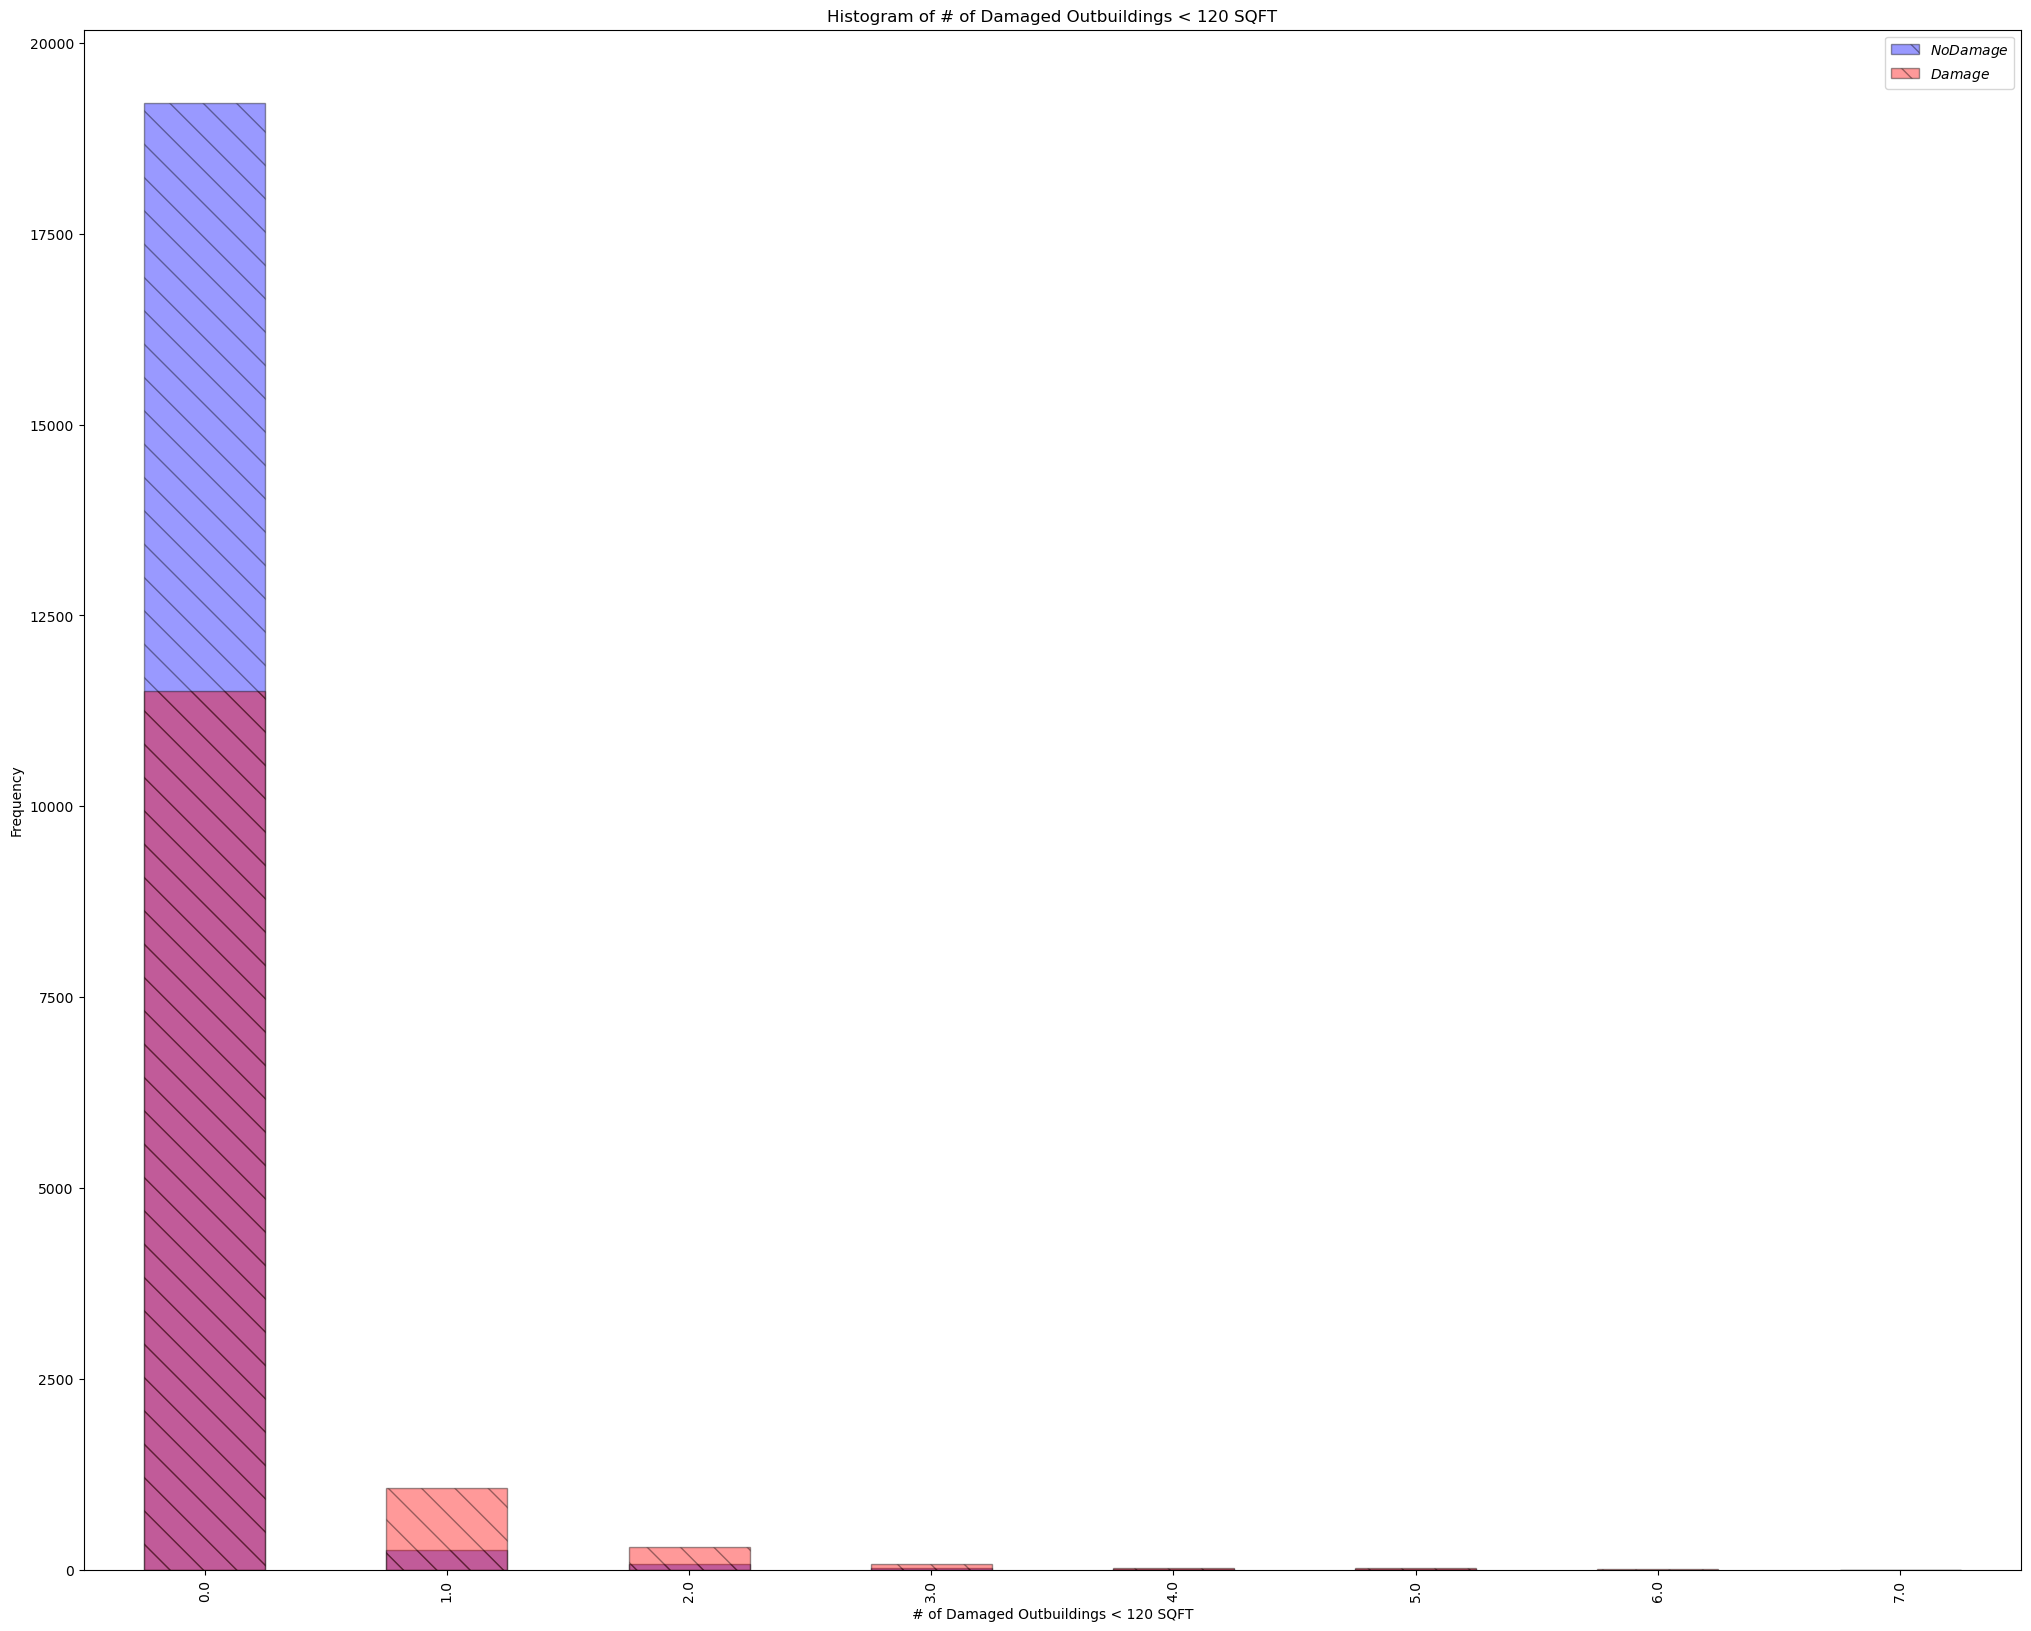

In [145]:
print(cal_fire_data['# of Damaged Outbuildings < 120 SQFT'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['# of Damaged Outbuildings < 120 SQFT'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['# of Damaged Outbuildings < 120 SQFT'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'# of Damaged Outbuildings < 120 SQFT'}')
plt.xlabel('# of Damaged Outbuildings < 120 SQFT')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# of Non Damaged Outbuildings < 120 SQFT
0.0     37873
1.0      1982
2.0       625
3.0       187
4.0        62
5.0        28
10.0       12
6.0        11
8.0         3
7.0         3
20.0        1
9.0         1
Name: count, dtype: int64


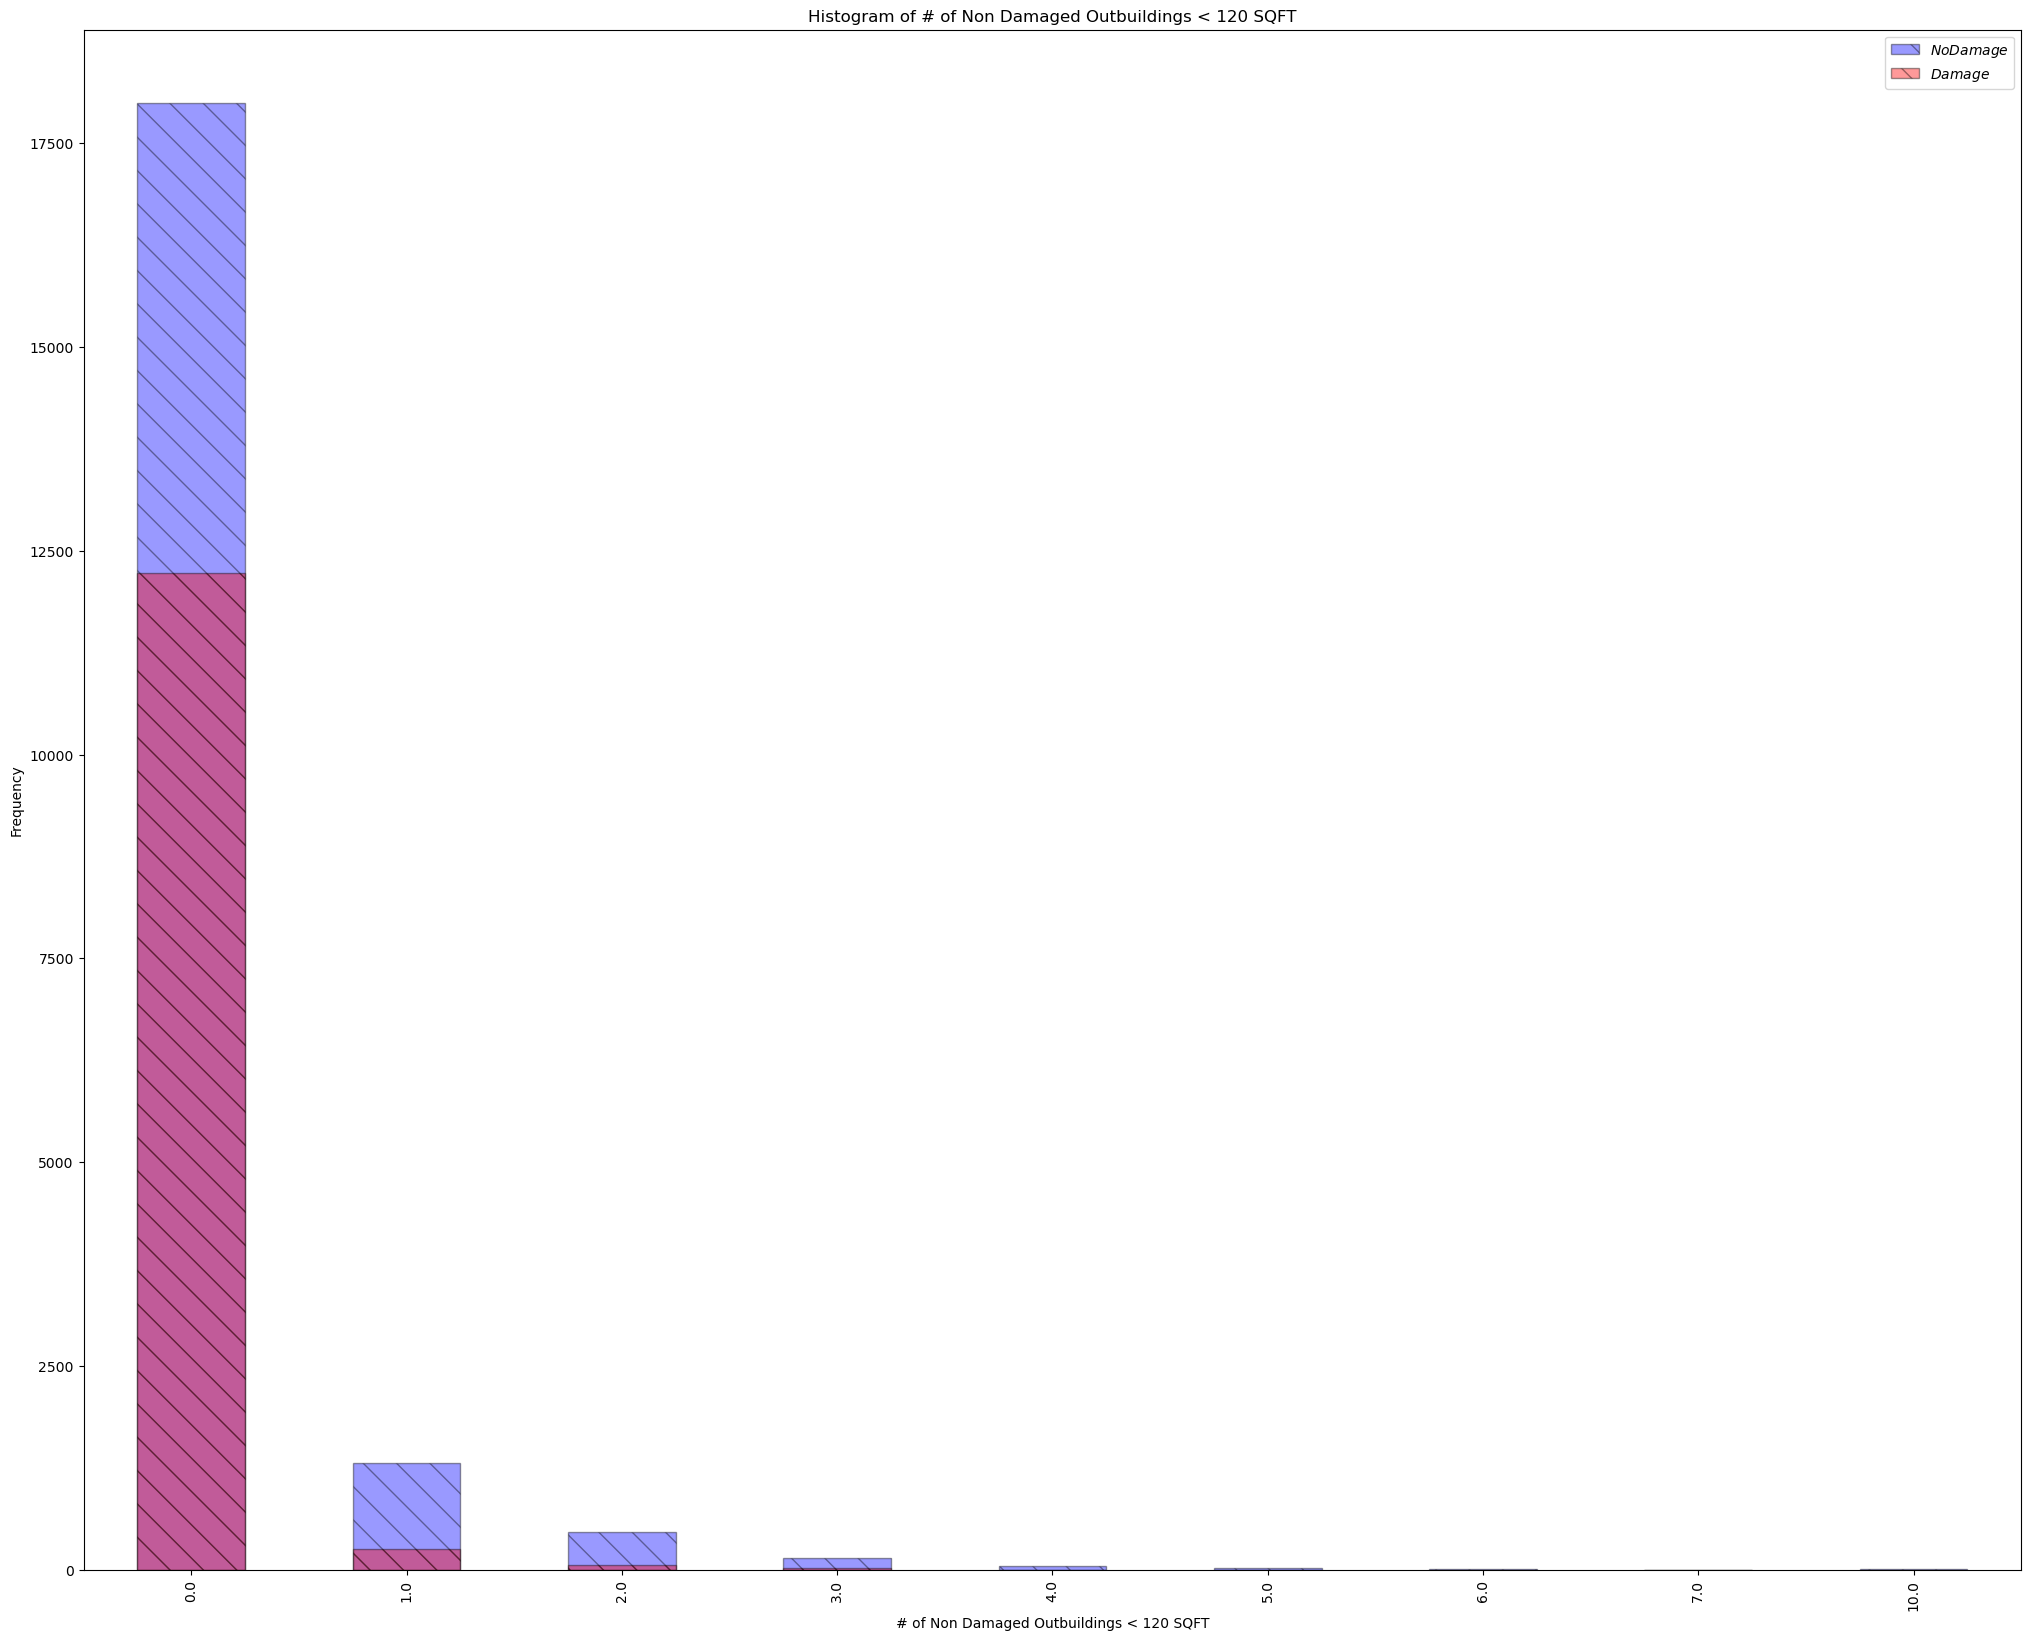

In [146]:
print(cal_fire_data['# of Non Damaged Outbuildings < 120 SQFT'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['# of Non Damaged Outbuildings < 120 SQFT'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['# of Non Damaged Outbuildings < 120 SQFT'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'# of Non Damaged Outbuildings < 120 SQFT'}')
plt.xlabel('# of Non Damaged Outbuildings < 120 SQFT')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Roof Construction
Asphalt            58130
Metal              20660
Unknown            15327
Tile               10726
                    4103
Other               1414
Wood                1306
Concrete            1092
No Deck/Porch          1
Combustible            1
Non Combustible        1
Name: count, dtype: int64


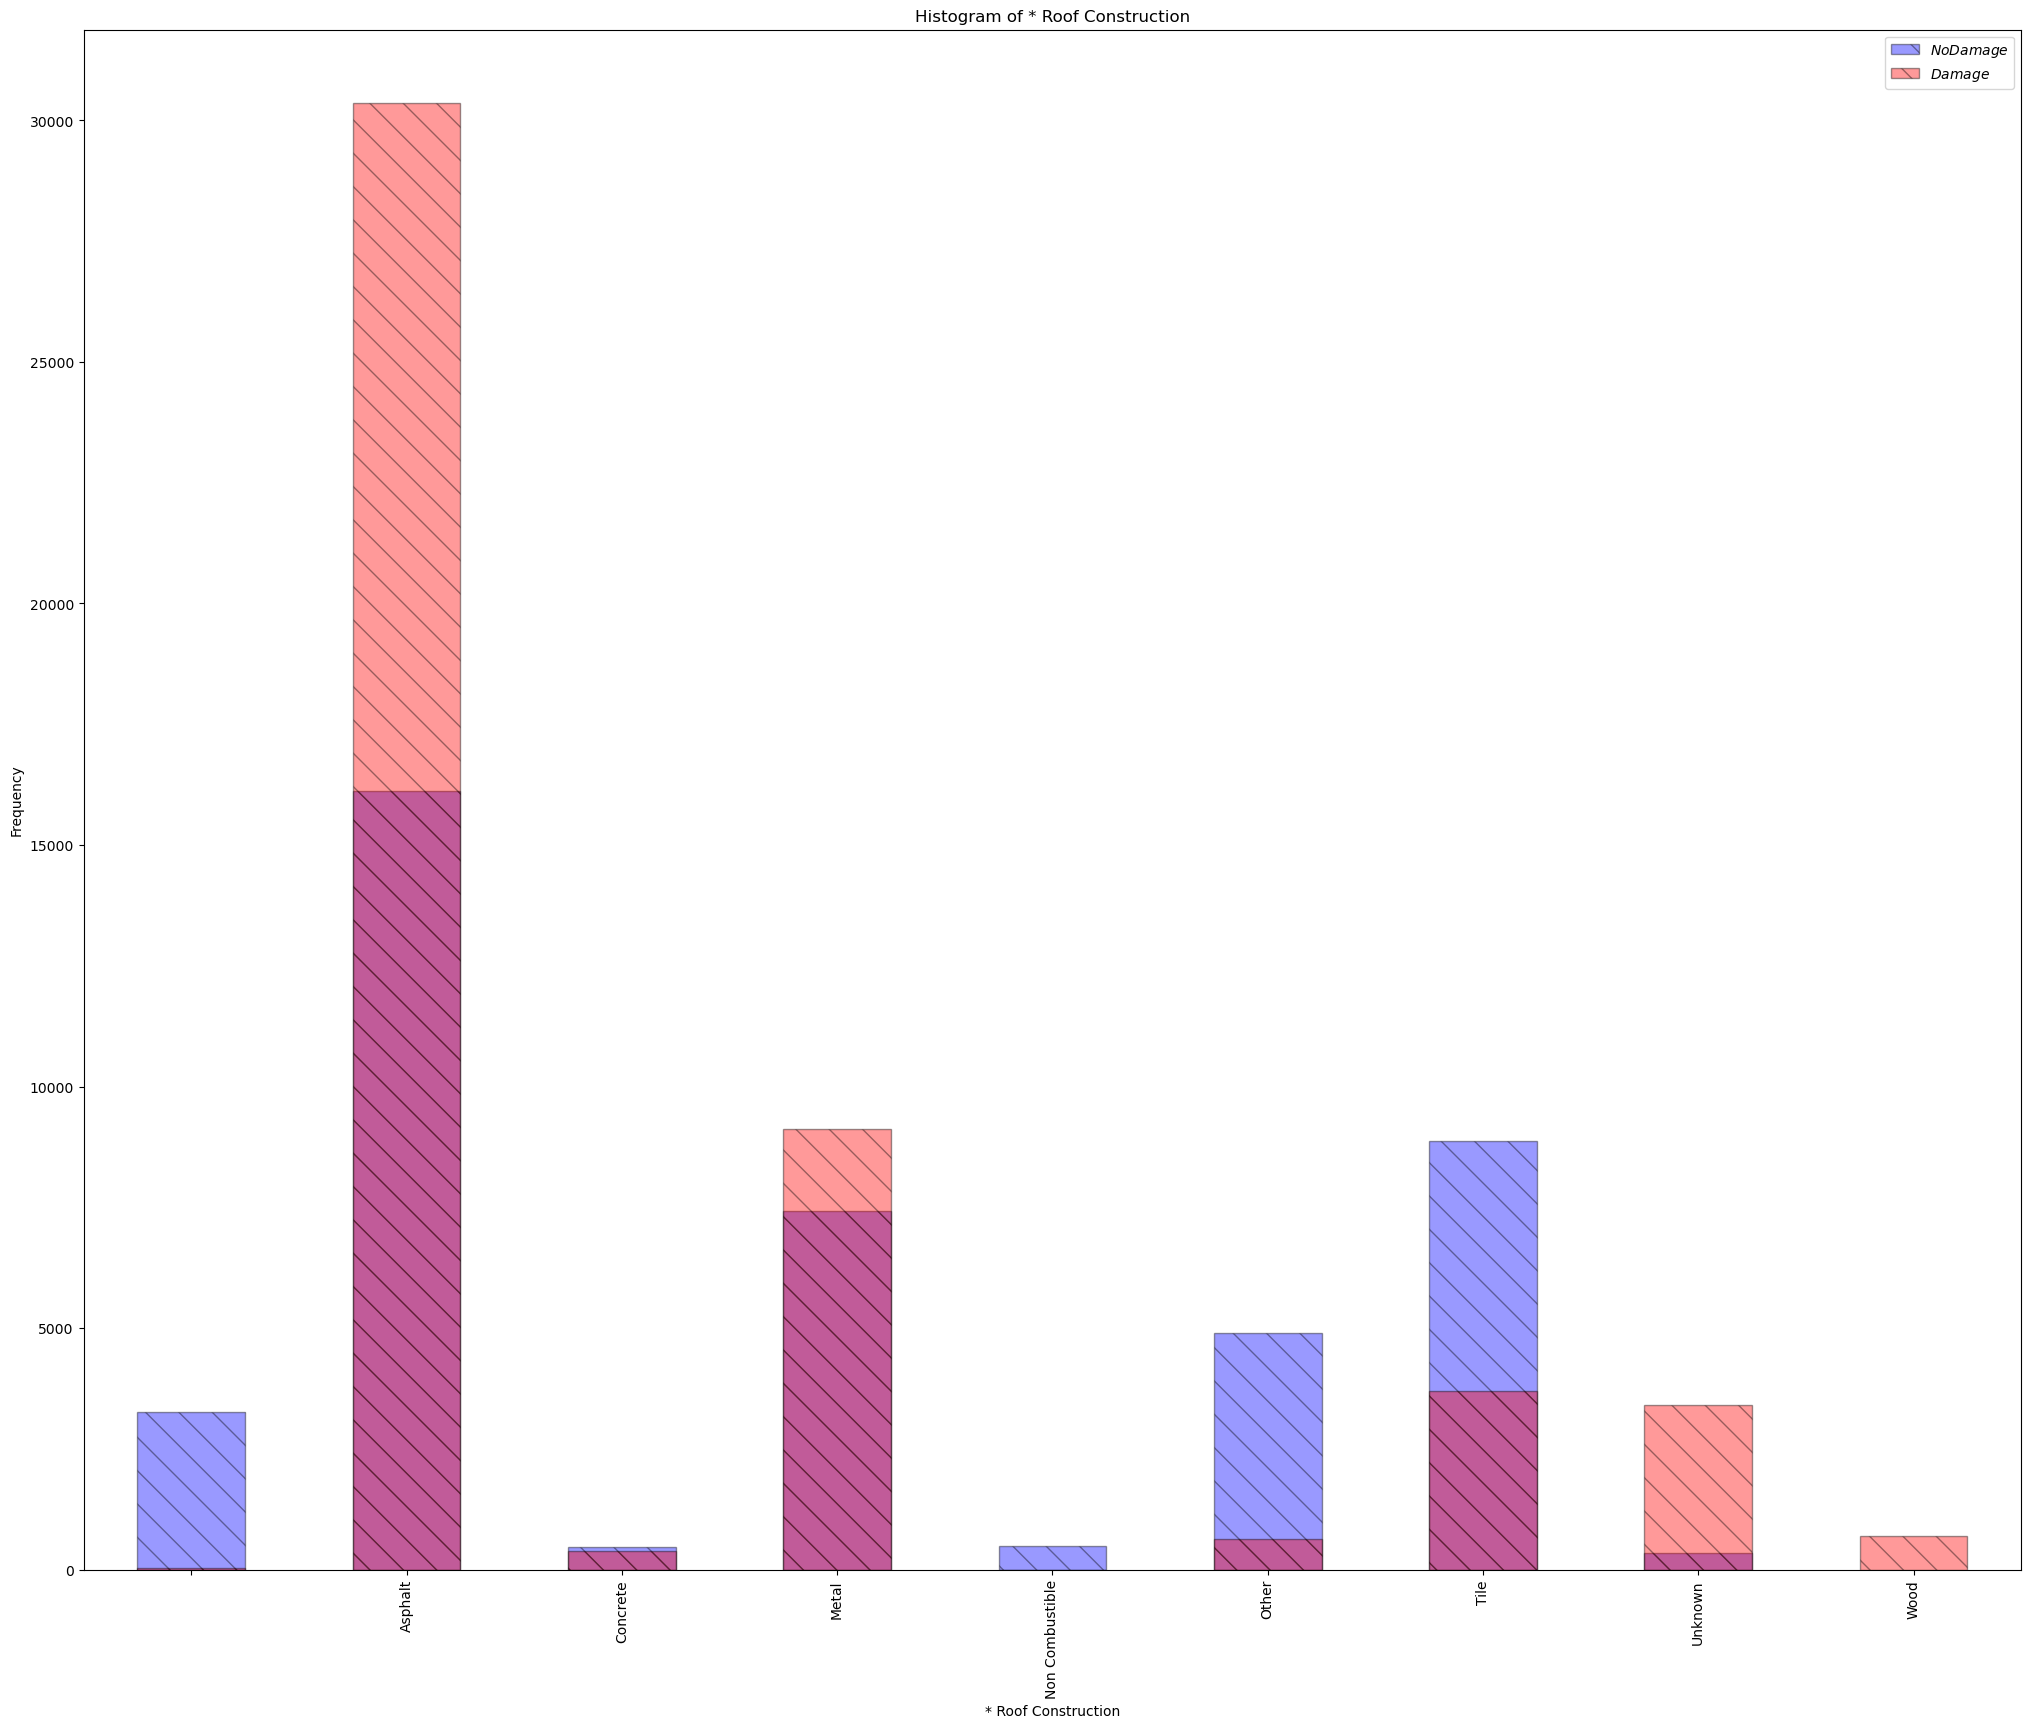

In [147]:
print(cal_fire_data['* Roof Construction'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Roof Construction'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Roof Construction'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Roof Construction'}')
plt.xlabel('* Roof Construction')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Eaves
Unenclosed     41165
Unknown        39906
Enclosed       14224
No Eaves       13361
                4103
Combustible        2
Name: count, dtype: int64


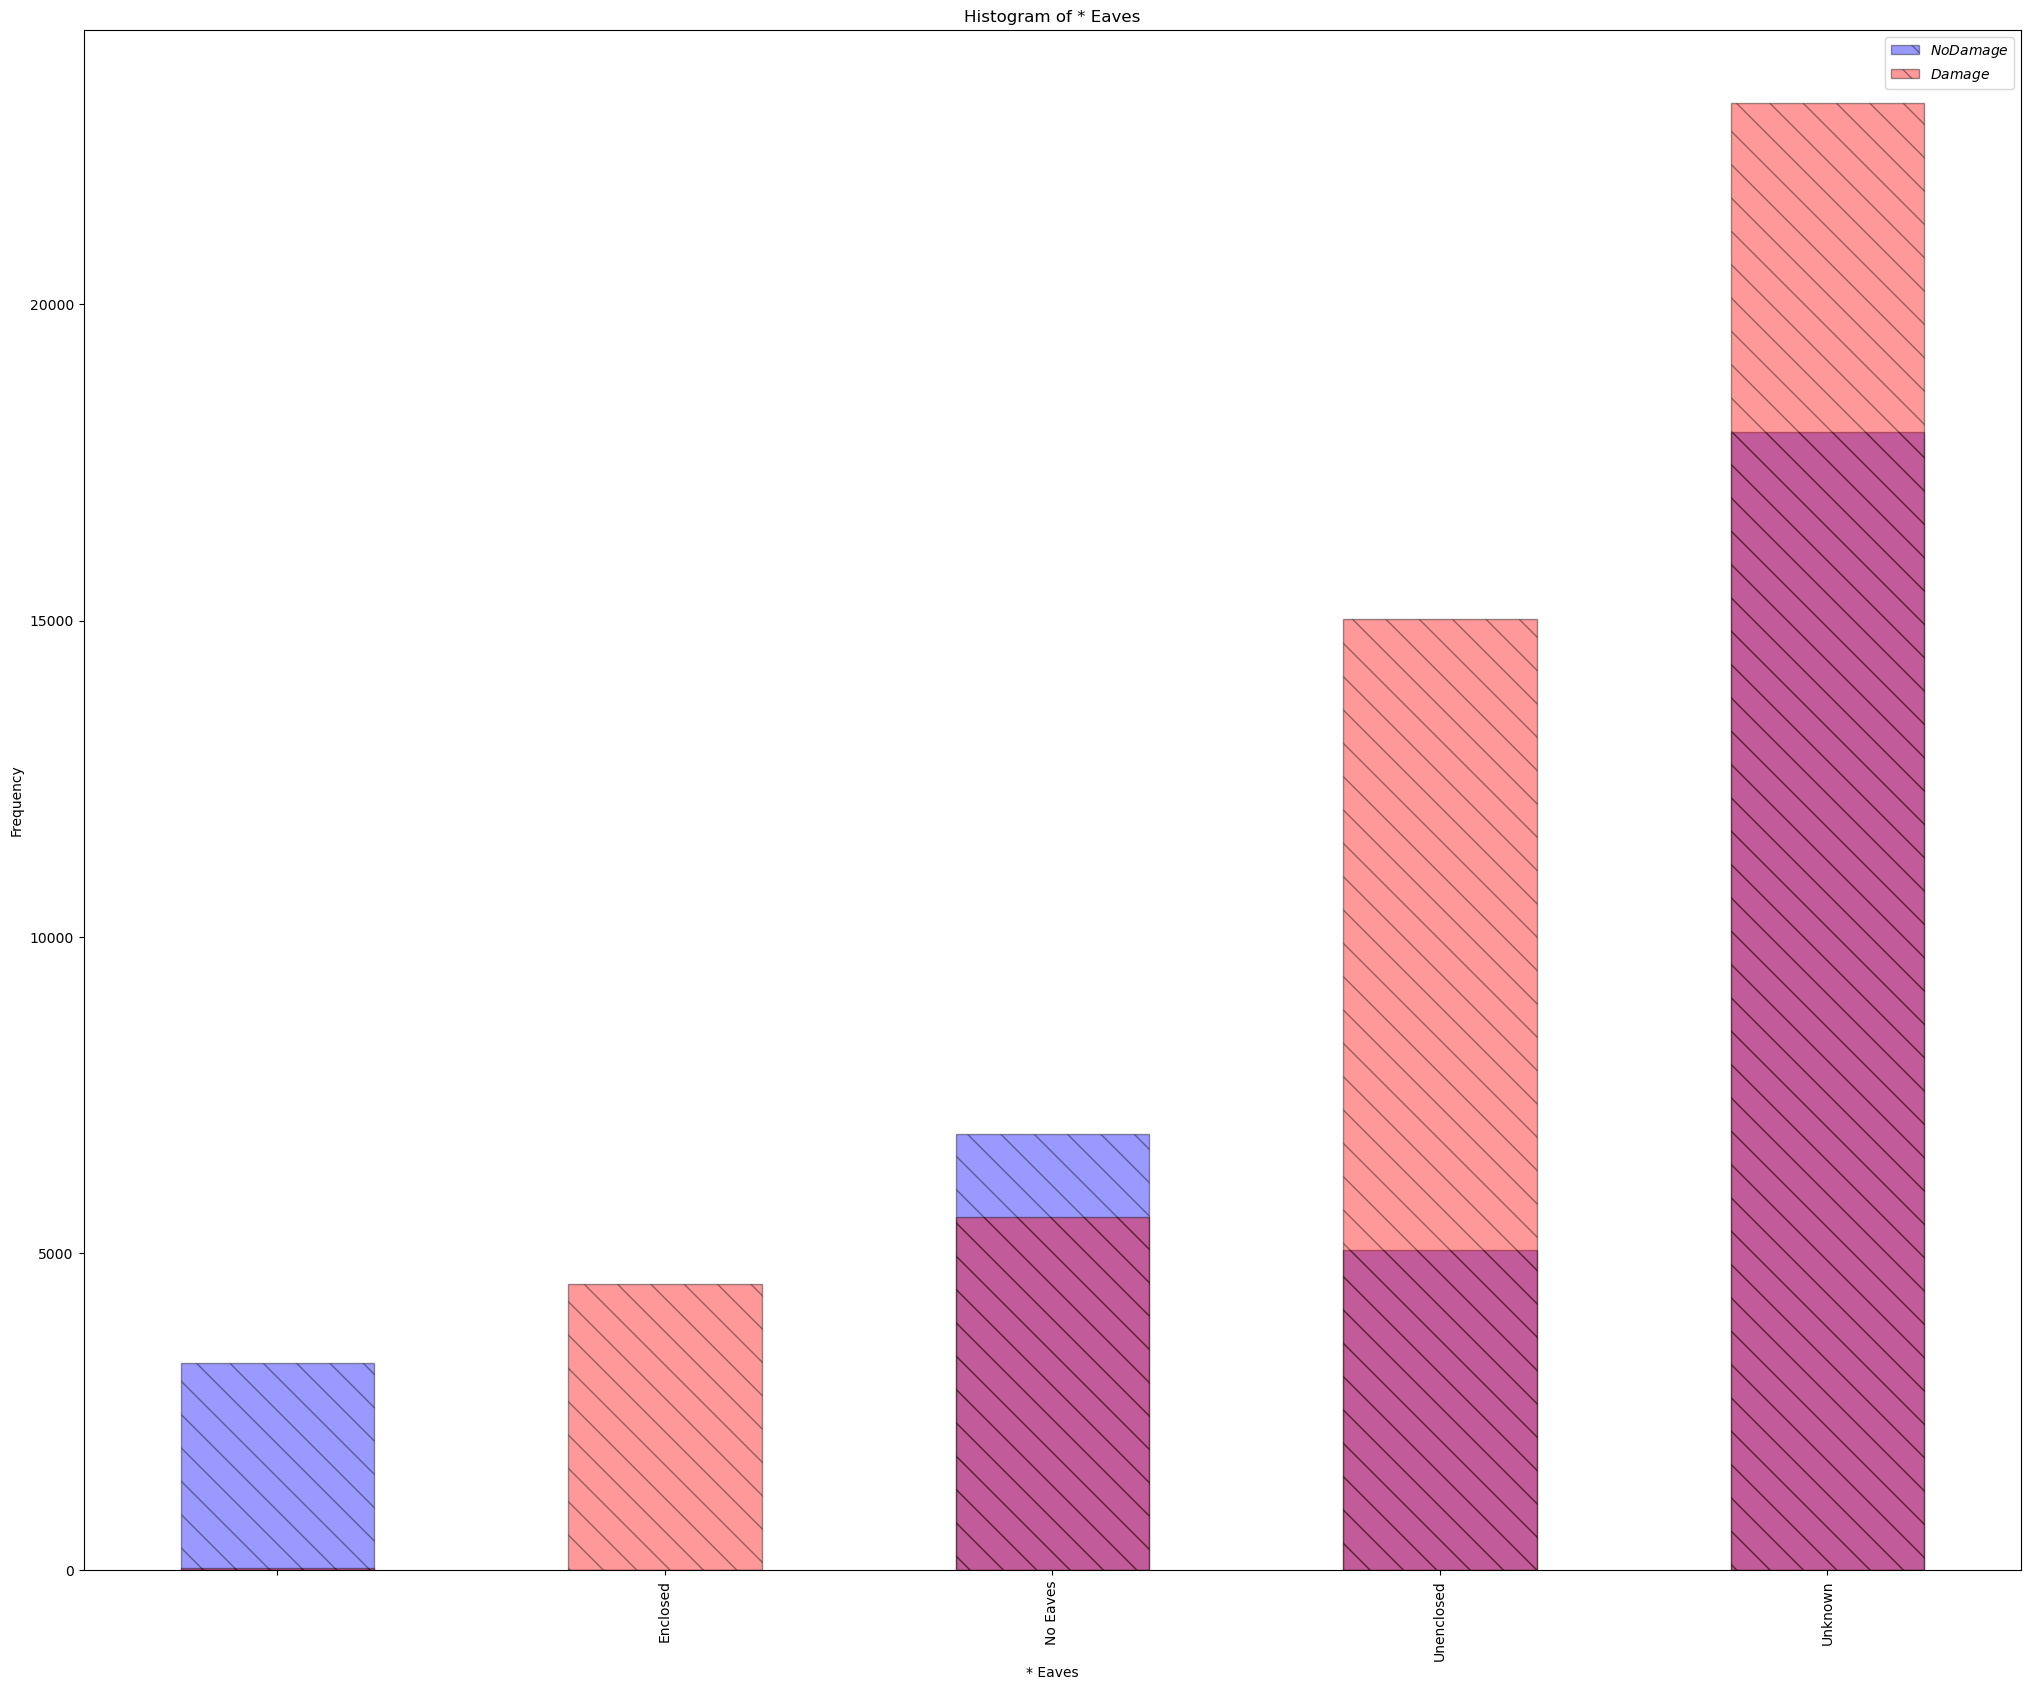

In [148]:
print(cal_fire_data['* Eaves'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Eaves'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Eaves'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Eaves'}')
plt.xlabel('* Eaves')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Vent Screen
Mesh Screen > 1/8""     33982
Unknown                 29725
No Vents                24753
Mesh Screen <= 1/8""    17870
                         4105
Unscreened               2322
>30                         1
21-30                       1
Deck Elevated               1
Attached Fence              1
Name: count, dtype: int64


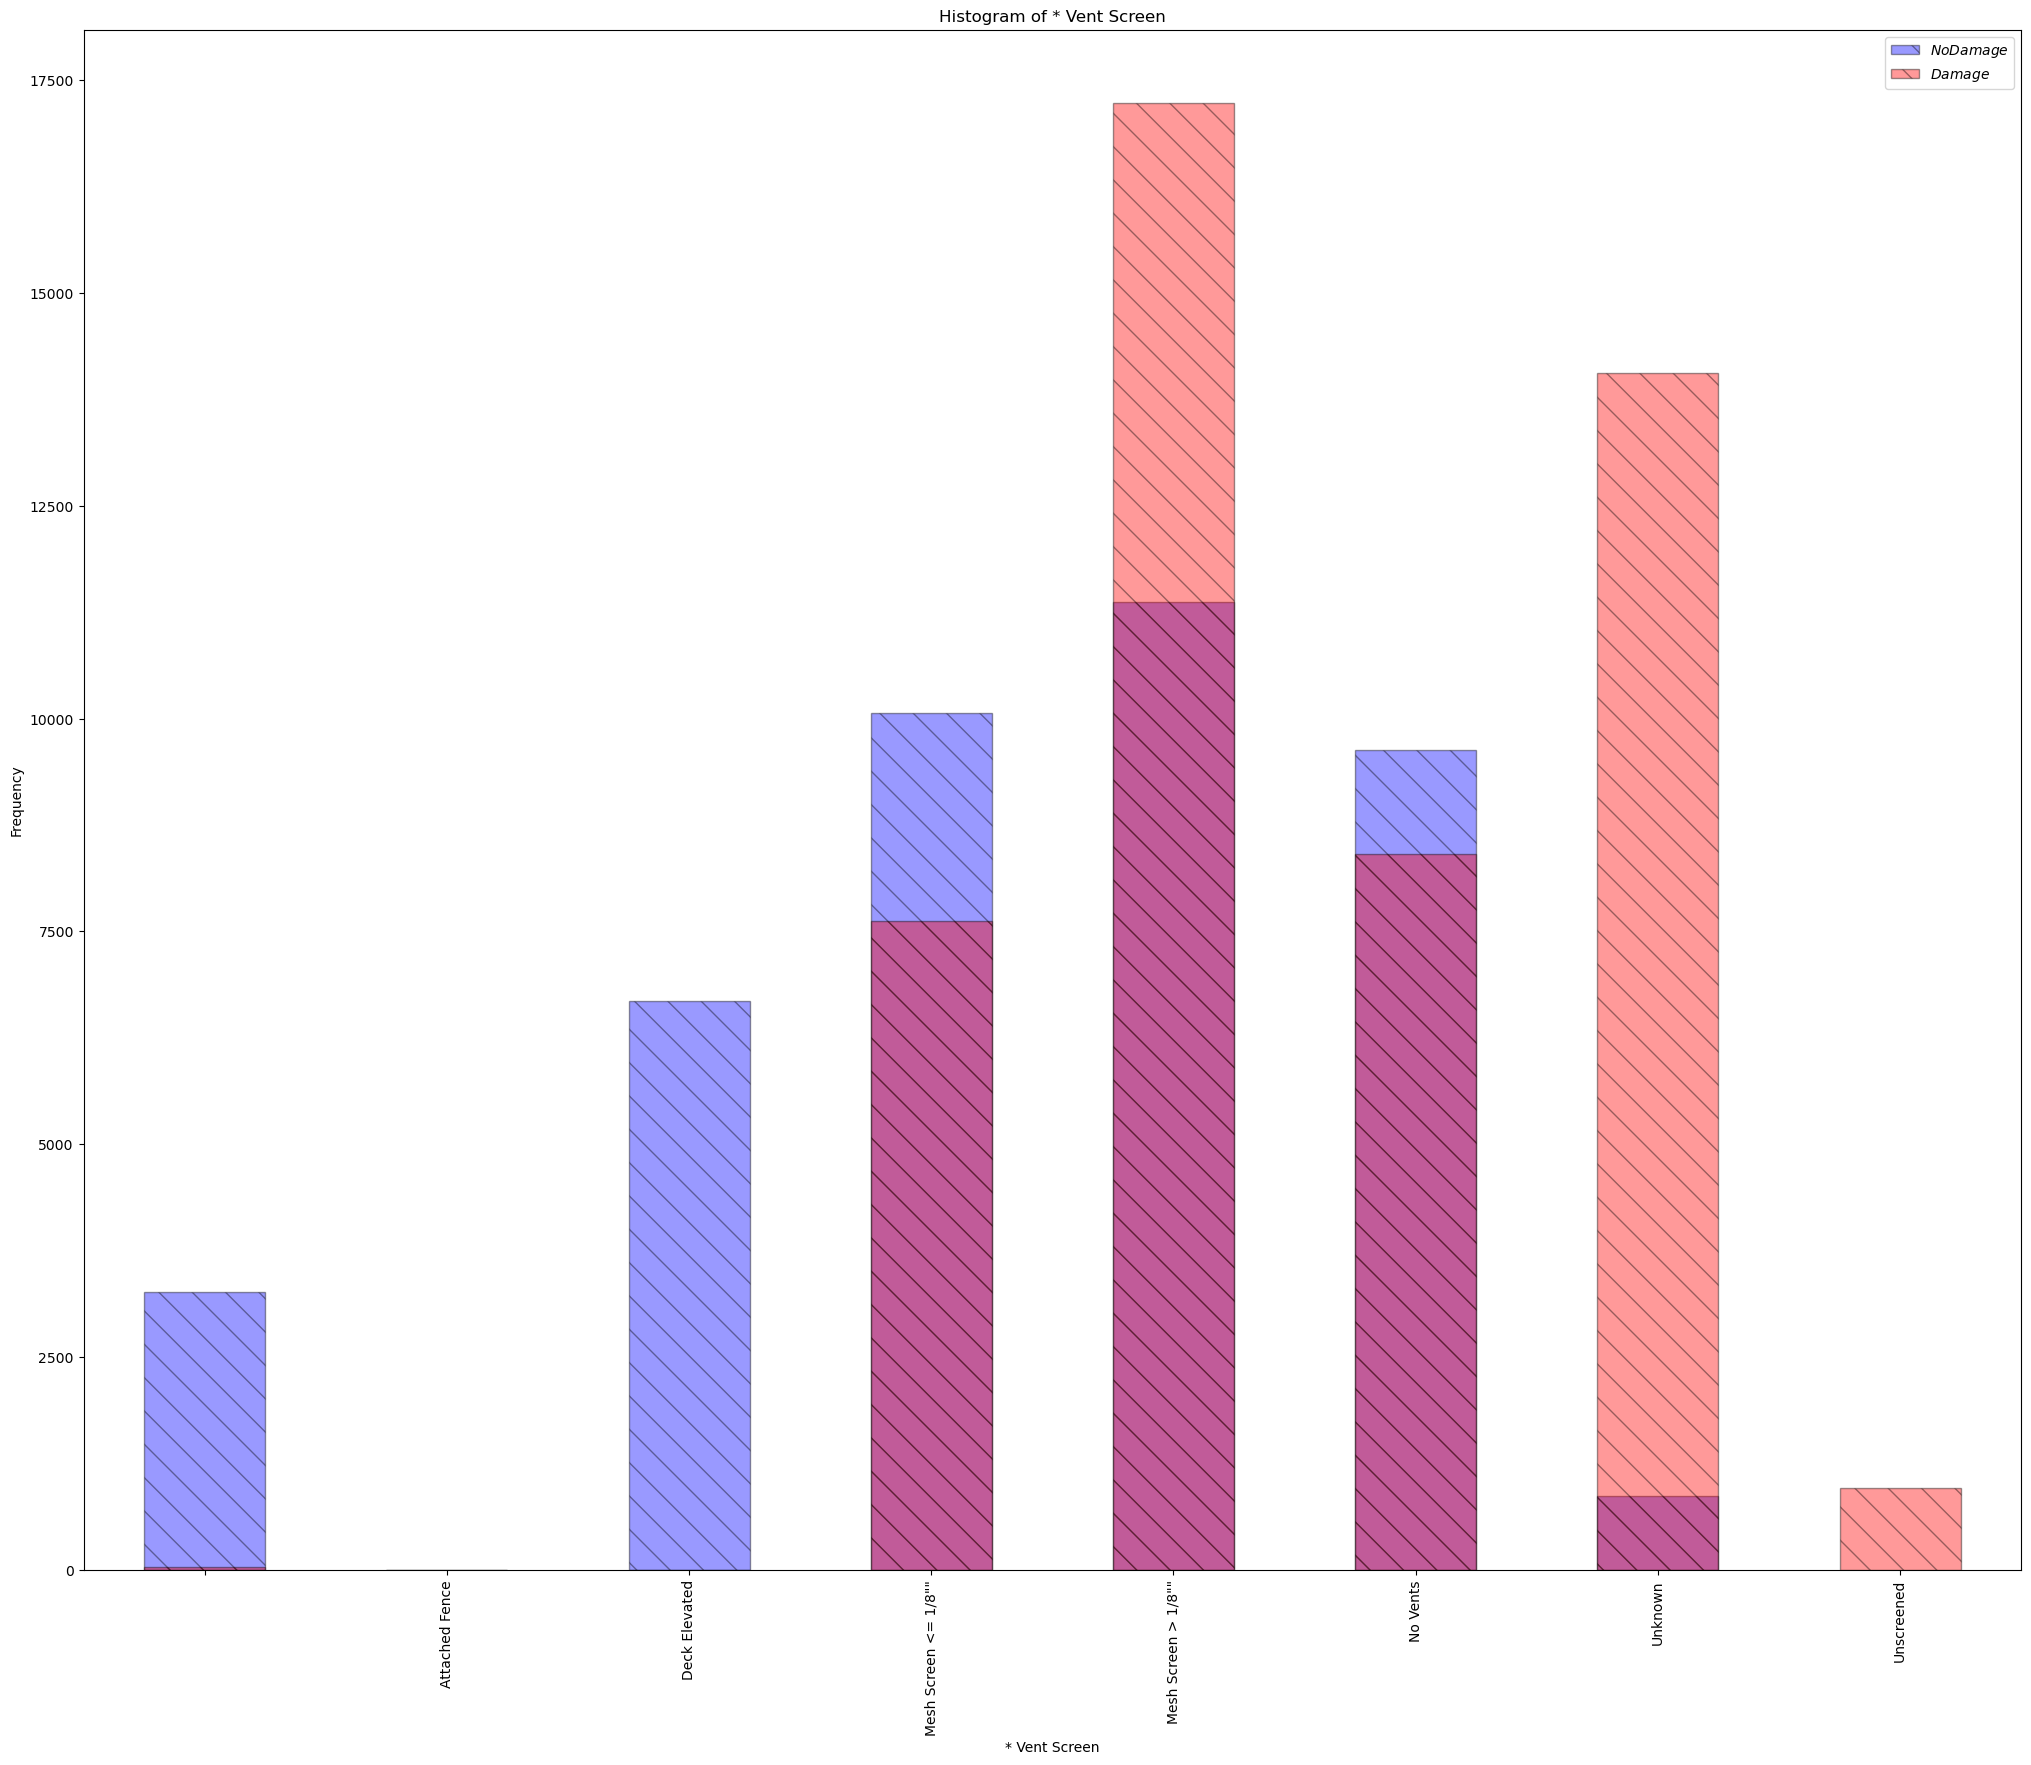

In [149]:
print(cal_fire_data['* Vent Screen'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Vent Screen'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Vent Screen'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Vent Screen'}')
plt.xlabel('* Vent Screen')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Exterior Siding
Stucco Brick Cement    34516
Wood                   28745
Combustible            13974
Unknown                13848
Ignition Resistant      9695
Metal                   4937
                        4104
Other                   1368
Vinyl                   1211
Stucco/Brick/Cement      363
Name: count, dtype: int64


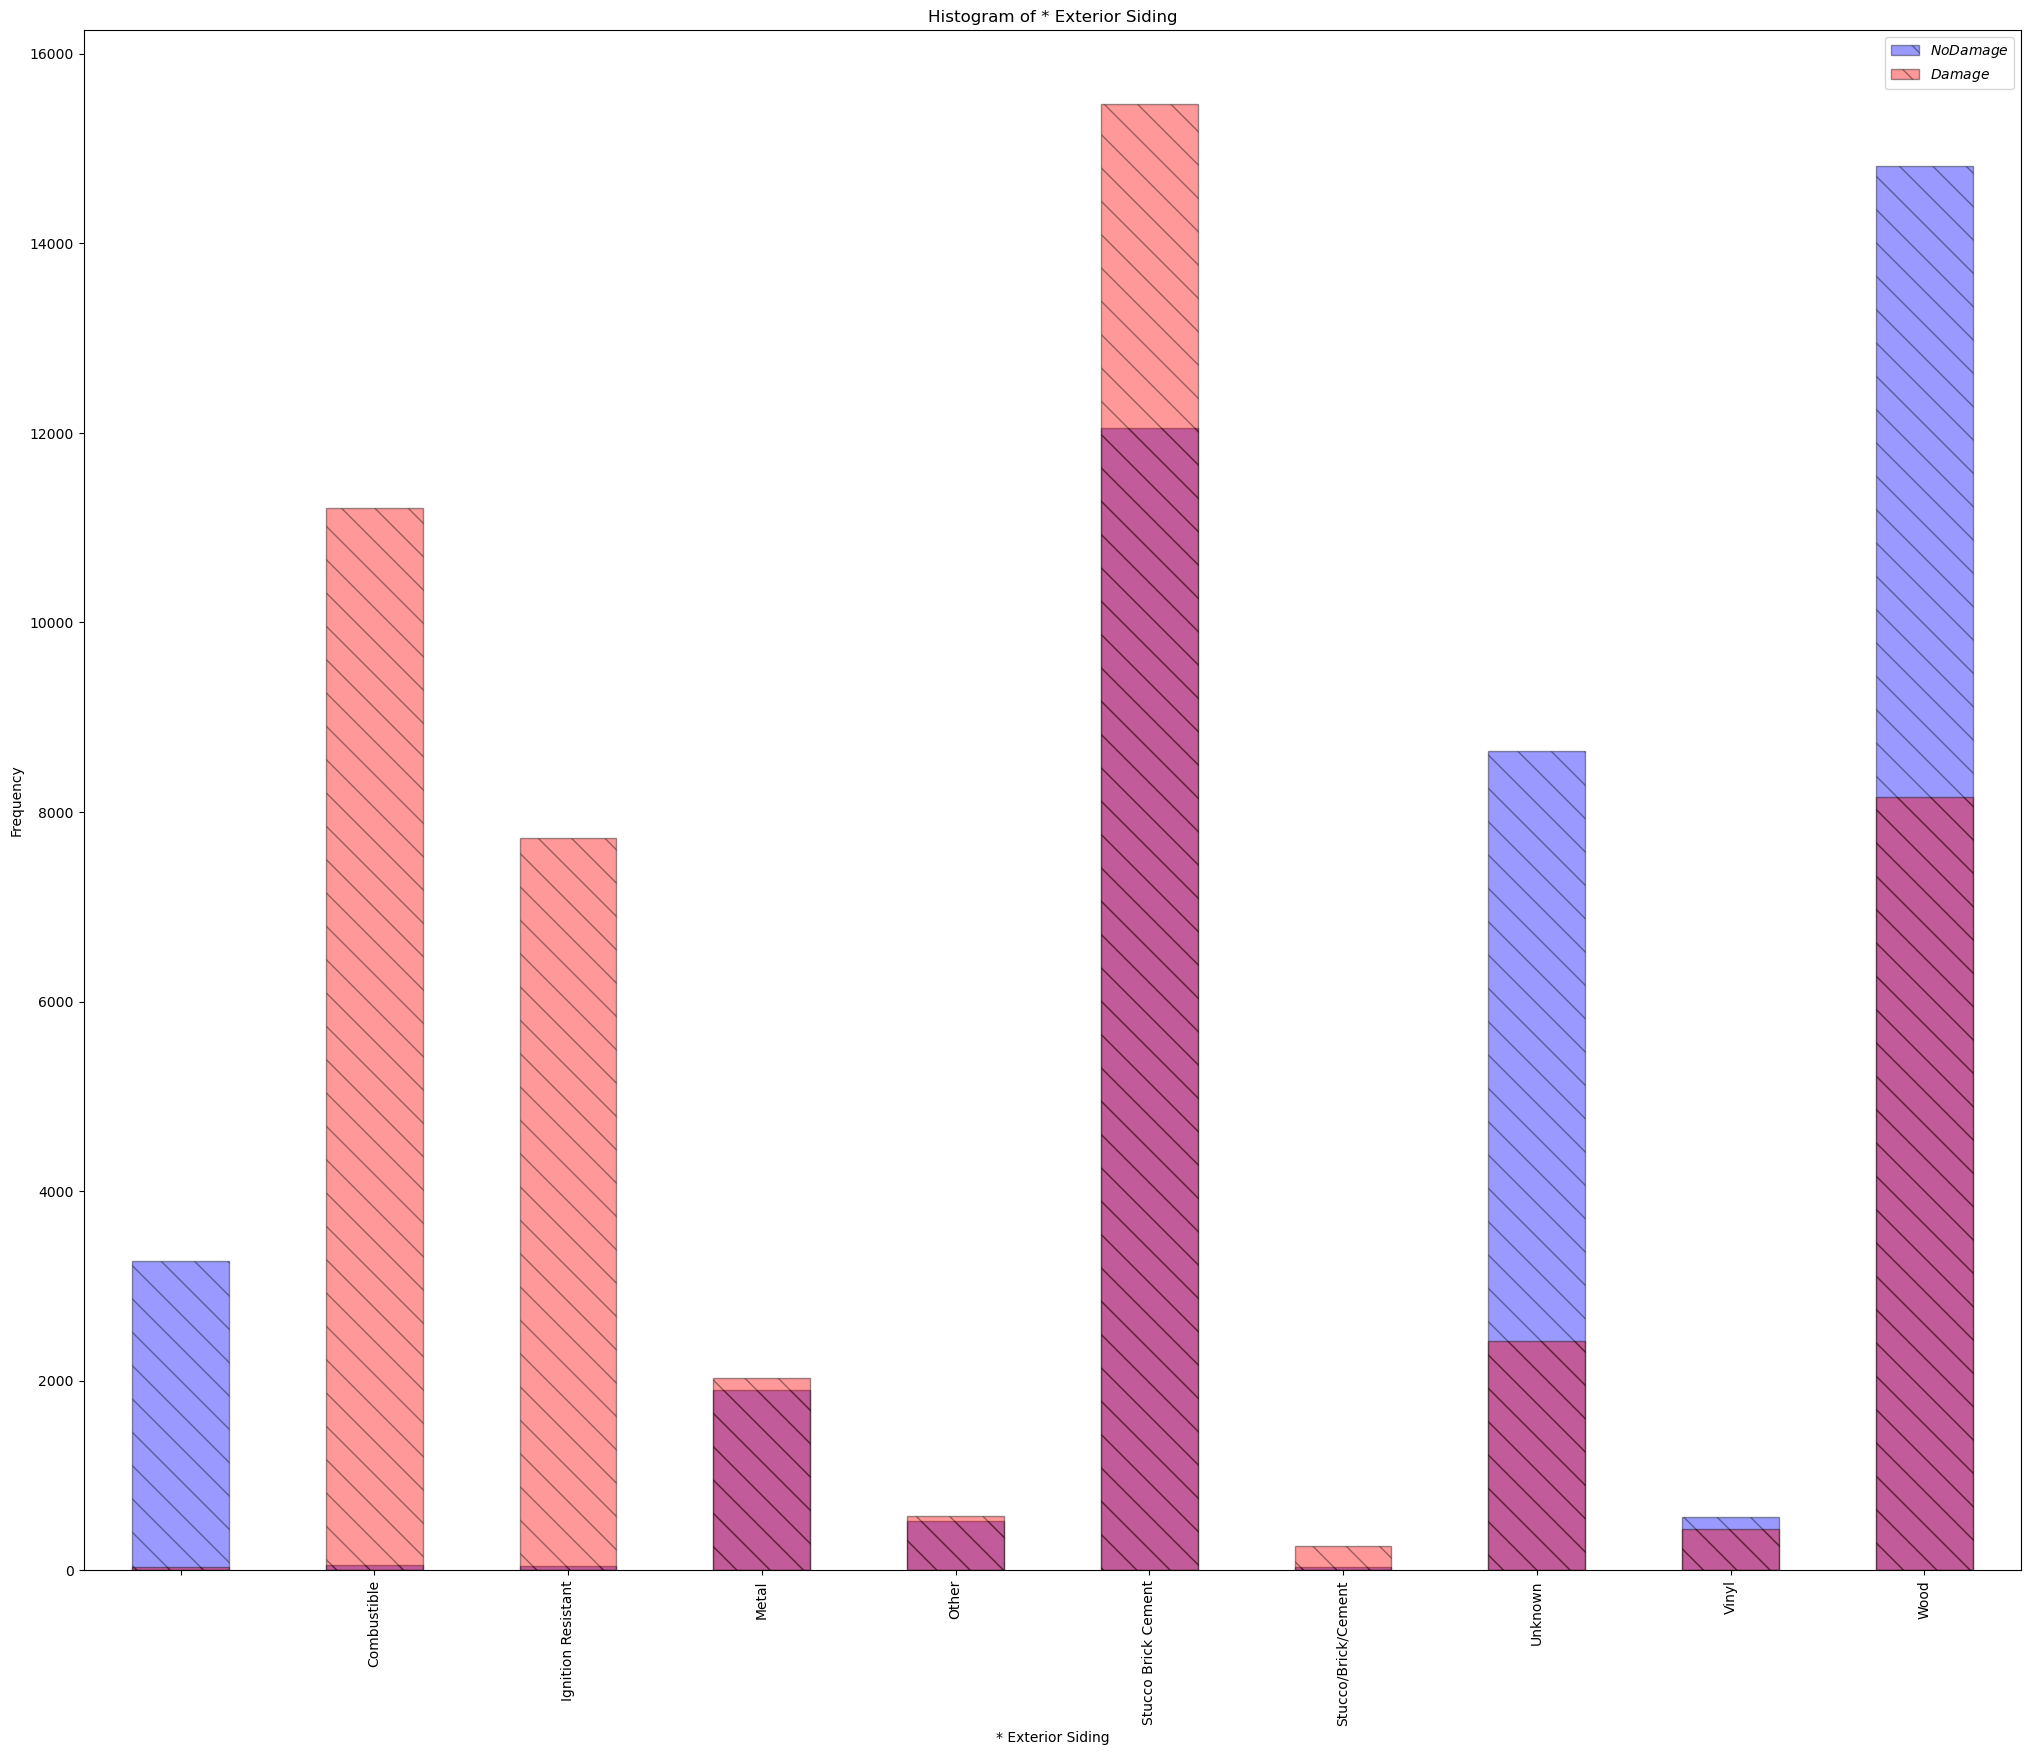

In [150]:
print(cal_fire_data['* Exterior Siding'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Exterior Siding'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Exterior Siding'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Exterior Siding'}')
plt.xlabel('* Exterior Siding')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Window Pane
Multi Pane       39112
Single Pane      33891
Unknown          24949
No Windows       10701
                  4105
No Deck/Porch        1
Radiant Heat         1
Asphalt              1
Name: count, dtype: int64


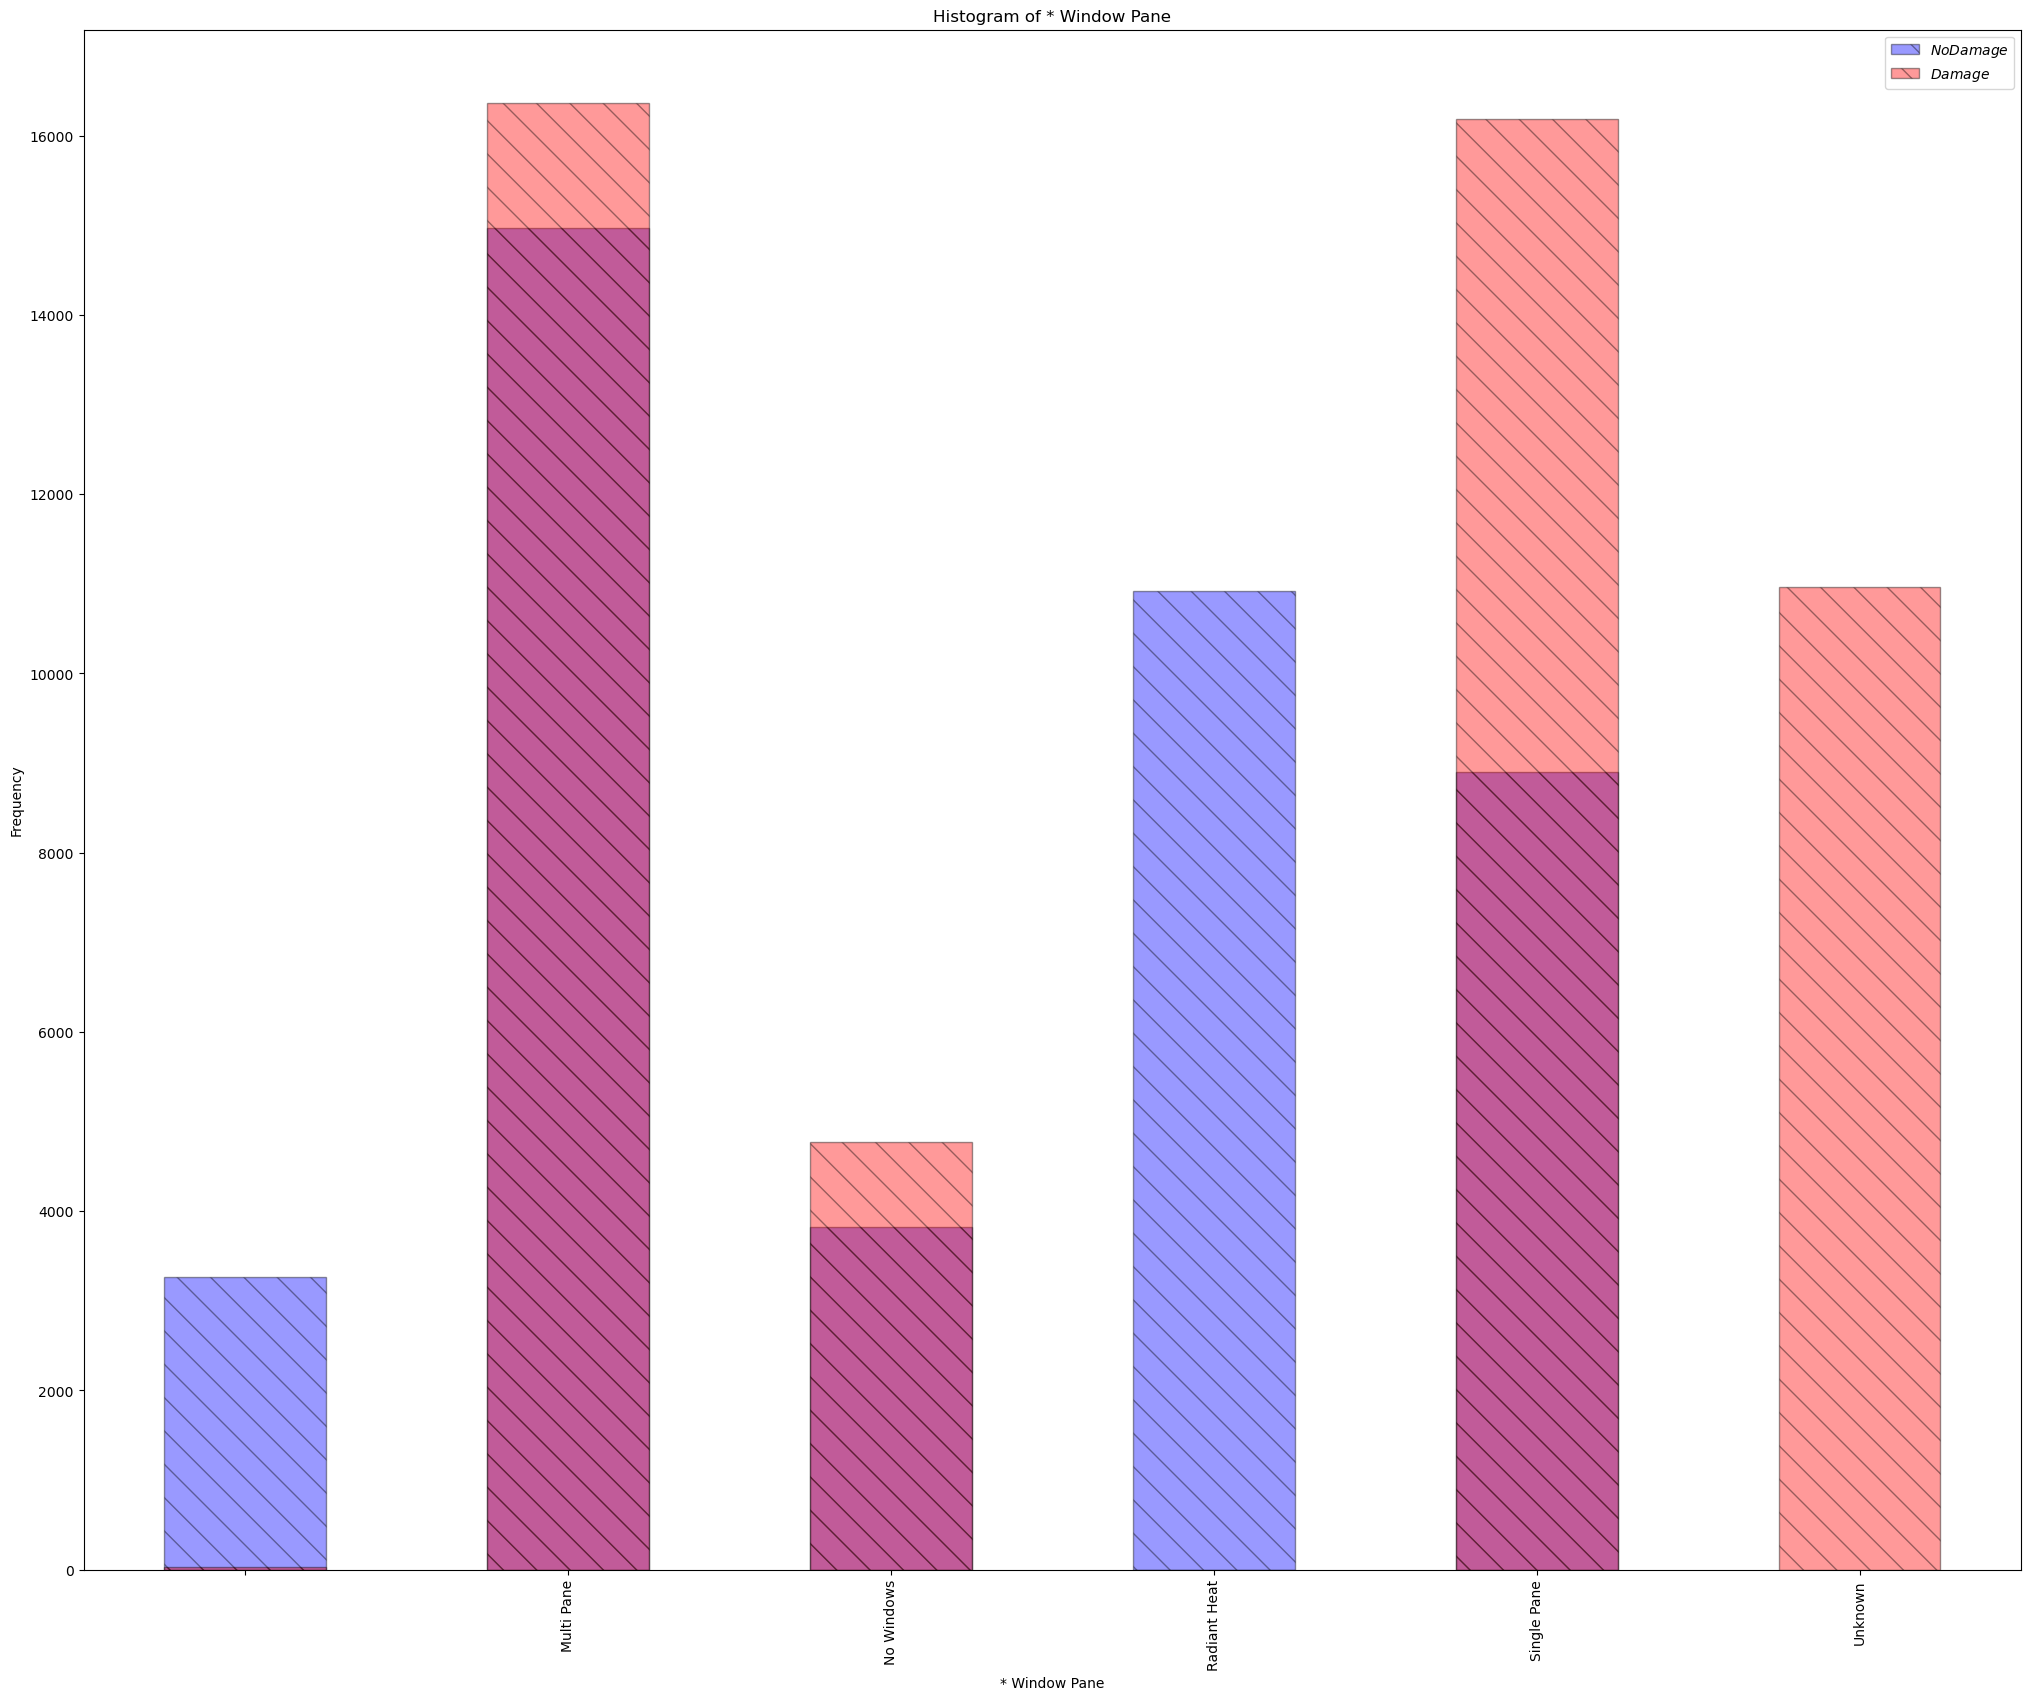

In [151]:
print(cal_fire_data['* Window Pane'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Window Pane'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Window Pane'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Window Pane'}')
plt.xlabel('* Window Pane')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Deck/Porch On Grade
Masonry/Concrete    40040
No Deck/Porch       39146
Unknown             15179
Wood                13590
                     4109
Composite             697
Name: count, dtype: int64


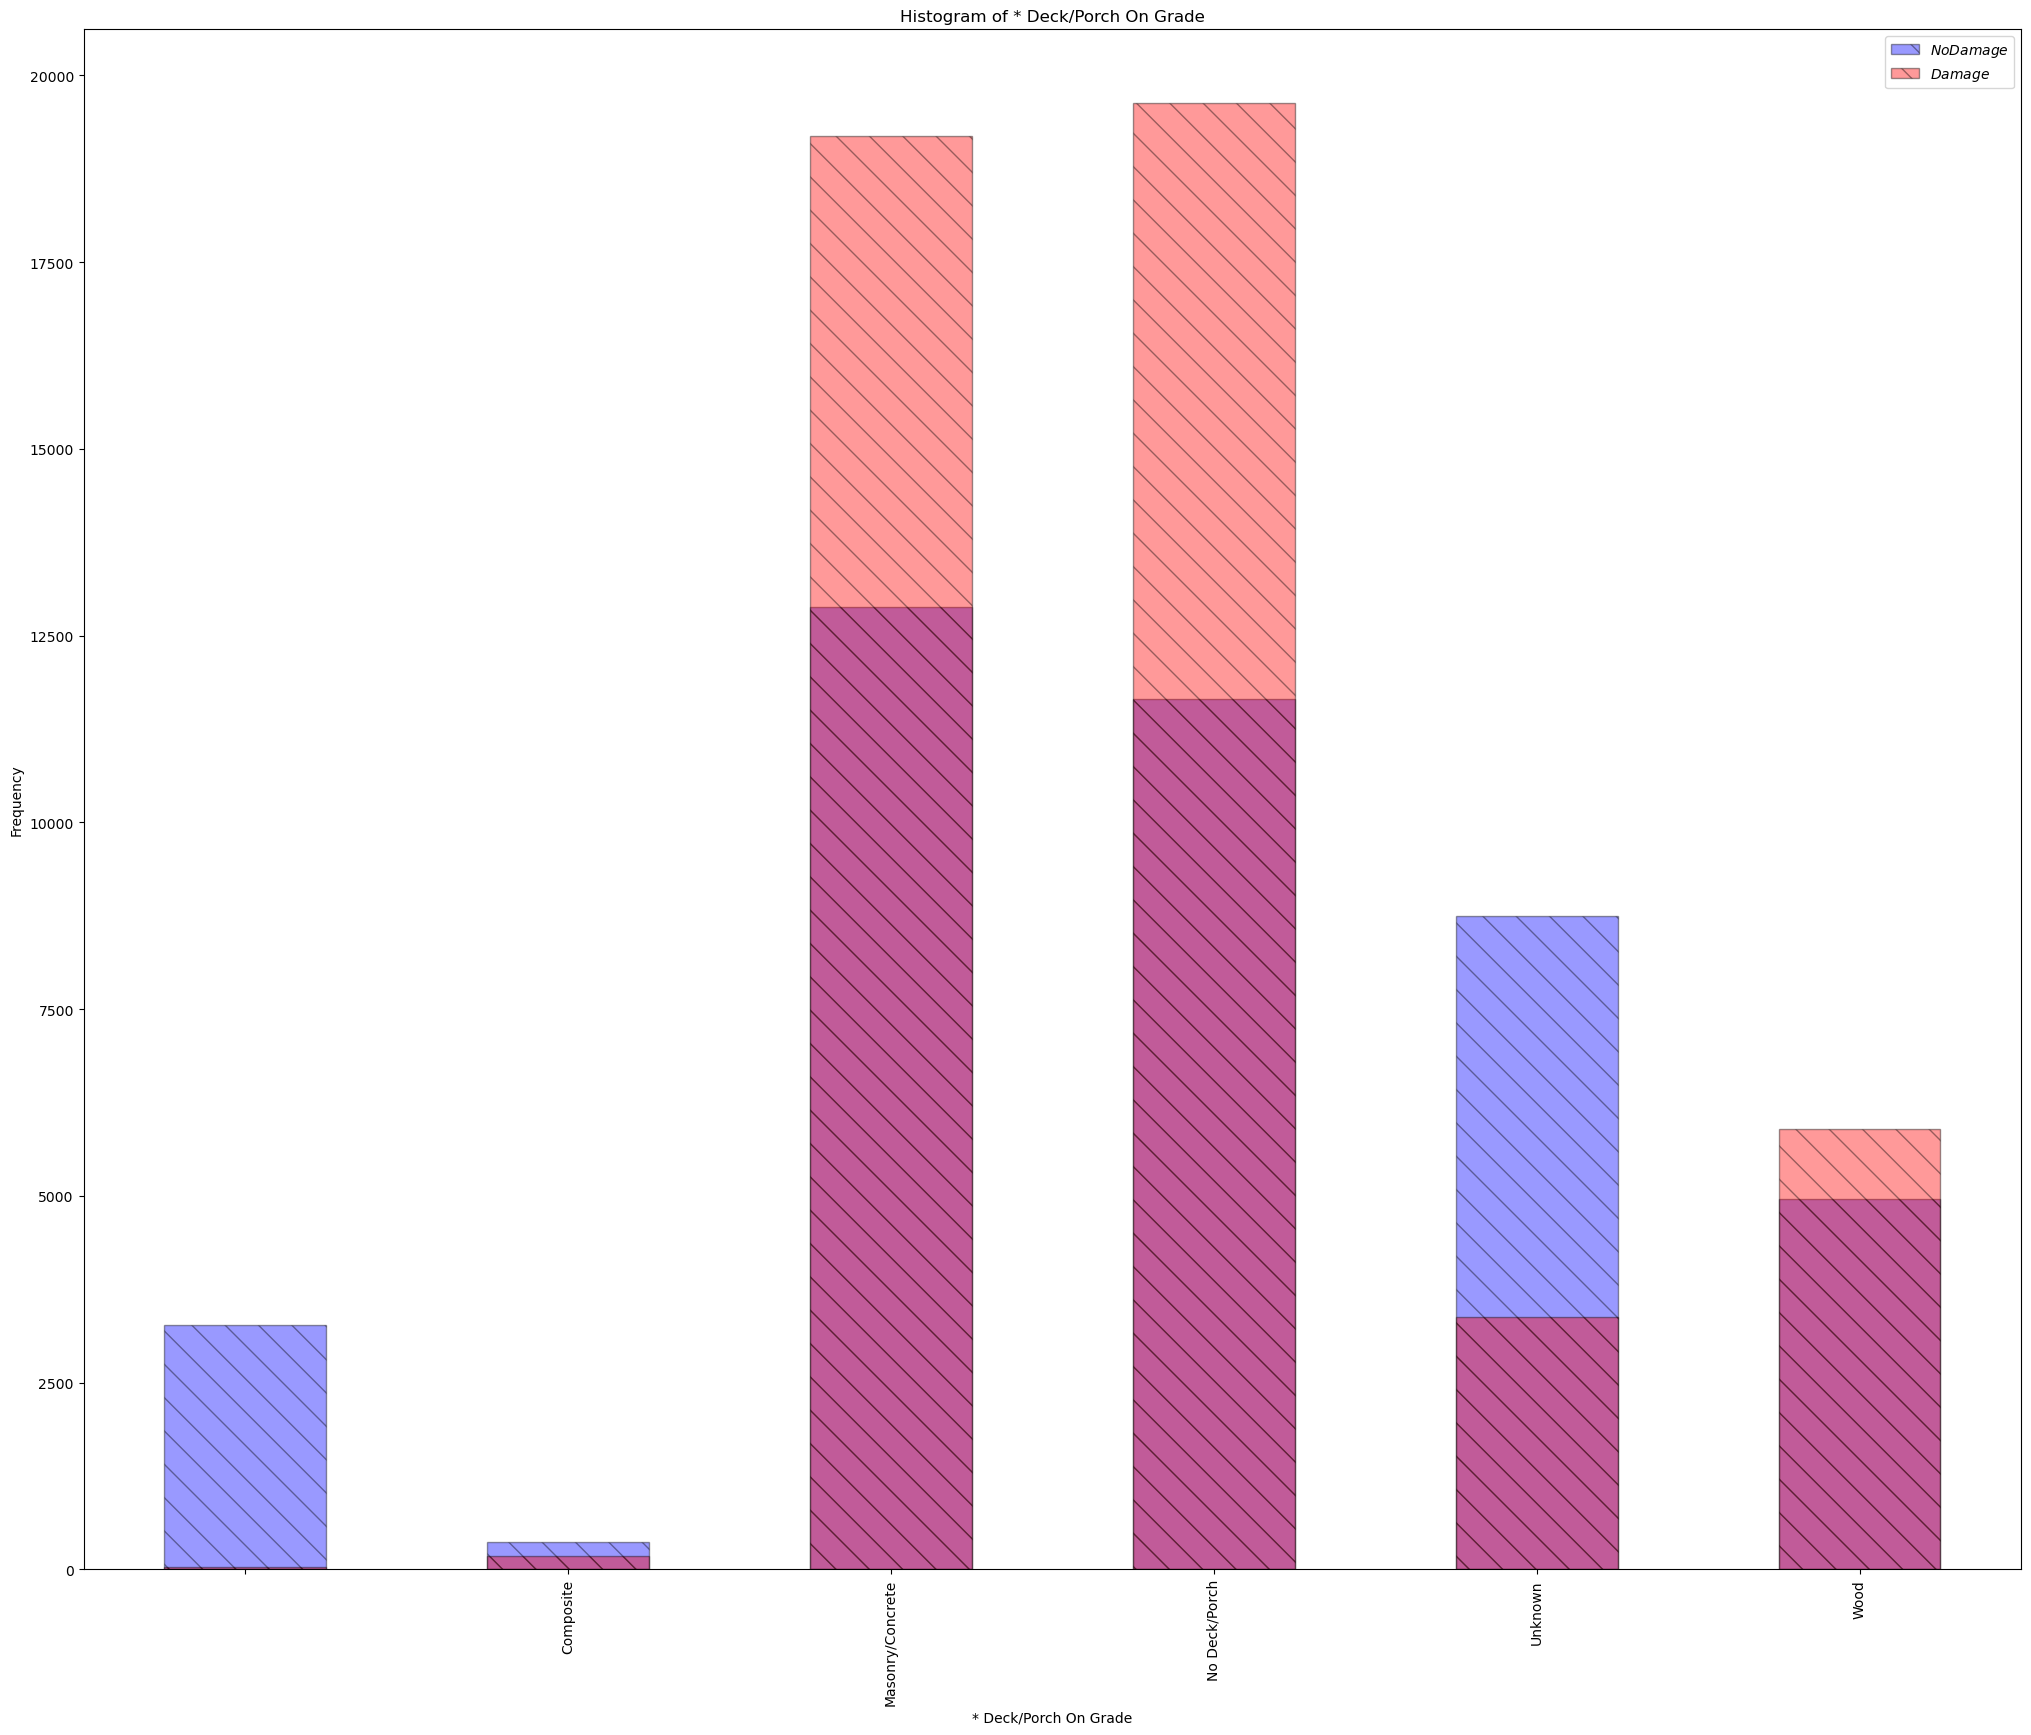

In [152]:
print(cal_fire_data['* Deck/Porch On Grade'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Deck/Porch On Grade'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Deck/Porch On Grade'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Deck/Porch On Grade'}')
plt.xlabel('* Deck/Porch On Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Deck/Porch Elevated
No Deck/Porch       62062
Wood                20194
Unknown             18121
Masonry/Concrete     7409
                     4110
Composite             865
Name: count, dtype: int64


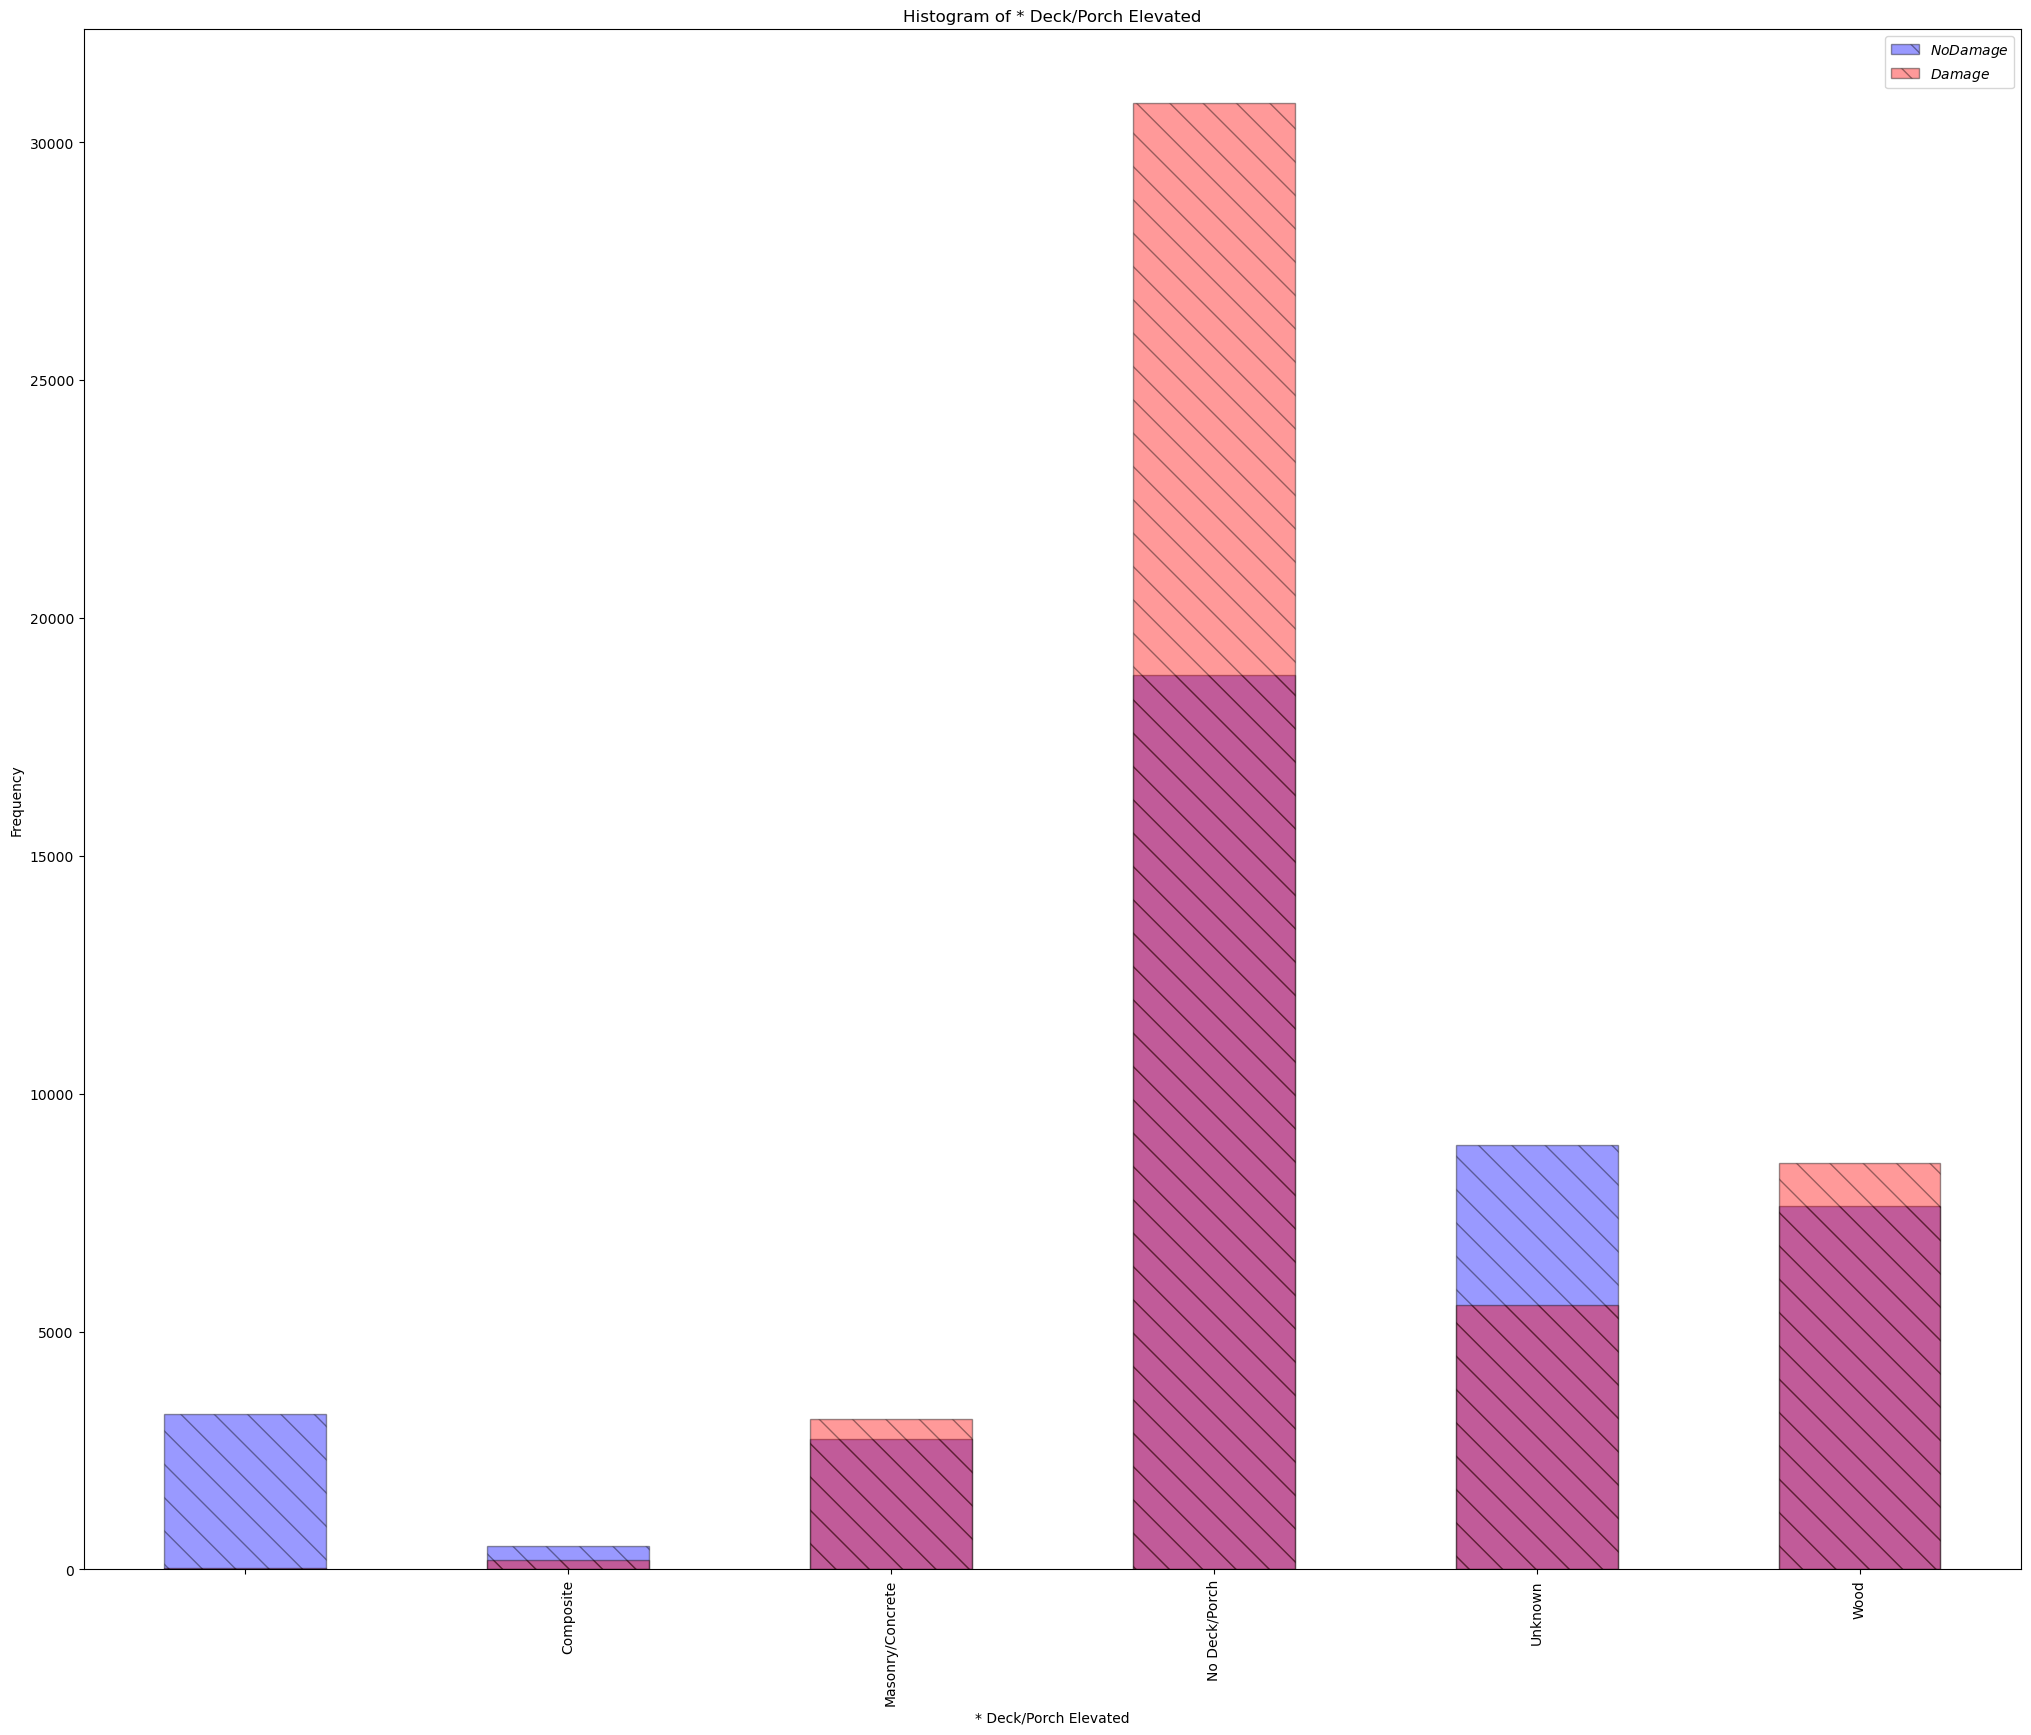

In [153]:
print(cal_fire_data['* Deck/Porch Elevated'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Deck/Porch Elevated'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Deck/Porch Elevated'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Deck/Porch Elevated'}')
plt.xlabel('* Deck/Porch Elevated')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Patio Cover/Carport Attached to Structure
No Patio Cover/Carport    56984
Combustible               26210
Unknown                   19599
Non Combustible            5853
                           4114
Name: count, dtype: int64


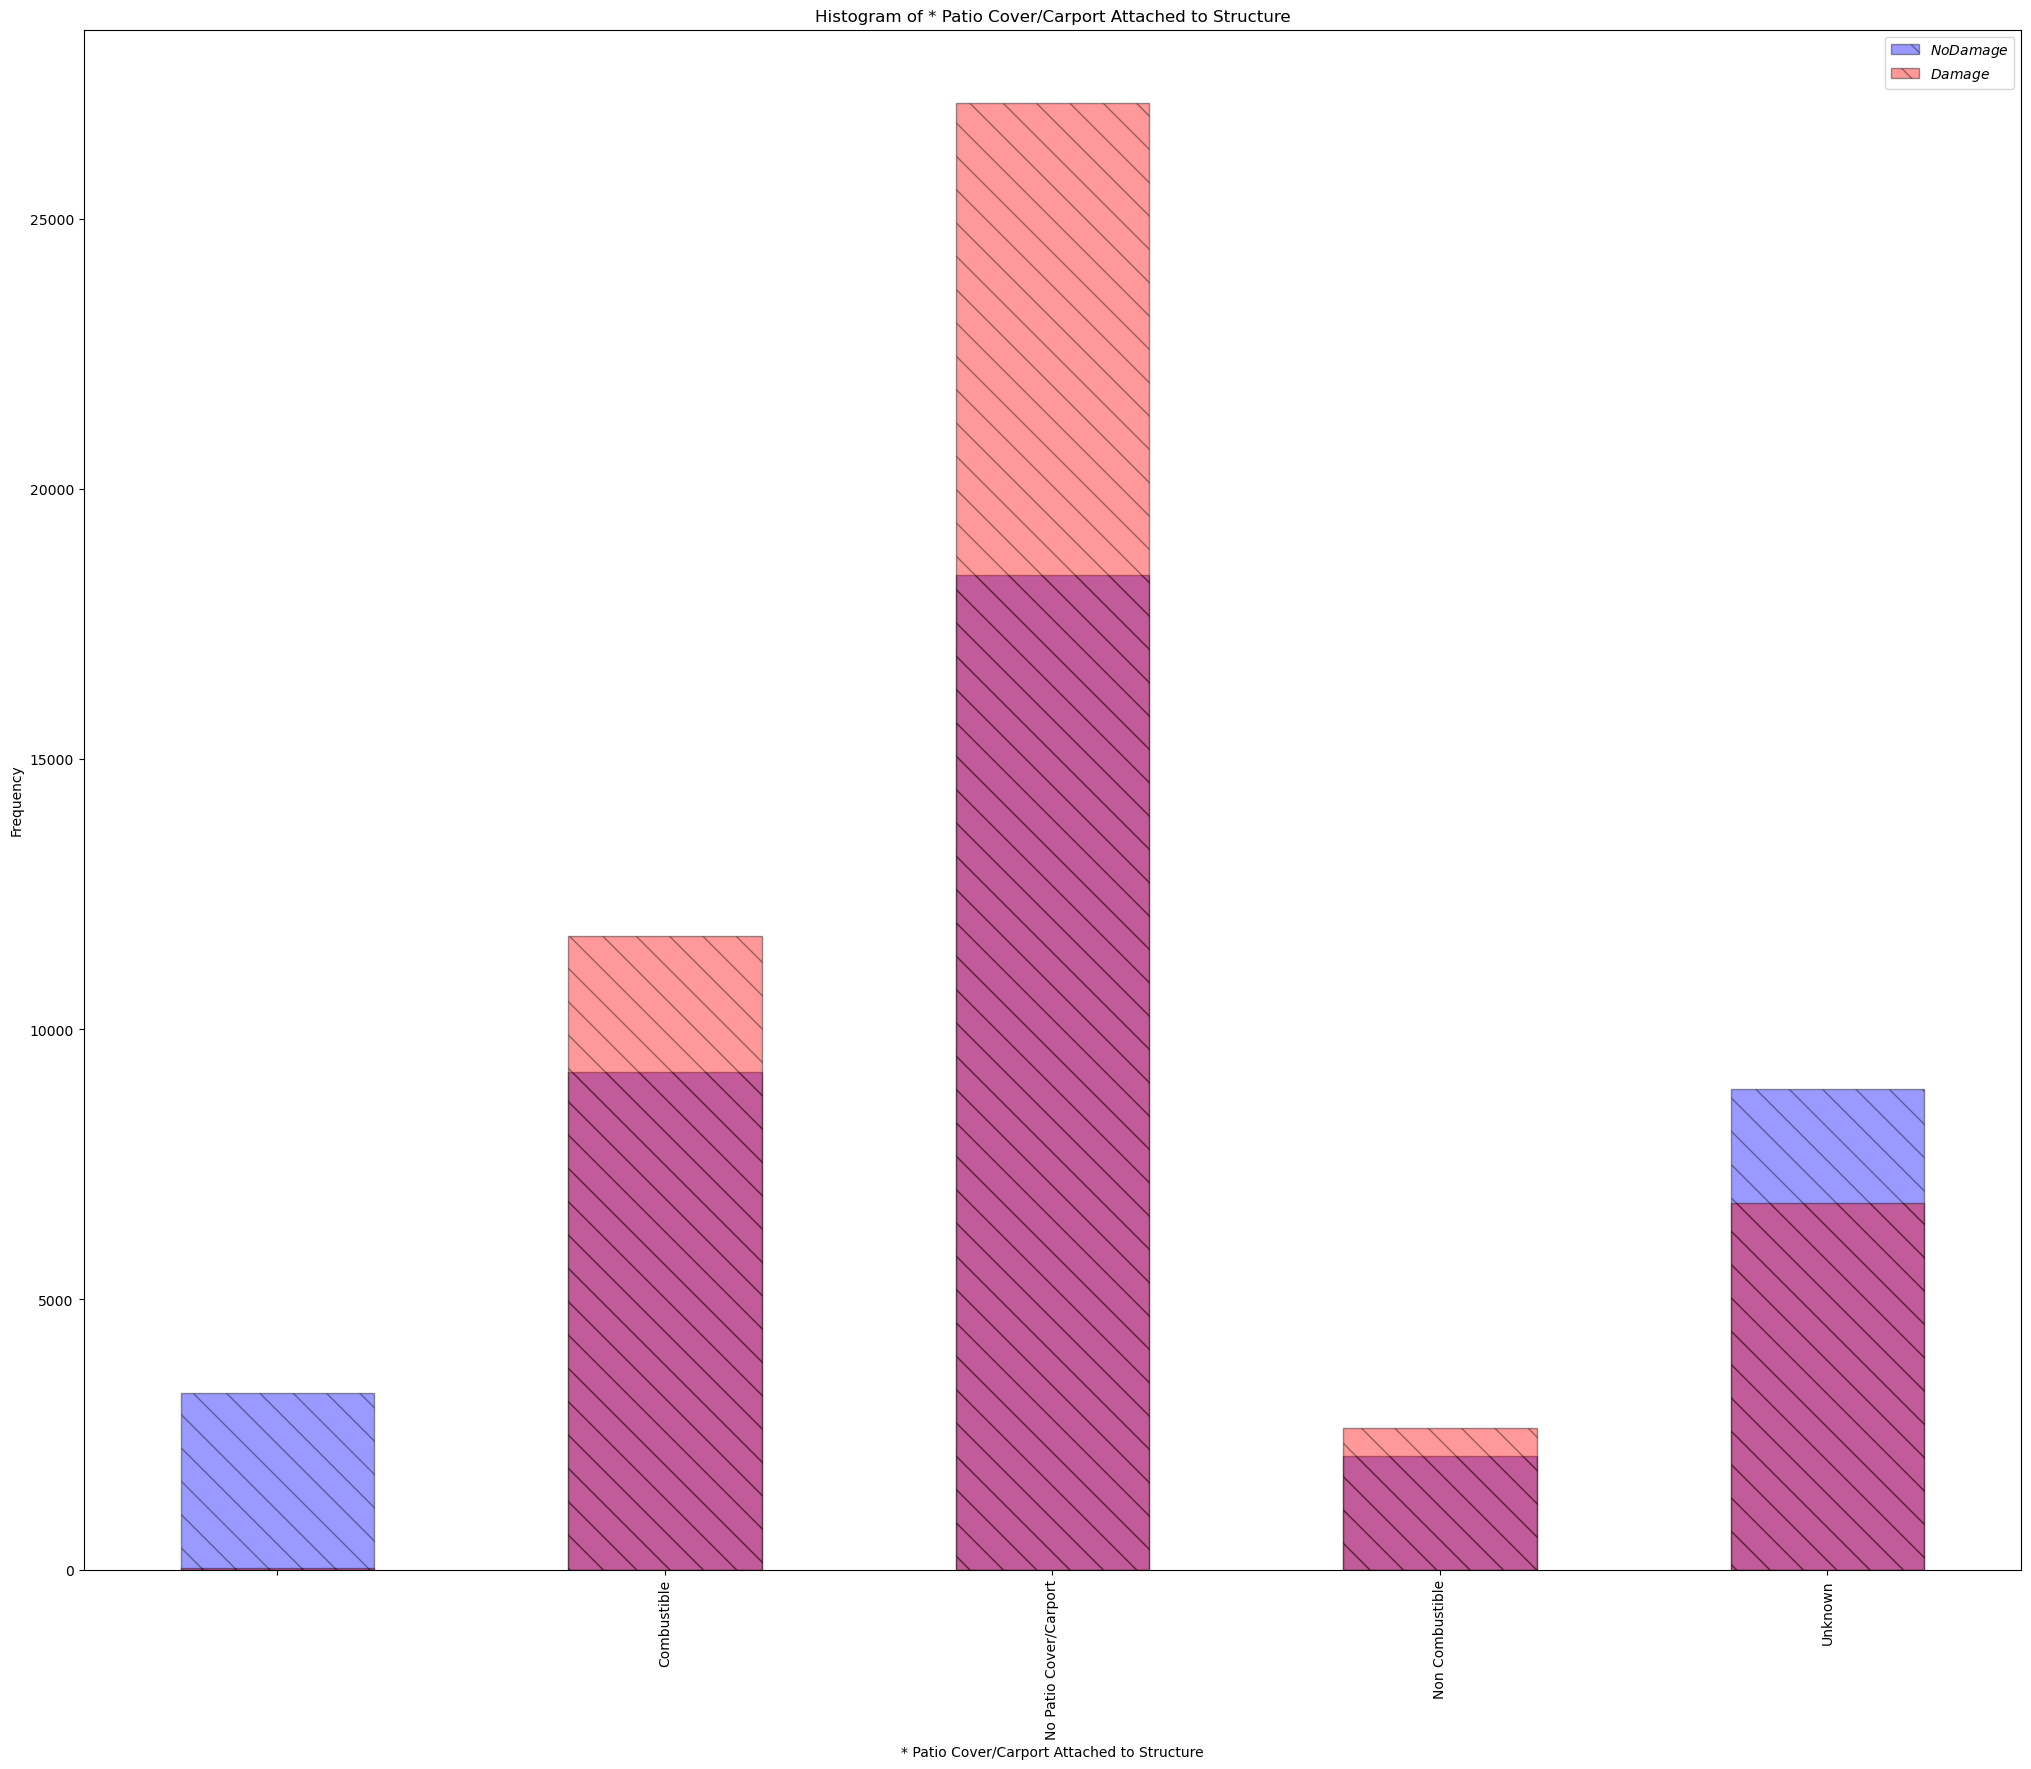

In [154]:
print(cal_fire_data['* Patio Cover/Carport Attached to Structure'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Patio Cover/Carport Attached to Structure'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Patio Cover/Carport Attached to Structure'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Patio Cover/Carport Attached to Structure'}')
plt.xlabel('* Patio Cover/Carport Attached to Structure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* Fence Attached to Structure
No Fence           55055
Non Combustible    23067
Combustible        15937
Unknown            14591
Name: count, dtype: int64


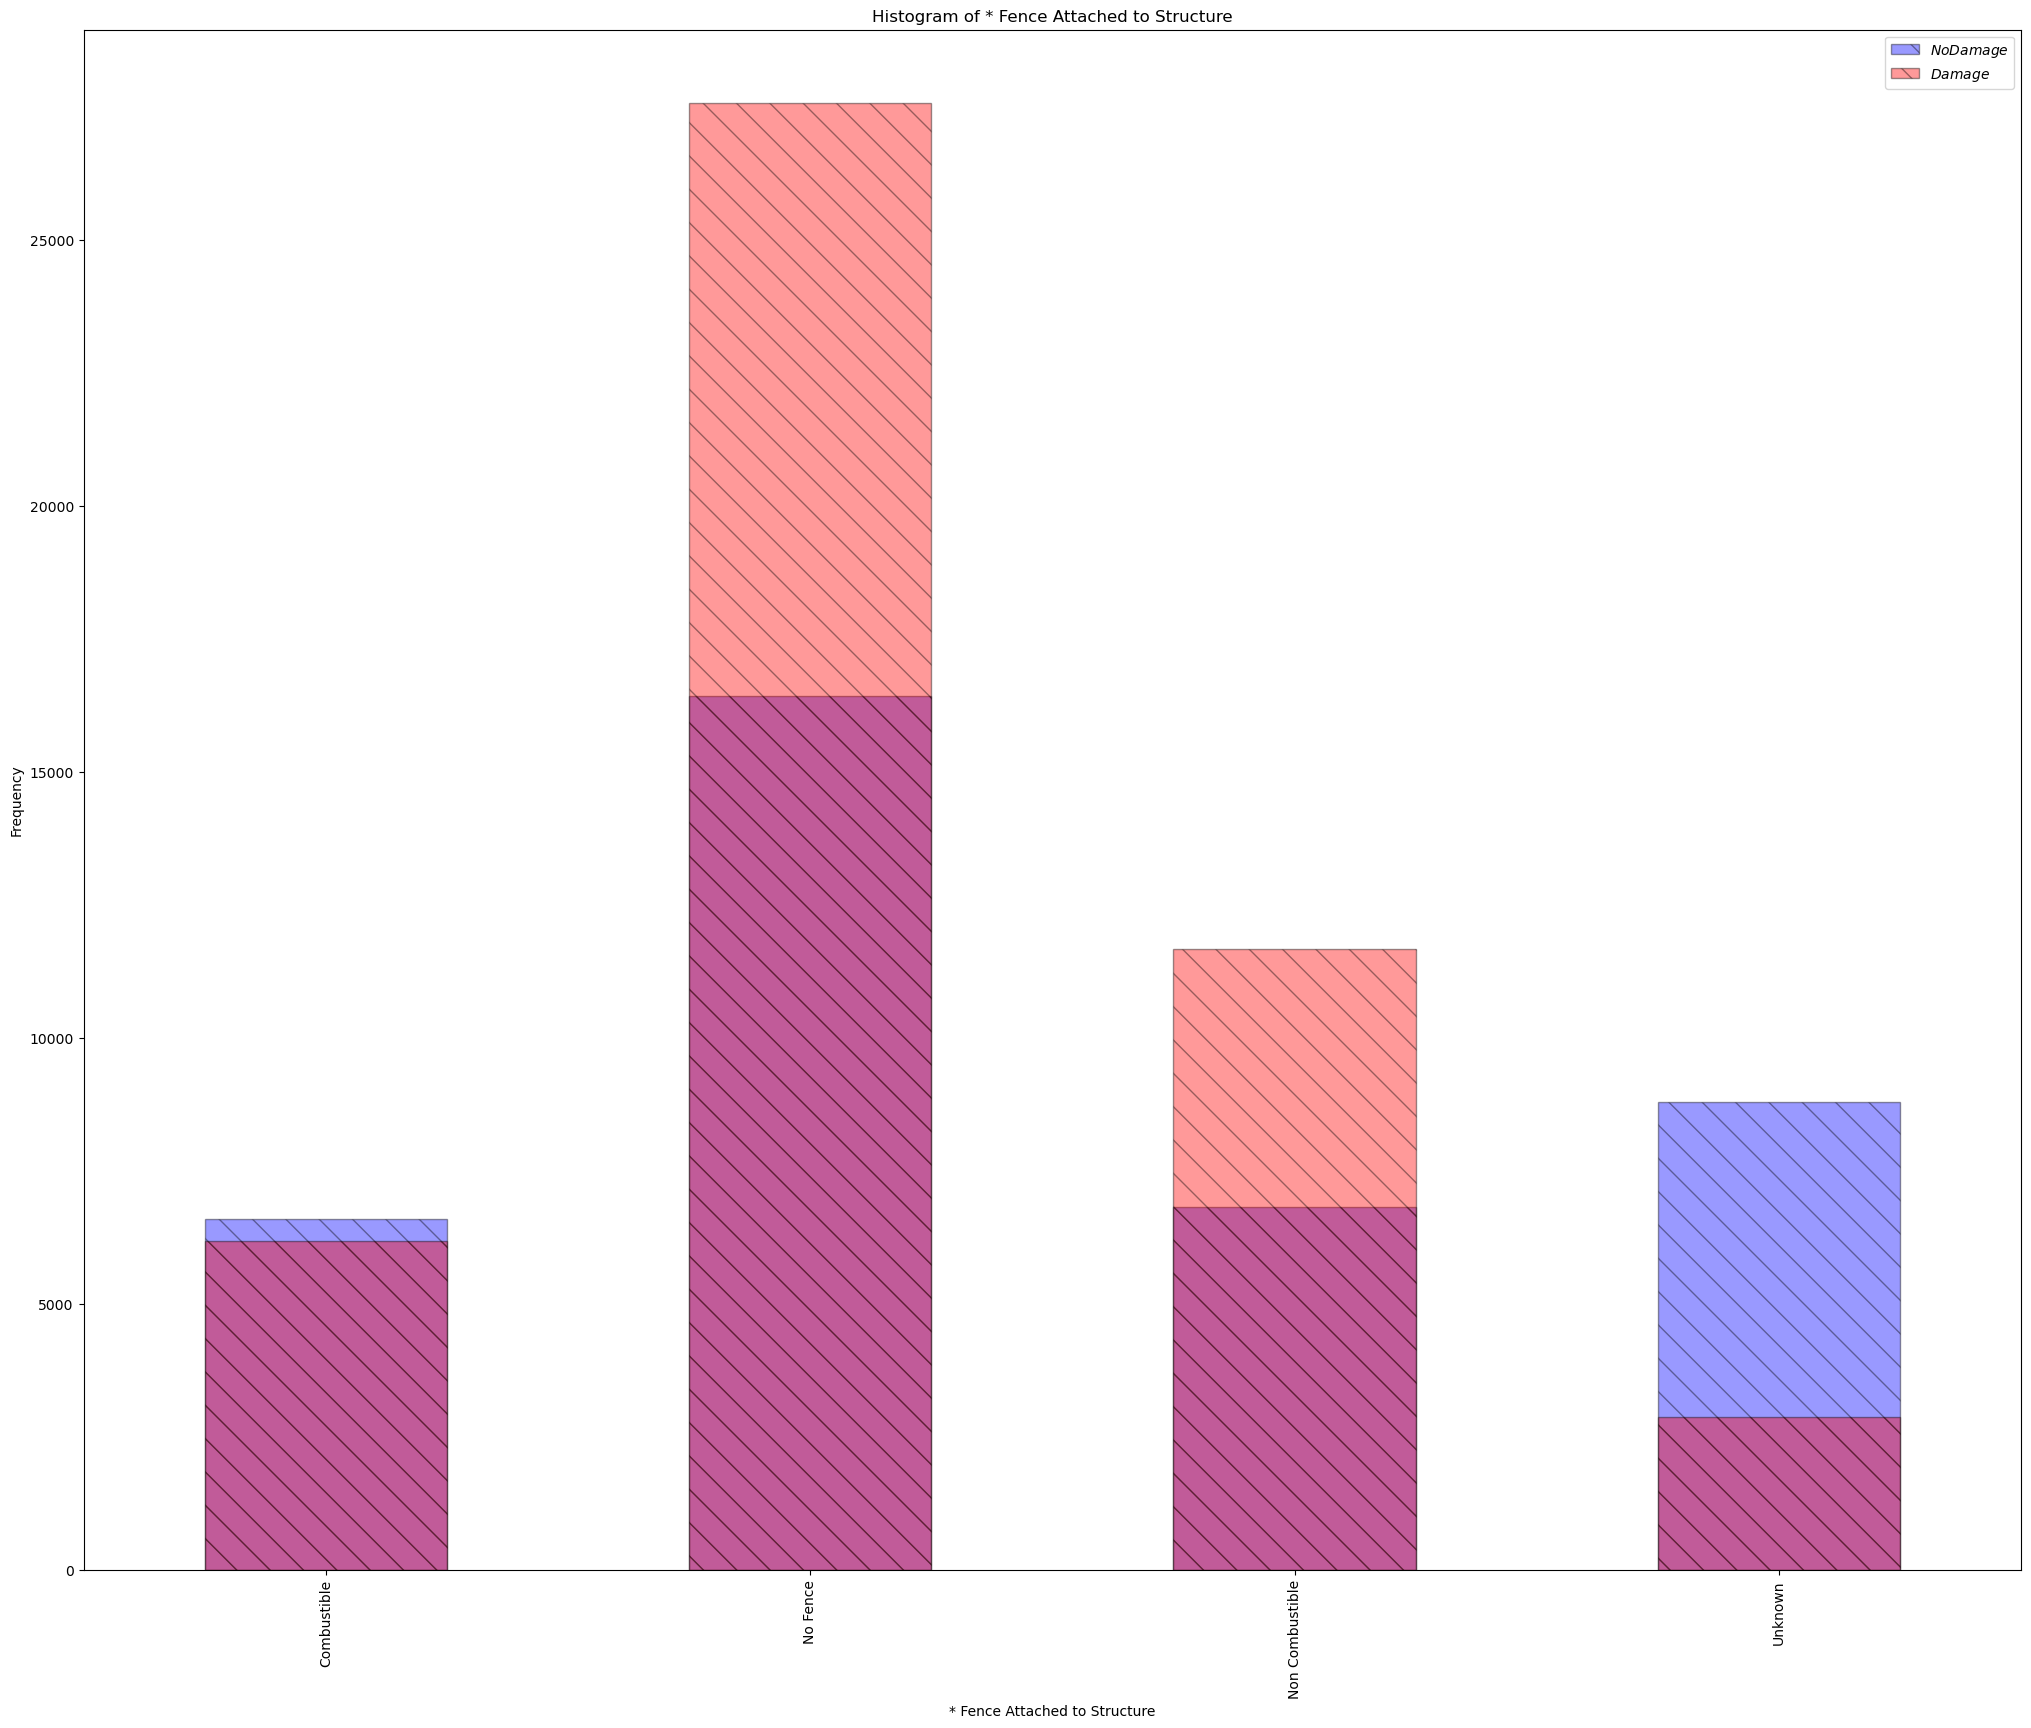

In [155]:
print(cal_fire_data['* Fence Attached to Structure'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['* Fence Attached to Structure'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['* Fence Attached to Structure'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'* Fence Attached to Structure'}')
plt.xlabel('* Fence Attached to Structure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Distance - Propane Tank to Structure
Unknown    6643
>30        6184
20-Nov     4154
0-10       4114
21-30      2631
              9
Name: count, dtype: int64


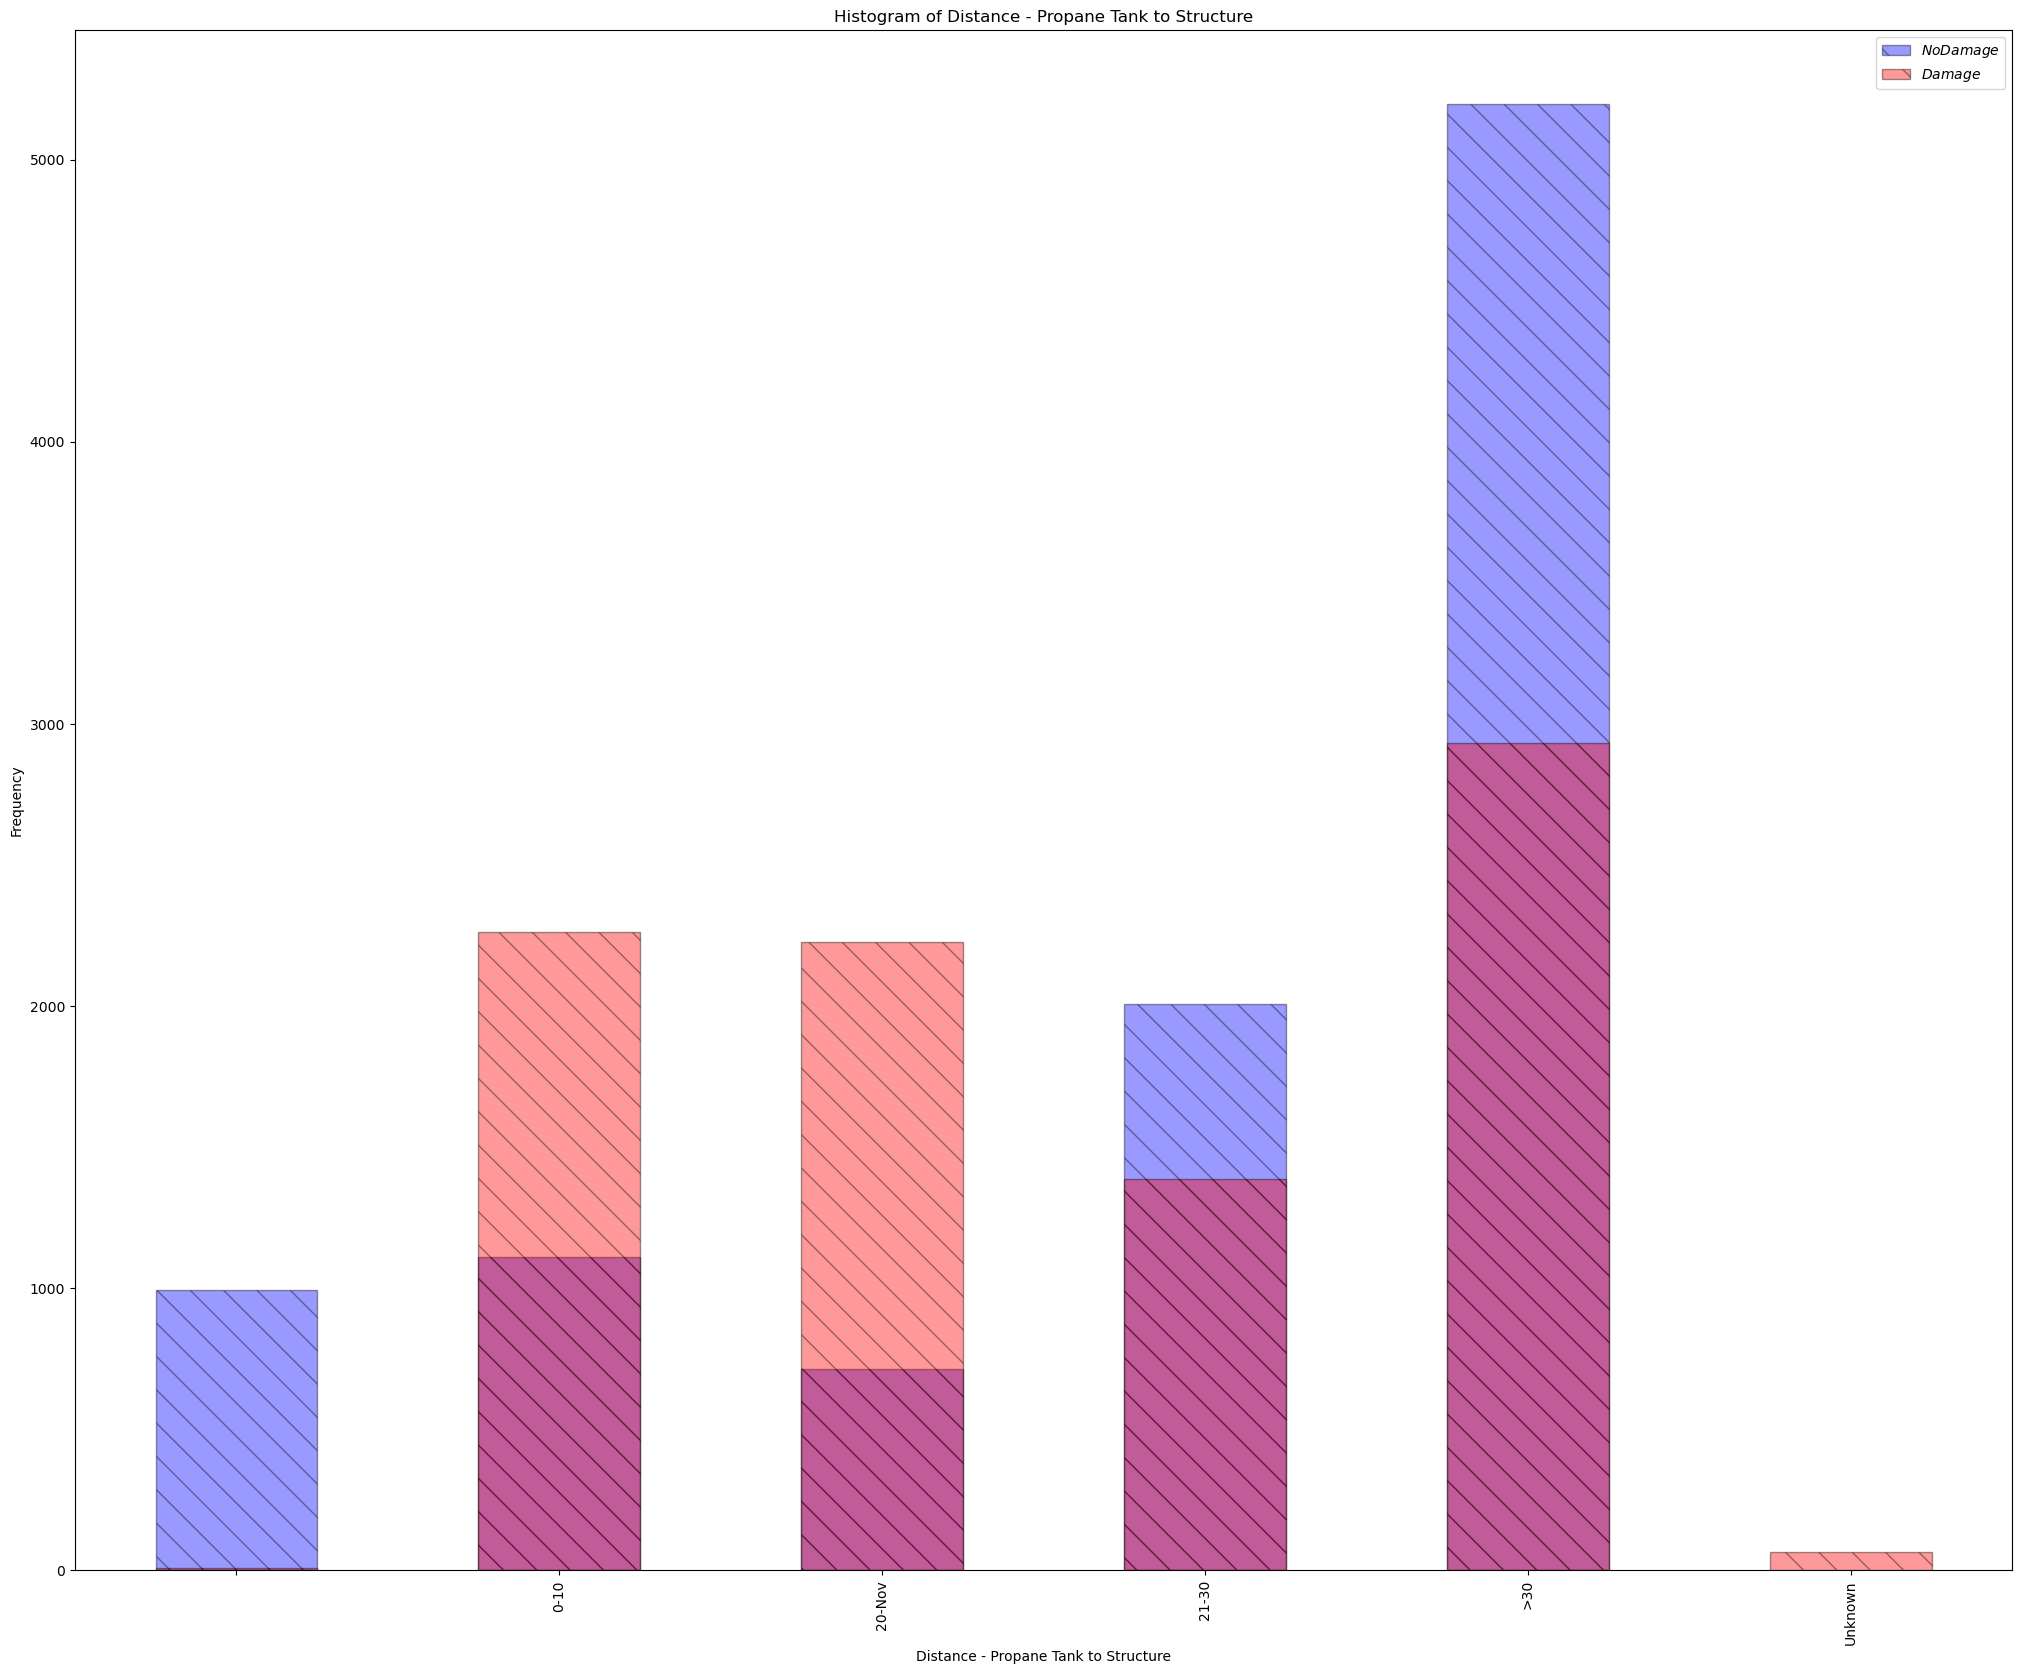

In [156]:
print(cal_fire_data['Distance - Propane Tank to Structure'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Distance - Propane Tank to Structure'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Distance - Propane Tank to Structure'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Distance - Propane Tank to Structure'}')
plt.xlabel('Distance - Propane Tank to Structure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Distance - Residence to Utility/Misc Structure &gt; 120 SQFT
<30'      10127
>50'       4288
30-50'     4121
30          140
50          103
             11
Name: count, dtype: int64


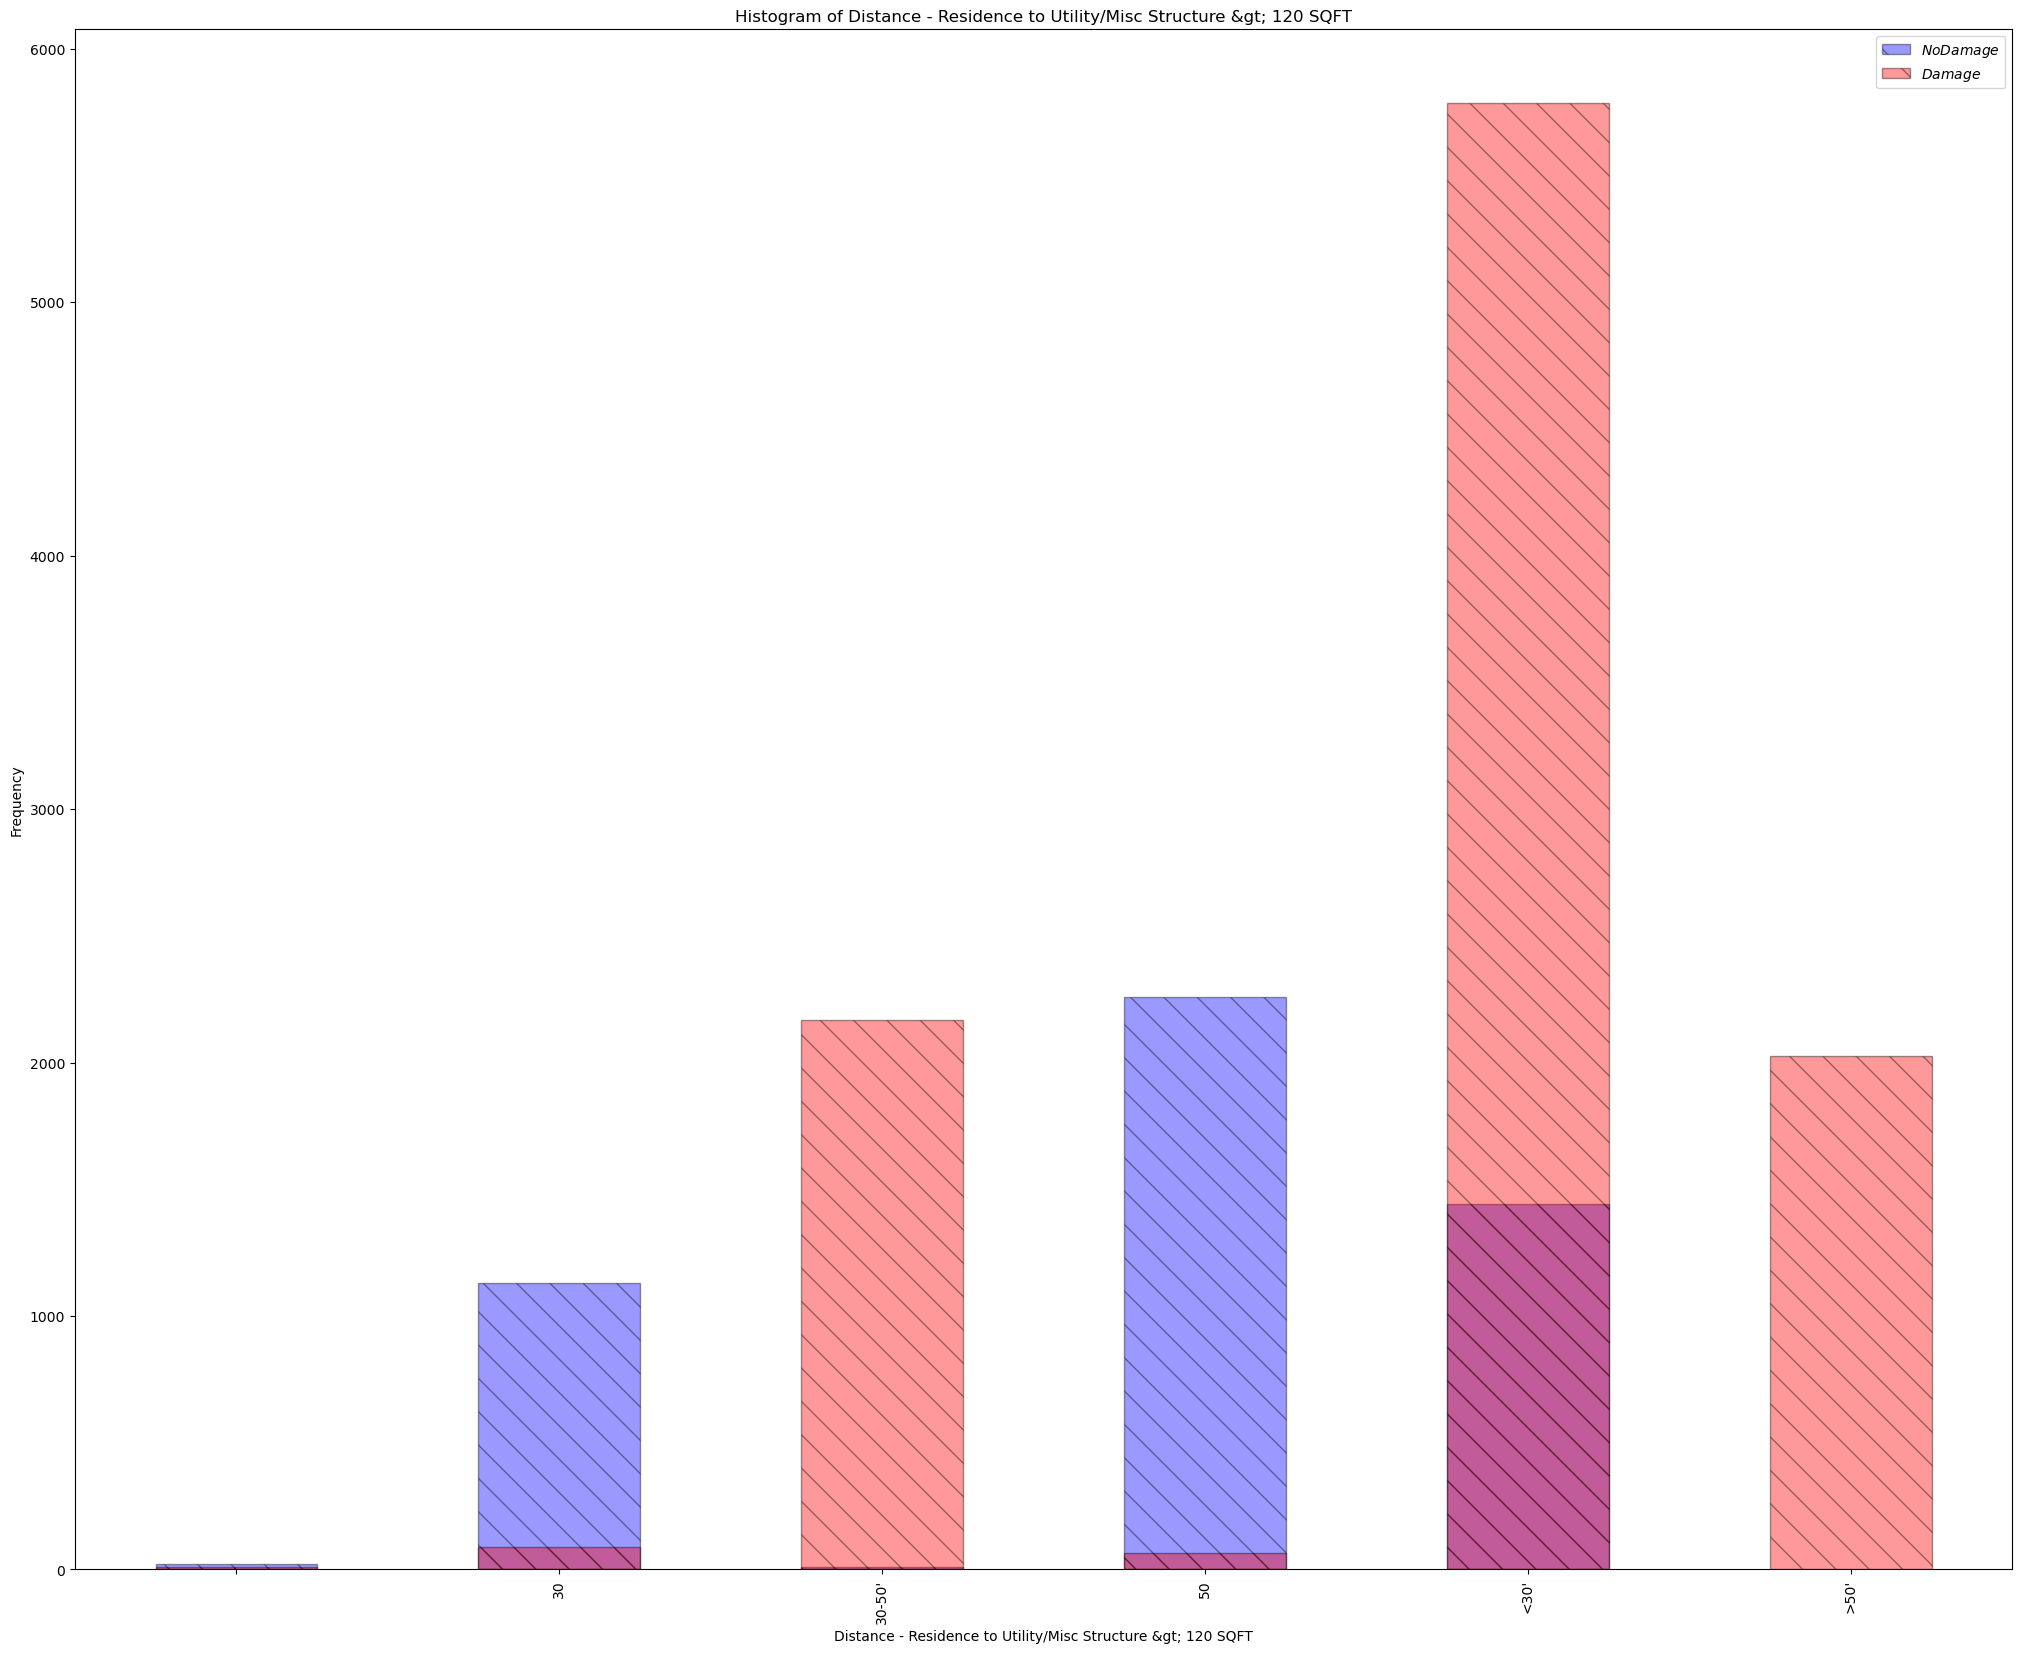

In [157]:
print(cal_fire_data['Distance - Residence to Utility/Misc Structure &gt; 120 SQFT'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Distance - Residence to Utility/Misc Structure &gt; 120 SQFT'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Distance - Residence to Utility/Misc Structure &gt; 120 SQFT'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT'}')
plt.xlabel('Distance - Residence to Utility/Misc Structure &gt; 120 SQFT')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Fire Name (Secondary)
CZU Lightning Complex    4762
Hennessey                4237
Bear                     3204
Napa                     2668
Sonoma                   1352
SCU Lightning Complex     878
Walbridge                 834
Castle                    798
Santa Rosa                633
River                     341
Mendocino Complex         319
Carmel                    248
August Complex West       160
St. Helena                109
August Complex South      102
Quail                      59
Doe                        52
Elkhorn                    40
Meyers                     39
Lassen                     31
                            5
August Complex North        2
Name: count, dtype: int64


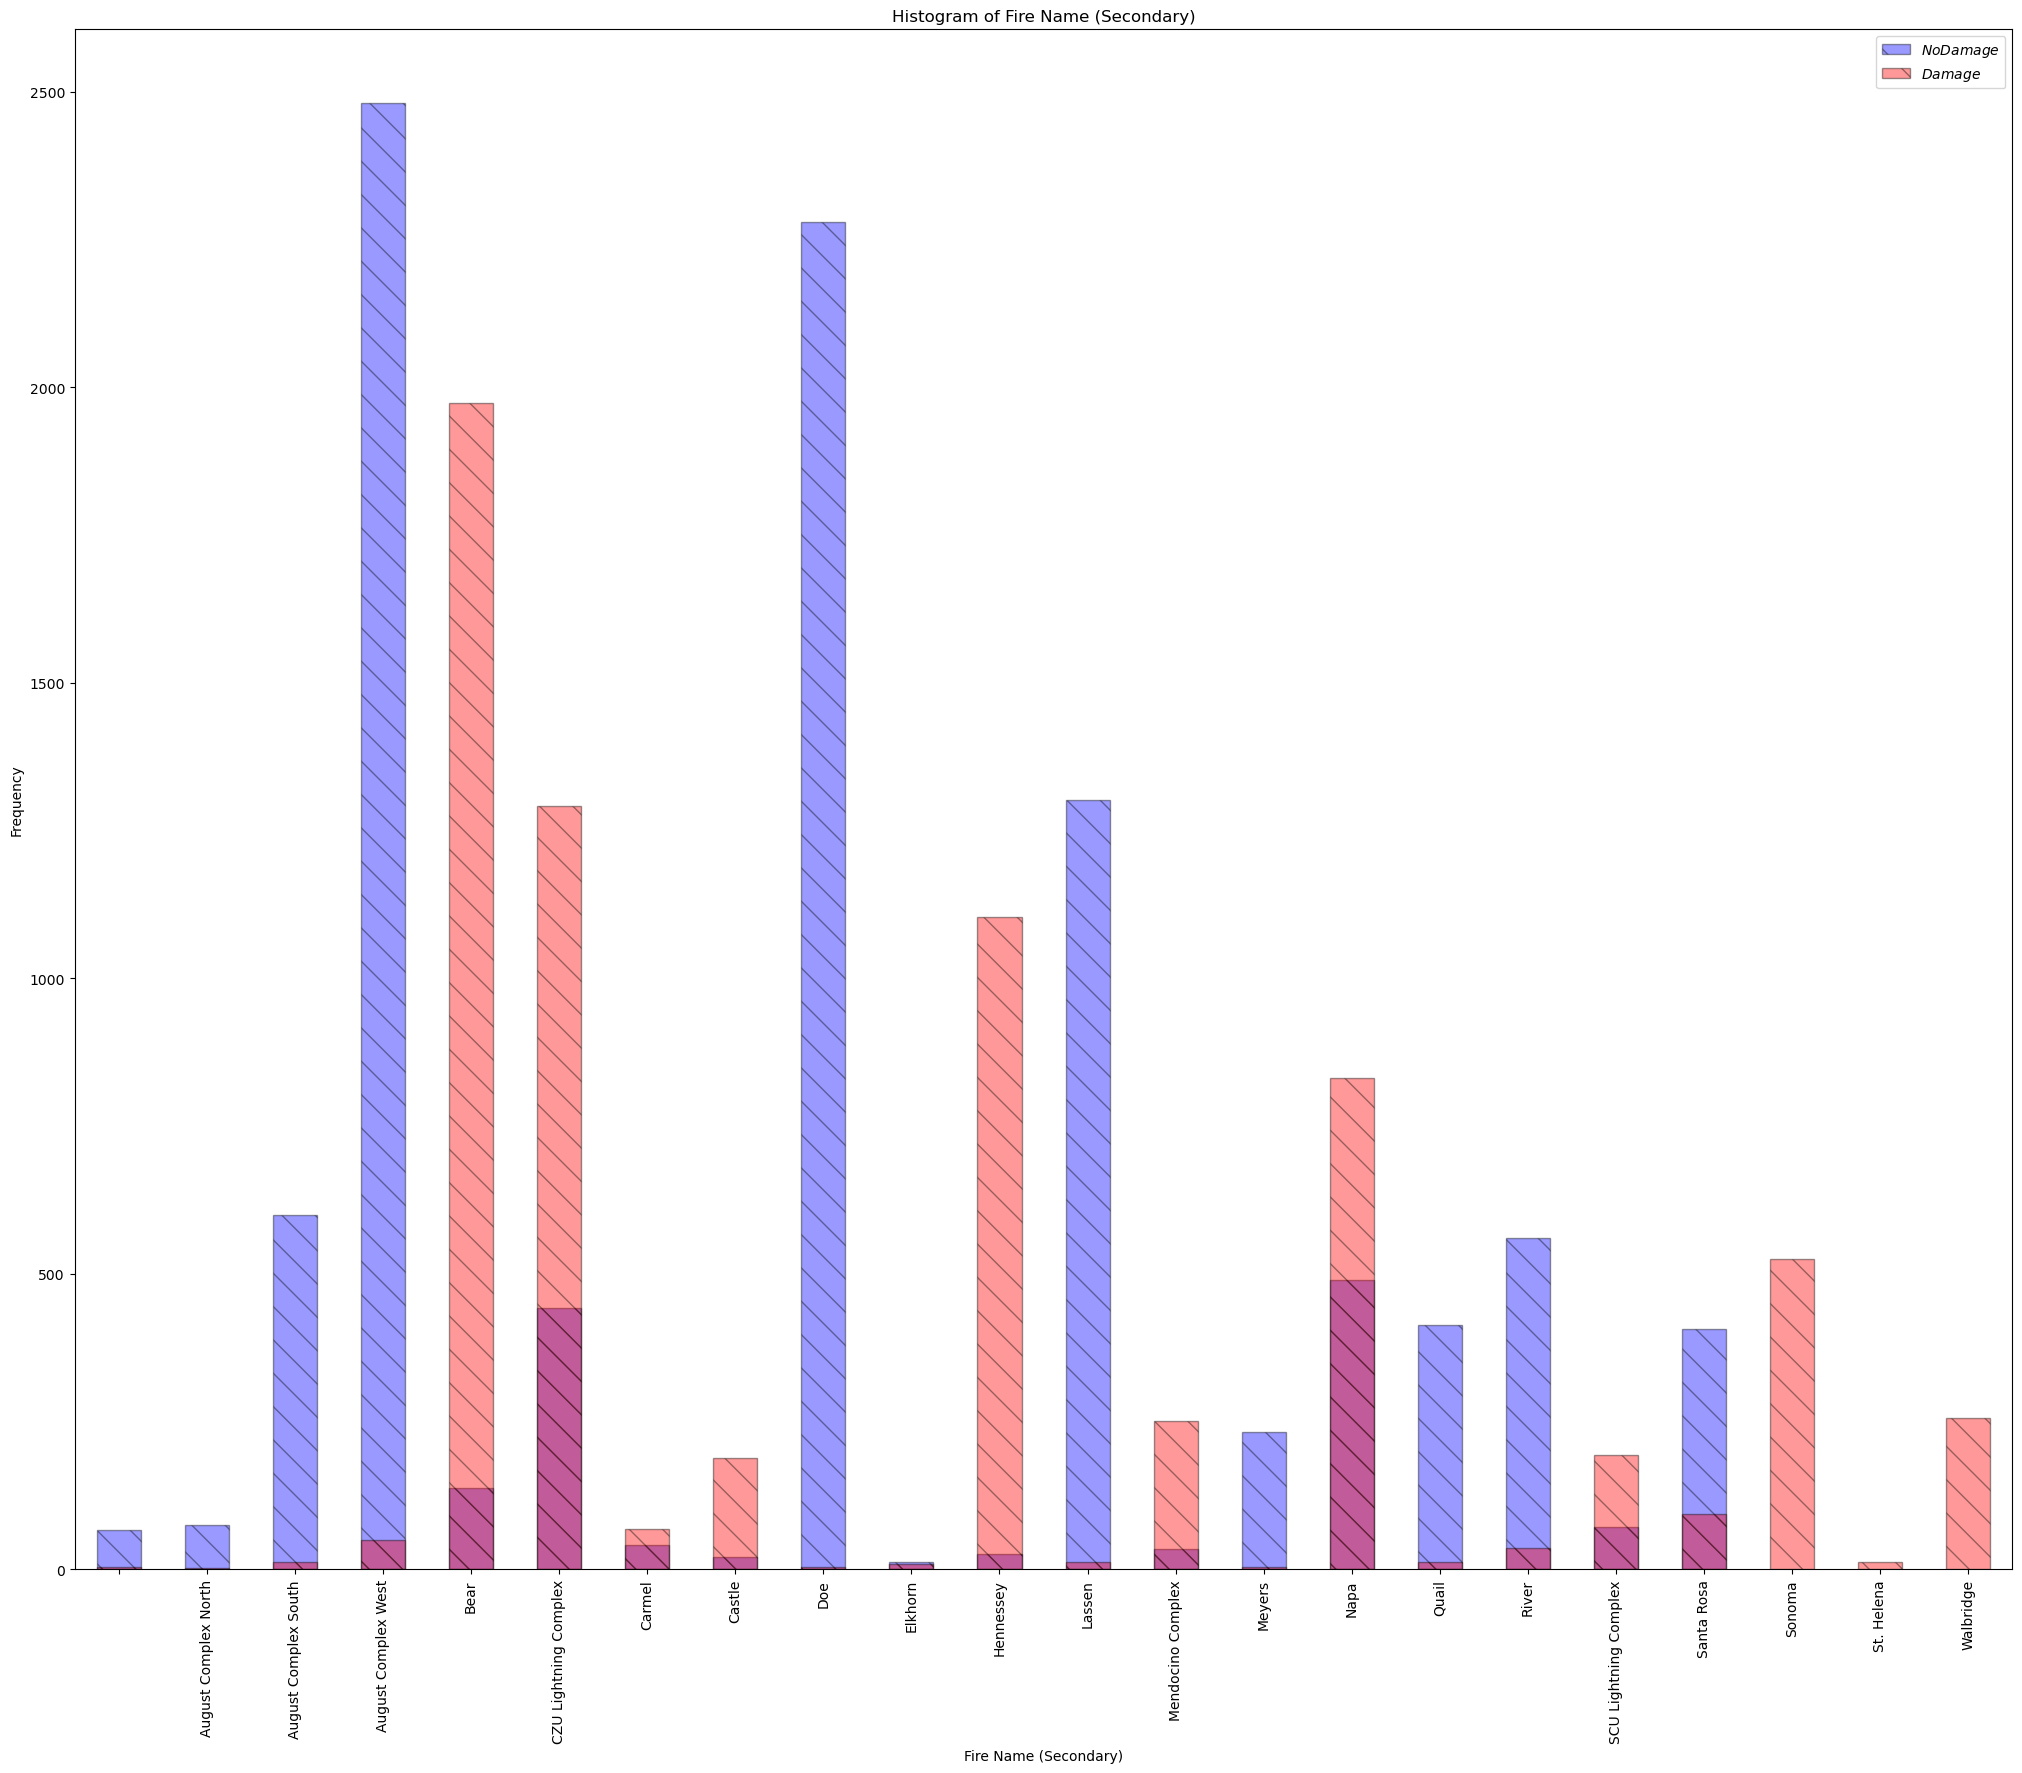

In [158]:
print(cal_fire_data['Fire Name (Secondary)'].value_counts())

plt.figure(figsize=[25,20])    
fire_train.loc[fire_train.Damage_Level==0]['Fire Name (Secondary)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='blue',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$No Damage$")
fire_train.loc[fire_train.Damage_Level==1]['Fire Name (Secondary)'].value_counts().sort_index().plot(kind='bar',
                                                                                color='red',
                                                                                alpha=.4,
                                                                                hatch = '\\',
                                                                                edgecolor='black',
                                                                                label="$Damage$")
plt.title(f'Histogram of {'Fire Name (Secondary)'}')
plt.xlabel('Fire Name (Secondary)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Assessed Improved Value (parcel)
0.0           4872
54139901.0     258
60393.0        155
2756731.0      154
10000.0        134
              ... 
34698.0          1
311978.0         1
129699.0         1
4168.0           1
100094.0         1
Name: count, Length: 45306, dtype: int64


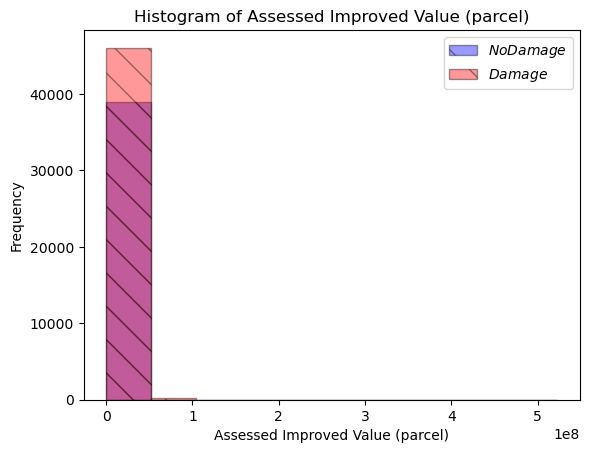

In [159]:
print(cal_fire_data['Assessed Improved Value (parcel)'].value_counts())

plt.hist(fire_train.loc[fire_train['Damage_Level']==0]['Assessed Improved Value (parcel)'].values,
            color='blue',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$No Damage$")
plt.hist(fire_train.loc[fire_train['Damage_Level']==1]['Assessed Improved Value (parcel)'].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$Damage$")
plt.title(f'Histogram of {'Assessed Improved Value (parcel)'}')
plt.xlabel('Assessed Improved Value (parcel)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Age
59.660678     28269
78.000000      2431
77.000000      1992
75.000000      1904
46.000000      1708
              ...  
173.000000        2
136.000000        2
172.000000        1
482.000000        1
137.000000        1
Name: count, Length: 155, dtype: int64


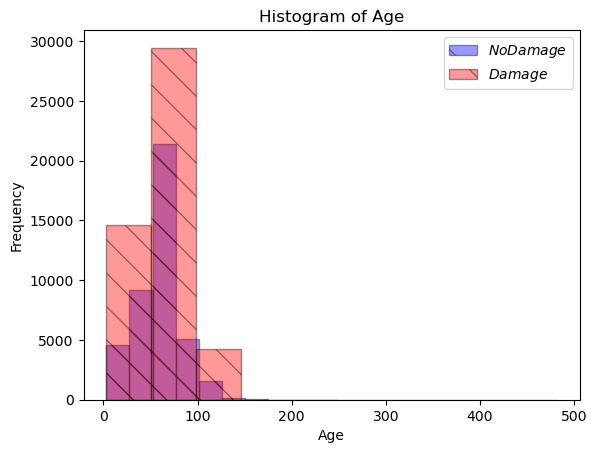

In [160]:
print(cal_fire_data['Age'].value_counts())

plt.hist(fire_train.loc[fire_train['Damage_Level']==0]['Age'].values,
            color='blue',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$No Damage$")
plt.hist(fire_train.loc[fire_train['Damage_Level']==1]['Age'].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$Damage$")
plt.title(f'Histogram of {'Age'}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Latitude
34.187157    3
34.183568    3
34.189371    3
34.198784    3
34.043894    3
            ..
39.751534    1
39.751273    1
39.751549    1
39.751543    1
34.194266    1
Name: count, Length: 111944, dtype: int64


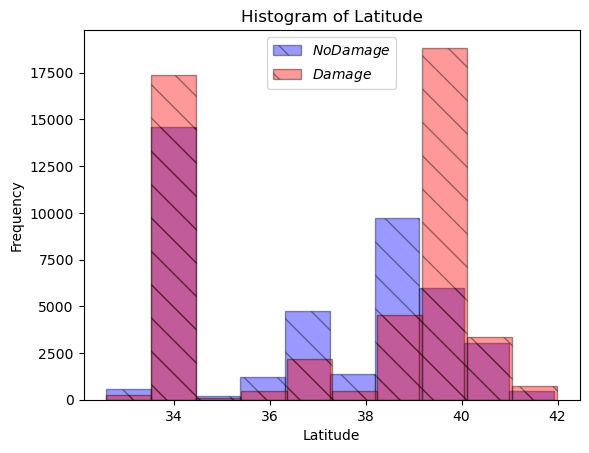

In [161]:
print(cal_fire_data['Latitude'].value_counts())

plt.hist(fire_train.loc[fire_train['Damage_Level']==0]['Latitude'].values,
            color='blue',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$No Damage$")
plt.hist(fire_train.loc[fire_train['Damage_Level']==1]['Latitude'].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$Damage$")
plt.title(f'Histogram of {'Latitude'}')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Longitude
-118.155516    3
-118.128854    3
-118.154913    3
-116.913727    3
-118.150944    3
              ..
-121.638627    1
-121.638612    1
-121.638593    1
-121.647239    1
-118.159774    1
Name: count, Length: 111953, dtype: int64


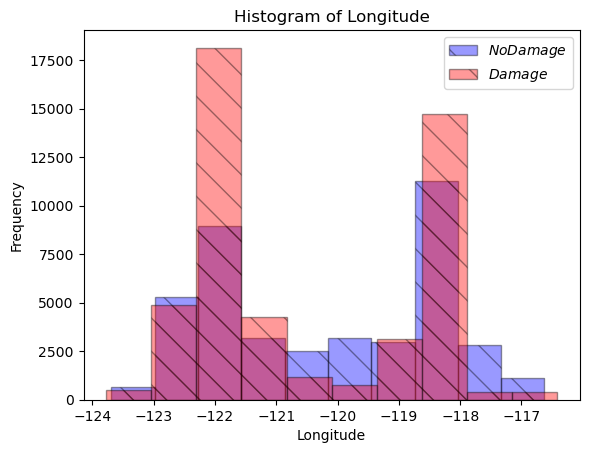

In [162]:
print(cal_fire_data['Longitude'].value_counts())

plt.hist(fire_train.loc[fire_train['Damage_Level']==0]['Longitude'].values,
            color='blue',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$No Damage$")
plt.hist(fire_train.loc[fire_train['Damage_Level']==1]['Longitude'].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$Damage$")
plt.title(f'Histogram of {'Longitude'}')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.legend()
plt.show()


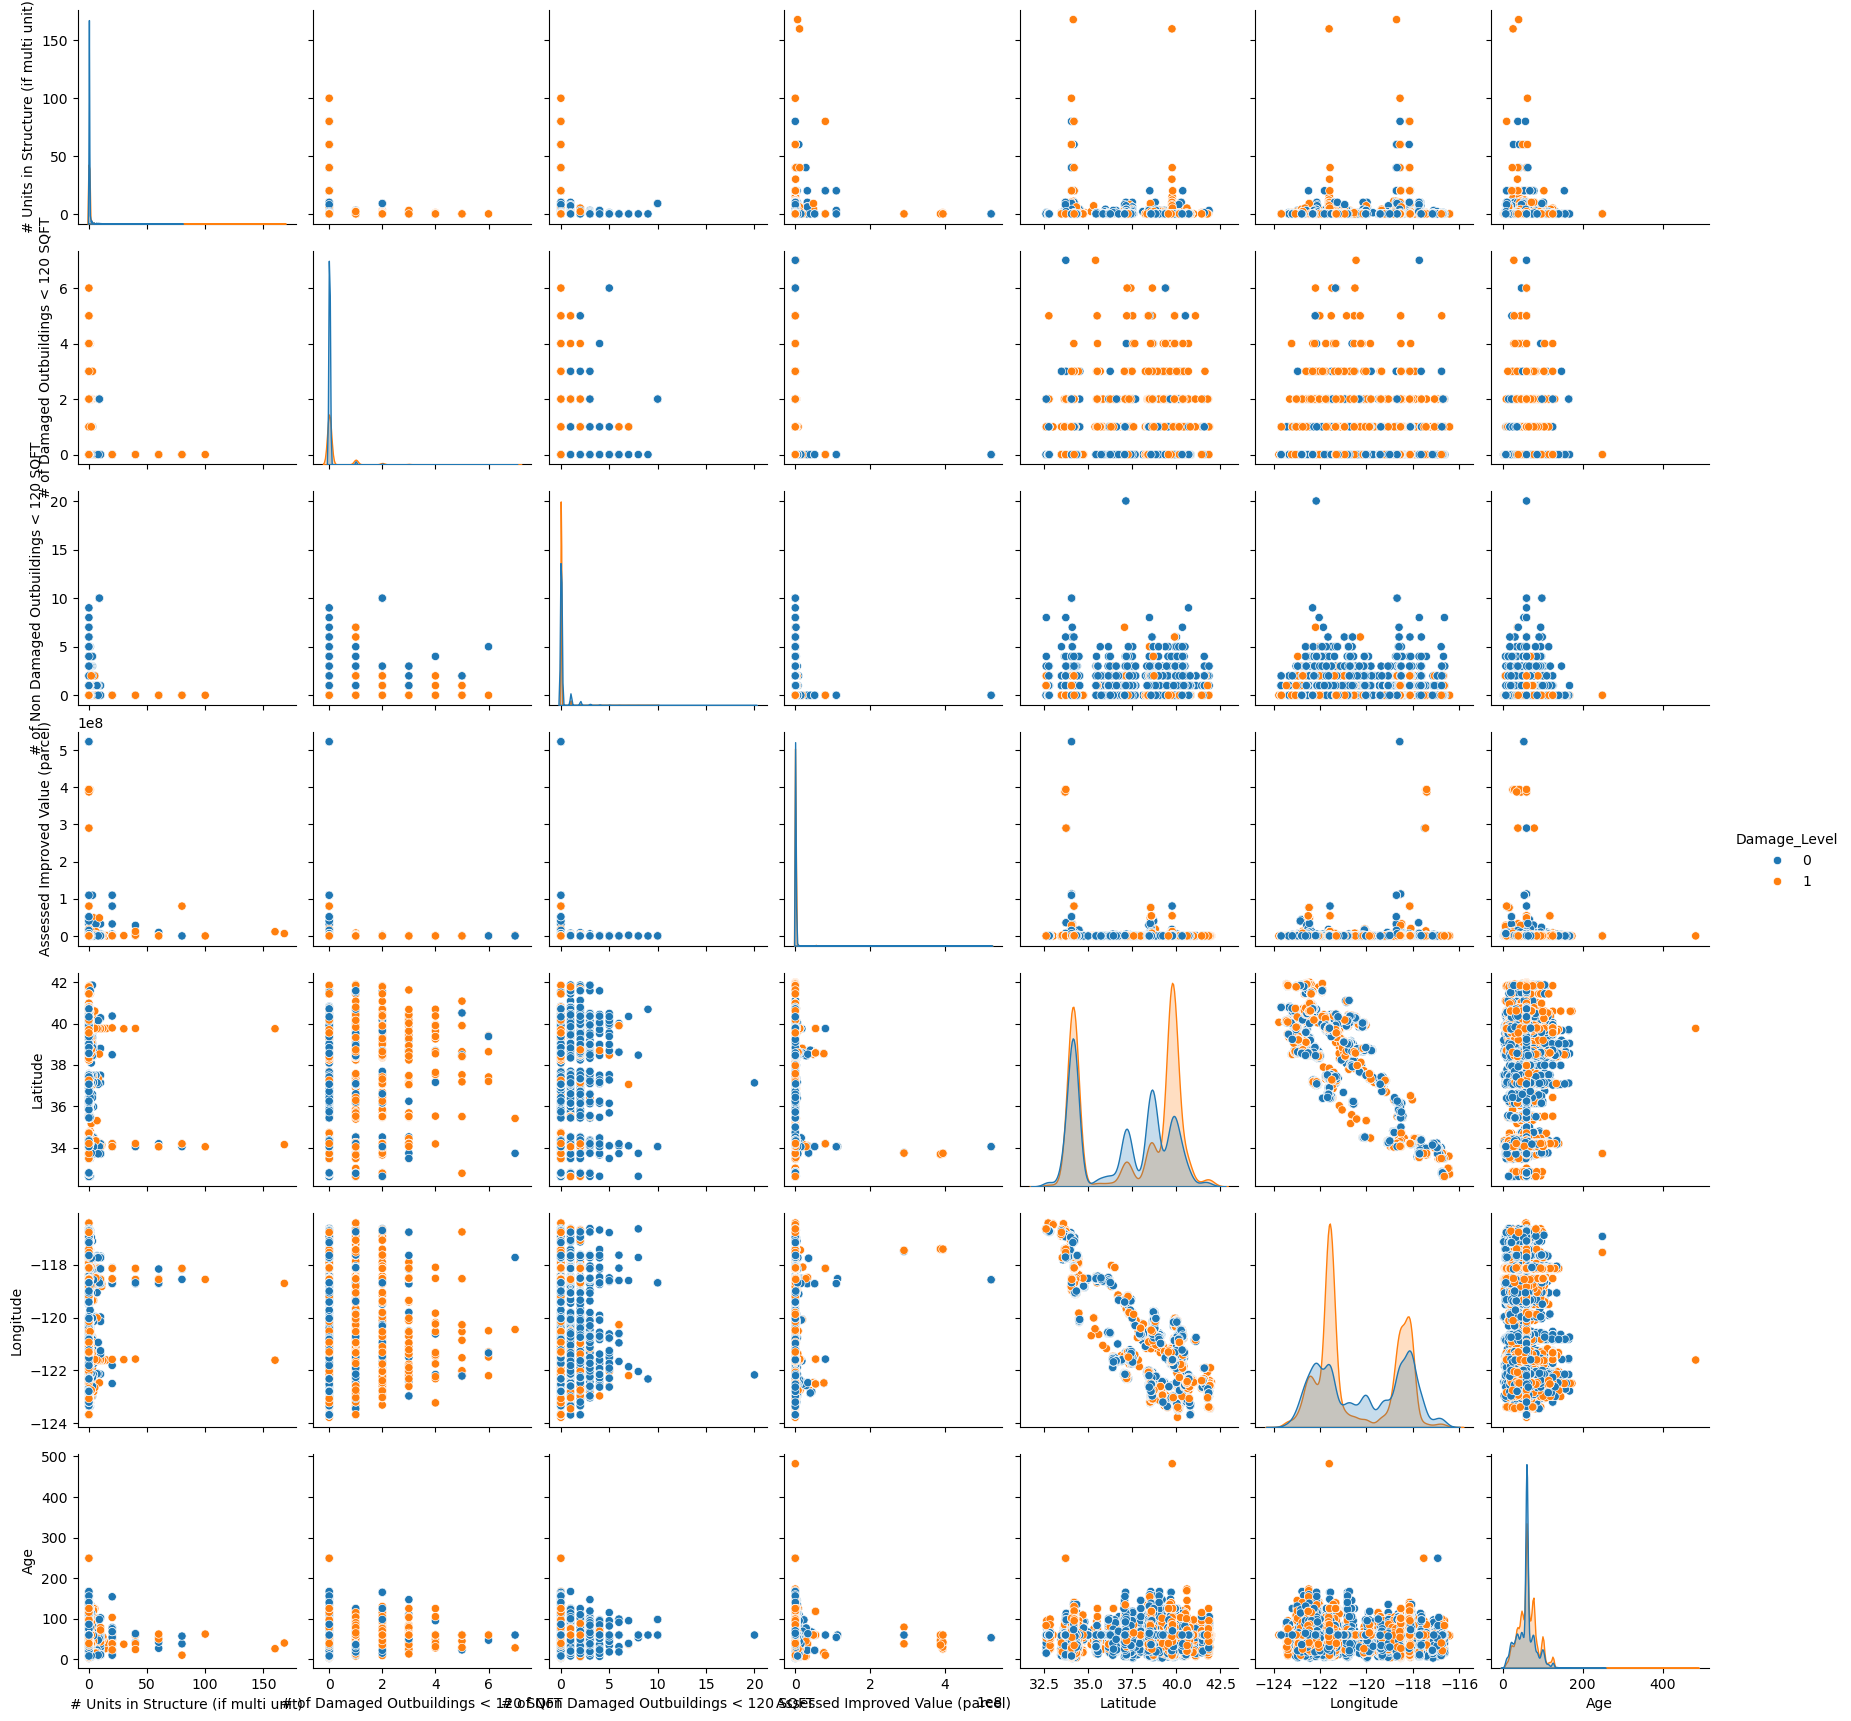

In [163]:
sns.pairplot(fire_train, hue='Damage_Level')
plt.show()


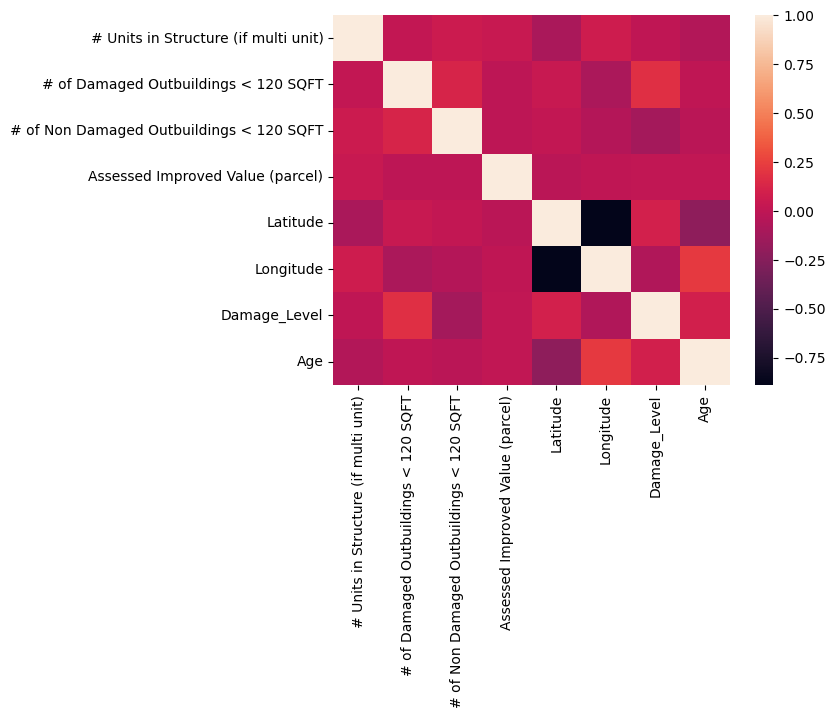

In [164]:
sns.heatmap(fire_train.corr(numeric_only=True))
plt.show()
